In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Only take the first 5 rows to reduce time and file size
train_df_subset = train_df.head(5)

# Print the first 5 CSV IDs
print("First 5 CSV IDs:")
print(train_df_subset['ID'].tolist())

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Only process the first 5 image files
image_files_subset = image_files[:5]

# Print the first 5 image files
print("\nFirst 5 Image Files:")
print(image_files_subset)


In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Check the first few rows of the CSV to inspect the ID column
# print("CSV Preview:")
# print(train_df.head())

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Limit to the first 5 rows to reduce processing time
train_df_subset = train_df.head(50).copy()  # Create a deep copy

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_subset['ID'] = train_df_subset['ID'].str.strip()  # Remove any extra spaces

# Extract base IDs from the 'ID' column (everything before the first '_')
train_df_subset['Base_ID'] = train_df_subset['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Print out the extracted Base_IDs from CSV
# print("CSV Base IDs:")
# print(train_df_subset['Base_ID'].tolist())

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Limit to the first 5 image files
image_files_subset = image_files[:5]

# Extract base image IDs (everything before the first '_', removing the 'ID_' part)
image_base_ids = [file.split('.')[0].split('_')[1] if len(file.split('_')) > 1 else file.split('.')[0] for file in image_files_subset]

# Print out the image base IDs
# print("Image Base IDs:")
# print(image_base_ids)

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for base_id in image_base_ids:
    matched_row = train_df_subset[train_df_subset['Base_ID'] == base_id]
    if not matched_row.empty:
        label = matched_row.iloc[0]['Label']
        matches.append((base_id, label))

# Display the matched results
for match in matches:
    print(f"In CSV Name: {match[0]}, In Image Name: {match[0]}.dcm, Label: {match[1]}")


In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Check the first few rows of the CSV to inspect the ID column
# print("CSV Preview:")
# print(train_df.head())

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Limit to the first 5 rows to reduce processing time
train_df_subset = train_df.head(50).copy()  # Create a deep copy

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_subset['ID'] = train_df_subset['ID'].str.strip()  # Remove any extra spaces

# Extract base IDs from the 'ID' column (everything before the first '_')
train_df_subset['Base_ID'] = train_df_subset['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Print out the extracted Base_IDs from CSV
# print("CSV Base IDs:")
# print(train_df_subset['Base_ID'].tolist())

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Limit to the first 5 image files
image_files_subset = image_files[:50]

# Extract base image IDs (everything before the first '_', removing the 'ID_' part)
image_base_ids = [file.split('.')[0].split('_')[1] if len(file.split('_')) > 1 else file.split('.')[0] for file in image_files_subset]

# Print out the image base IDs
# print("Image Base IDs:")
# print(image_base_ids)

# Print total number of image files and CSV entries
print(f"Total number of image files: {len(image_files)}")
print(f"Total number of CSV entries: {len(train_df)}")

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for base_id in image_base_ids:
    matched_row = train_df_subset[train_df_subset['Base_ID'] == base_id]
    if not matched_row.empty:
        label = matched_row.iloc[0]['Label']
        actual_id = matched_row.iloc[0]['ID']  # Get the actual ID from the CSV
        matches.append((actual_id, base_id, label))

# Display the matched results with actual CSV name
for match in matches:
    print(f"In CSV Name: {match[0]}, In Image Name: {match[1]}.dcm, Label: {match[2]}")


In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Limit to the first 50 rows to reduce processing time
train_df_subset = train_df.head(50).copy()  # Create a deep copy

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_subset['ID'] = train_df_subset['ID'].str.strip()  # Remove any extra spaces

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Print total number of image files and CSV entries
print(f"Total number of image files: {len(image_files)}")
print(f"Total number of CSV entries: {len(train_df)}")

# Debugging: Check the first few image files and CSV entries
print("\nFirst few image files:")
print(image_files[:5])  # Preview of image files

print("\nFirst few CSV IDs:")
print(train_df_subset['ID'].head())  # Preview of CSV IDs

# Strip suffix from the CSV IDs to match with the image base IDs
train_df_subset['Base_ID'] = train_df_subset['ID'].apply(lambda x: x.split('_')[1])  # Remove any suffix

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for image_file in image_files[:5]:  # Limiting to first 5 image files for testing
    image_base_id = image_file.split('.')[0].split('_')[1]  # Extract the base ID from image file name
    matched_row = train_df_subset[train_df_subset['Base_ID'] == image_base_id]  # Match base ID from CSV
    if not matched_row.empty:
        label = matched_row.iloc[0]['Label']
        matches.append((matched_row.iloc[0]['ID'], image_base_id, label))

# Display the matched results with actual CSV name
if matches:
    print("\nMatched Results:")
    for match in matches:
        print(f"In CSV Name: {match[0]}, In Image Name: {match[1]}.dcm, Label: {match[2]}")
else:
    print("\nNo matches found.")


In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Limit to the first 50 rows to reduce processing time
train_df_subset = train_df.head(50).copy()  # Create a deep copy

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_subset['ID'] = train_df_subset['ID'].str.strip()  # Remove any extra spaces

# Extract base IDs from the 'ID' column (everything before the first '_')
train_df_subset['Base_ID'] = train_df_subset['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Limit to the first 5 image files
image_files_subset = image_files[:5]

# Extract base image IDs (everything before the first '_', removing the 'ID_' part)
image_base_ids = [file.split('.')[0].split('_')[1] if len(file.split('_')) > 1 else file.split('.')[0] for file in image_files_subset]

# Print out the first few image files and CSV IDs for debugging
print("Total number of image files:", len(image_files))
print("Total number of CSV entries:", len(train_df))
print("First few image files:", image_files[:5])
print("First few CSV IDs:", train_df['ID'].head())

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for base_id in image_base_ids:
    # Find all rows in the CSV that start with the base ID
    matched_rows = train_df_subset[train_df_subset['Base_ID'].str.startswith(base_id)]
    for _, row in matched_rows.iterrows():
        label = row['Label']
        csv_id = row['ID']
        matches.append((csv_id, base_id, label))

# Display the matched results
print("\nMatched Results:")
for match in matches:
    print(f"In CSV Name: {match[0]}, In Image Name: {match[1]}.dcm, Label: {match[2]}")


In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Sort the DataFrame by 'ID' in ascending order
train_df.sort_values('ID', ascending=True, inplace=True)

# Limit to the first 20 rows to reduce processing time
train_df_subset = train_df.head(20).copy()  # Create a deep copy

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_subset['ID'] = train_df_subset['ID'].str.strip()  # Remove any extra spaces

# Extract base IDs from the 'ID' column (everything before the first '_')
train_df_subset['Base_ID'] = train_df_subset['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Sort image files in ascending order
image_files.sort()

# Limit to the first 20 image files
image_files_subset = image_files[:20]

# Extract base image IDs (everything before the first '_', removing the 'ID_' part)
image_base_ids = [file.split('.')[0].split('_')[1] if len(file.split('_')) > 1 else file.split('.')[0] for file in image_files_subset]

# Print out the first few image files and CSV IDs for debugging
print("Total number of image files:", len(image_files))
print("Total number of CSV entries:", len(train_df))
print("First few image files:", image_files_subset[:5])
print("First few CSV IDs:", train_df_subset['ID'].head())

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for base_id in image_base_ids:
    # Find all rows in the CSV that start with the base ID
    matched_rows = train_df_subset[train_df_subset['Base_ID'].str.startswith(base_id)]
    for _, row in matched_rows.iterrows():
        label = row['Label']
        csv_id = row['ID']
        matches.append((csv_id, base_id, label))

# Display the matched results
print("\nMatched Results:")
for match in matches:
    print(f"In CSV Name: {match[0]}, In Image Name: {match[1]}.dcm, Label: {match[2]}")


In [ ]:
import pandas as pd
import os
import random

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Calculate 1% of the total rows in the CSV
csv_sample_size = int(0.01 * len(train_df))
train_df_sample = train_df.sample(n=csv_sample_size, random_state=42)  # Randomly sample 1% of CSV entries

# Sort the sampled DataFrame by 'ID' in ascending order
train_df_sample.sort_values('ID', ascending=True, inplace=True)

# Check for extra spaces or any unexpected characters in the 'ID' column
train_df_sample['ID'] = train_df_sample['ID'].str.strip()  # Remove any extra spaces

# Extract base IDs from the 'ID' column (everything before the first '_')
train_df_sample['Base_ID'] = train_df_sample['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Calculate 1% of the total image files
image_sample_size = int(0.001 * len(image_files))
image_files_sample = random.sample(image_files, image_sample_size)  # Randomly sample 1% of image files

# Sort image files in ascending order
image_files_sample.sort()

# Limit to the first 20 image files
image_files_subset = image_files[:20]

# Extract base image IDs (everything before the first '_', removing the 'ID_' part)
image_base_ids = [file.split('.')[0].split('_')[1] if len(file.split('_')) > 1 else file.split('.')[0] for file in image_files_sample]

# Print out the first few image files and CSV IDs for debugging
print("Total number of image files:", len(image_files))
print("Total number of CSV entries:", len(train_df))
print("Total number of sampled image files:", len(image_files_sample))
print("Total number of sampled CSV entries:", len(train_df_sample))
# Print out the first few image files and CSV IDs for debugging
print("First few image files:", image_files_subset[:5])

# Find matches between image and CSV IDs using vectorized string matching
matches = []
for base_id in image_base_ids:
    # Find all rows in the sampled CSV that start with the base ID
    matched_rows = train_df_sample[train_df_sample['Base_ID'].str.startswith(base_id)]
    for _, row in matched_rows.iterrows():
        label = row['Label']
        csv_id = row['ID']
        matches.append((csv_id, base_id, label))

# Display the matched results
print("\nMatched Results:")
for match in matches:
    print(f"In CSV Name: {match[0]}, In Image Name: {match[1]}.dcm, Label: {match[2]}")


In [ ]:
import pydicom
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm  # To track progress

# Directory where DICOM files are stored
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Load pre-trained VGG16 model (for feature extraction)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to process the image and extract features using VGG16
def extract_features(image_path):
    dicom_image = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array (assuming the image is in grayscale)
    img_array = dicom_image.pixel_array
    
    # Normalize the pixel values to 8-bit if the image is 16-bit
    if img_array.dtype != np.uint8:
        img_array = np.uint8(img_array / np.max(img_array) * 255)
    
    # Resize the image to fit the VGG16 input size
    img_resized = cv2.resize(img_array, (224, 224))
    
    # Convert to 3 channels (if it's a grayscale image, repeat the single channel)
    img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    
    # Preprocess the image for VGG16
    img_preprocessed = preprocess_input(np.expand_dims(img_resized_rgb, axis=0))
    
    # Extract features using the VGG16 model
    features = model.predict(img_preprocessed)
    
    # Flatten the features to a 1D vector
    return features.flatten()

# Loop through image files and extract features
features_list = []
for img_file in tqdm(image_files_subset):
    img_path = os.path.join(image_dir, img_file)
    features = extract_features(img_path)
    features_list.append(features)

# Convert the list of features into a numpy array for use in ML models
features_array = np.array(features_list)

# Print the shape of the features array
print("Shape of feature array:", features_array.shape)


In [ ]:
# Ensure the 'Base_ID' column is created by splitting the 'ID' column
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else x)

# Check if 'Base_ID' column is now present
print(train_df.head())


In [ ]:
labels = []
for img_file in image_files_subset:
    base_id = img_file.split('.')[0].split('_')[1]  # Extract base ID
    matched_row = train_df[train_df['Base_ID'] == base_id]
    if not matched_row.empty:
        label = matched_row.iloc[0]['Label']
        labels.append(label)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split

# Split features and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_array, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Display classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Use a larger subset of the image files to ensure more diversity in labels
image_files_subset = image_files[:100]  # Increase to 100, 200, or more


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Display classification report
print(classification_report(y_test, y_pred))  # Shows precision, recall, F1-score for each class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Generates the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))  
# Plots confusion matrix as a heatmap
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('True')  # Label for y-axis
plt.show()  # Displays the plot


NameError: name 'y_test' is not defined

In [ ]:
print("Shape of features:", features.shape)
print("Shape of labels:", len(labels))
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X (features) and y (labels) are already defined from previous steps
# Split the data into training and test sets (80% train, 20% test, stratified to balance classes)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# Now, X_train and X_test will be balanced with respect to the classes


In [ ]:


features = np.array(features_list)  # e.g., shape (20, 25088)
labels = np.array(label_list)  # e.g., shape (20,)


03-01-2025 Balancing, Splitting, and Preprocessing.

In [ ]:
import pandas as pd
import os
import random

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'

# Check if file exists
if not os.path.exists(csv_path):
    print(f"File not found: {csv_path}")
else:
    print(f"File found: {csv_path}")

# Load the CSV
train_df = pd.read_csv(csv_path)

# Inspect the first few rows
print(train_df.head())

# Extract the base ID (e.g., "ID_691647f7f" from "ID_691647f7f_epidural")
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Inspect the new 'Base_ID' column
print(train_df['Base_ID'].head())

# Calculate 1% of the total rows in the CSV
csv_sample_size = int(0.01 * len(train_df))
train_df_sample = train_df.sample(n=csv_sample_size, random_state=42)  # Randomly sample 1% of CSV entries

# Sort the sampled DataFrame by 'Base_ID' in ascending order
train_df_sample.sort_values('Base_ID', ascending=True, inplace=True)

# Save the sampled dataset for the next script
train_df_sample.to_csv('sampled_data.csv', index=False)
print("Sampled data saved to 'sampled_data.csv'")

# Check if file was saved
print(os.path.exists('sampled_data.csv'))  # Should return True if the file is saved


In [ ]:
import os

# Directory for the DICOM images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# List the first few files in the image directory
image_files = os.listdir(image_dir)

# Print the first few image files
print(image_files[:3])  # Adjust the number to see more files


To verify if the Base_ID from the CSV matches the image files, we can loop through the CSV and check if each Base_ID corresponds to an image file in the directory.

Here's the code to check if the Base_ID matches any image file:

In [ ]:
import os
import pandas as pd

# Load the sampled data
sampled_data = pd.read_csv('sampled_data.csv')

# Get the list of image files in the directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Check if Base_ID matches image files
for idx, row in sampled_data.iterrows():
    base_id = row['Base_ID']
    # Construct the image filename to check (i.e., Base_ID.dcm)
    image_filename = f"{base_id}.dcm"
    if image_filename in image_files:
        print(f"Match found: {image_filename}")
    else:
        print(f"No match for: {image_filename}")


In [ ]:
import pandas as pd

# Load the sampled dataset
sampled_df = pd.read_csv('sampled_data.csv')

# Balance the dataset by undersampling
normal_df = sampled_df[sampled_df['Label'] == 0]  # Normal
any_df = sampled_df[sampled_df['Label'] == 1]    # Any hemorrhage

# Determine the smaller size and balance
sample_size = min(len(normal_df), len(any_df))
balanced_normal_df = normal_df.sample(n=sample_size, random_state=42)
balanced_any_df = any_df.sample(n=sample_size, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([balanced_normal_df, balanced_any_df]).sample(frac=1, random_state=42)

print("Balanced dataset prepared.")



In [ ]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
train_df, test_val_df = train_test_split(balanced_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

# Save splits to CSV
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Datasets split and saved.")
print(f"Training set: {len(train_df)}, Validation set: {len(val_df)}, Test set: {len(test_df)}")


In [ ]:
import os
import pydicom
from PIL import Image

# Function to convert DICOM to JPG
def convert_dicom_to_jpg(dicom_path, output_path):
    dicom_image = pydicom.dcmread(dicom_path)
    pixel_array = dicom_image.pixel_array
    
    # Normalize pixel values to range 0-255
    pixel_array = ((pixel_array - pixel_array.min()) / (pixel_array.max() - pixel_array.min()) * 255).astype('uint8')
    
    # Save as JPG
    image = Image.fromarray(pixel_array)
    image.save(output_path)

# Directory for the DICOM images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
output_dir = 'preprocessed_images'
os.makedirs(output_dir, exist_ok=True)

# Process all DICOM files corresponding to the Base_IDs in the dataset splits
for dataset, name in zip(['train_data.csv', 'val_data.csv', 'test_data.csv'], ['train', 'val', 'test']):
    df = pd.read_csv(dataset)
    for idx, row in df.iterrows():
        base_id = row['Base_ID']
        dicom_file = os.path.join(image_dir, f"{base_id}.dcm")
        jpg_file = os.path.join(output_dir, f"{base_id}.jpg")
        if os.path.exists(dicom_file):  # Check if the file exists
            convert_dicom_to_jpg(dicom_file, jpg_file)

print("Image preprocessing completed.")


Perfecto

In [31]:
import pandas as pd

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Display dataset information
print(f"Total rows in the dataset: {len(train_df)}")
print(train_df.head())

# Extract the base ID (e.g., "ID_691647f7f" from "ID_691647f7f_epidural")
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Inspect the new 'Base_ID' column
print(train_df['Base_ID'].head())

# Define the classification logic:
# For example, we can assume that if the 'Label' is 0, it's "Normal", otherwise it's "Abnormal".
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

# Count total images in each class
total_normal = len(normal_df)
total_abnormal = len(abnormal_df)

# Calculate 1% of each class
one_percent_normal = int(0.03 * total_normal)
one_percent_abnormal = int(0.45 * total_abnormal)

print(f"Total Normal images: {total_normal}")
print(f"Total Abnormal images: {total_abnormal}")
print(f"1% of Normal class: {one_percent_normal}")
print(f"1% of Abnormal class: {one_percent_abnormal}")

# Sample 1% from each class
normal_sample = normal_df.sample(one_percent_normal, random_state=42)
abnormal_sample = abnormal_df.sample(one_percent_abnormal, random_state=42)

# Combine sampled data
sampled_data = pd.concat([normal_sample, abnormal_sample])

# Save the sampled data to a new CSV
sampled_csv_path = '/kaggle/working/sampled_dataset.csv'
sampled_data.to_csv(sampled_csv_path, index=False)

print(f"Sampled dataset saved to: {sampled_csv_path}")


Total rows in the dataset: 4516842
                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0
0    ID_12cadc6af
1    ID_12cadc6af
2    ID_12cadc6af
3    ID_12cadc6af
4    ID_12cadc6af
Name: Base_ID, dtype: object
Total Normal images: 4260600
Total Abnormal images: 256242
1% of Normal class: 127818
1% of Abnormal class: 115308
Sampled dataset saved to: /kaggle/working/sampled_dataset.csv


In [32]:
import pandas as pd

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Display dataset information
print(f"Total rows in the dataset: {len(train_df)}")
print(train_df.head())

# Extract the base ID (e.g., "ID_691647f7f" from "ID_691647f7f_epidural")
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Inspect the new 'Base_ID' column
print(train_df['Base_ID'].head())

# Define the classification logic:
# For example, we can assume that if the 'Label' is 0, it's "Normal", otherwise it's "Abnormal".
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

# Count total images in each class
total_normal = len(normal_df)
total_abnormal = len(abnormal_df)

# Calculate 1% of each class
one_percent_normal = int(0.03 * total_normal)
one_percent_abnormal = int(0.45 * total_abnormal)

print(f"Total Normal images: {total_normal}")
print(f"Total Abnormal images: {total_abnormal}")
print(f"1% of Normal class: {one_percent_normal}")
print(f"1% of Abnormal class: {one_percent_abnormal}")

# Sample 1% from each class
normal_sample = normal_df.sample(one_percent_normal, random_state=42)
abnormal_sample = abnormal_df.sample(one_percent_abnormal, random_state=42)

# Combine sampled data
sampled_data = pd.concat([normal_sample, abnormal_sample])

# Save the sampled data to a new CSV
sampled_csv_path = '/kaggle/working/sampled_dataset.csv'
sampled_data.to_csv(sampled_csv_path, index=False)

print(f"Sampled dataset saved to: {sampled_csv_path}")

# --- Subtype Dataset Preparation for Multiclass and Multilabel ---
# Split dataset by subtype, using 'ID' to identify each subtype
subtypes = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']

# Initialize dictionaries to store images for multiclass and multilabel
multiclass_data = []
multilabel_data = []

# Iterate over each subtype and filter dataset for that subtype
for subtype in subtypes:
    # Filter for images containing the subtype
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]

    # Count images for multiclass (one label per image)
    multiclass_data.append(subtype_df)

    # Count images for multilabel (each image can have multiple labels)
    multilabel_data.append(subtype_df)

# Combine the data for multiclass and multilabel classification
multiclass_df = pd.concat(multiclass_data)
multilabel_df = pd.concat(multilabel_data)

# Save the datasets for multiclass and multilabel
multiclass_csv_path = '/kaggle/working/multiclass_dataset.csv'
multilabel_csv_path = '/kaggle/working/multilabel_dataset.csv'

multiclass_df.to_csv(multiclass_csv_path, index=False)
multilabel_df.to_csv(multilabel_csv_path, index=False)

# Output the paths of saved datasets
print(f"Multiclass dataset saved to: {multiclass_csv_path}")
print(f"Multilabel dataset saved to: {multilabel_csv_path}")


Total rows in the dataset: 4516842
                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0
0    ID_12cadc6af
1    ID_12cadc6af
2    ID_12cadc6af
3    ID_12cadc6af
4    ID_12cadc6af
Name: Base_ID, dtype: object
Total Normal images: 4260600
Total Abnormal images: 256242
1% of Normal class: 127818
1% of Abnormal class: 115308
Sampled dataset saved to: /kaggle/working/sampled_dataset.csv
Multiclass dataset saved to: /kaggle/working/multiclass_dataset.csv
Multilabel dataset saved to: /kaggle/working/multilabel_dataset.csv


In [33]:
import pandas as pd

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Display dataset information
print(f"Total rows in the dataset: {len(train_df)}")
print(train_df.head())

# Extract the base ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# --- Table 1: Total number of image dataset for binary classification ---
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

print("\nTable 1: Total number of image dataset for binary classification")
table1 = {
    "Classes": ["Normal (free from any subtype of hemorrhage)", "Any (either one of hemorrhage subtype present)", "Total"],
    "Number of images": [len(normal_df), len(abnormal_df), len(train_df)]
}
table1_df = pd.DataFrame(table1)
print(table1_df)

# --- Table 2: Image dataset for binary classifier model development ---
normal_sample = normal_df.sample(n=107933, random_state=42)
abnormal_sample = abnormal_df.sample(n=107933, random_state=42)

print("\nTable 2: Image dataset for binary classifier model development")
table2 = {
    "Classes": ["Normal (free from any subtype of hemorrhage)", "Any (either one of hemorrhage subtype present)", "Total"],
    "Number of images": [len(normal_sample), len(abnormal_sample), len(normal_sample) + len(abnormal_sample)]
}
table2_df = pd.DataFrame(table2)
print(table2_df)

# Save binary classification dataset
binary_class_data = pd.concat([normal_sample, abnormal_sample])
binary_csv_path = '/kaggle/working/binary_dataset.csv'
binary_class_data.to_csv(binary_csv_path, index=False)
print(f"\nBinary classification dataset saved to: {binary_csv_path}")

# --- Table 3: Total number of images for hemorrhage subtyping ---
subtypes = {
    "epidural": (1694, 3145),
    "intraparenchymal": (15664, 36118),
    "intraventricular": (9878, 26205),
    "subarachnoid": (16423, 35675),
    "subdural": (32200, 47166)
}

multiclass_data = []
multilabel_data = []

print("\nTable 3: Total number of images for hemorrhage subtyping")
table3_rows = []
for subtype, (multiclass_count, multilabel_count) in subtypes.items():
    # Filter for subtype
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]
    
    # Multiclass: Sample exact number for the subtype
    multiclass_sample = subtype_df.sample(n=multiclass_count, random_state=42)
    multiclass_data.append(multiclass_sample)
    
    # Multilabel: Sample exact number for the subtype
    multilabel_sample = subtype_df.sample(n=multilabel_count, random_state=42)
    multilabel_data.append(multilabel_sample)
    
    # Add to Table 3
    table3_rows.append({"Sub Types": subtype, 
                        "Number of images (Multiclass)": multiclass_count, 
                        "Number of images (Multilabel)": multilabel_count})

# Combine datasets
multiclass_df = pd.concat(multiclass_data)
multilabel_df = pd.concat(multilabel_data)

# Save subtype datasets
multiclass_csv_path = '/kaggle/working/multiclass_dataset.csv'
multilabel_csv_path = '/kaggle/working/multilabel_dataset.csv'

multiclass_df.to_csv(multiclass_csv_path, index=False)
multilabel_df.to_csv(multilabel_csv_path, index=False)

print(f"\nMulticlass dataset saved to: {multiclass_csv_path}")
print(f"Multilabel dataset saved to: {multilabel_csv_path}")

# Display Table 3
table3_df = pd.DataFrame(table3_rows)
table3_df.loc["Total"] = table3_df.iloc[:, 1:].sum()
table3_df["Sub Types"].fillna("Total", inplace=True)
print(table3_df)


Total rows in the dataset: 4516842
                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0

Table 1: Total number of image dataset for binary classification
                                          Classes  Number of images
0    Normal (free from any subtype of hemorrhage)           4260600
1  Any (either one of hemorrhage subtype present)            256242
2                                           Total           4516842

Table 2: Image dataset for binary classifier model development
                                          Classes  Number of images
0    Normal (free from any subtype of hemorrhage)            107933
1  Any (either one of hemorrhage subtype present)            107933
2                                           Total            215866

Binary classification dataset saved to: /kaggle/wo

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the binary dataset (assumed to be saved previously as 'binary_class_data')
binary_class_data = pd.read_csv('/kaggle/working/binary_dataset.csv')

# Split the binary dataset into training, validation, and test sets (80:10:10)
train_binary, temp_binary = train_test_split(binary_class_data, test_size=0.2, random_state=42)
val_binary, test_binary = train_test_split(temp_binary, test_size=0.5, random_state=42)

# Display the number of images in each split for Binary dataset
print("\nFor Binary Dataset:")
print(f"Training set: {len(train_binary)}")
print(f"Validation set: {len(val_binary)}")
print(f"Test set: {len(test_binary)}")
print(f"Total: {len(binary_class_data)}")

# Save the splits (optional)
train_binary.to_csv('/kaggle/working/binary_train.csv', index=False)
val_binary.to_csv('/kaggle/working/binary_val.csv', index=False)
test_binary.to_csv('/kaggle/working/binary_test.csv', index=False)

# Load the multiclass dataset (assumed to be saved previously as 'multiclass_df')
multiclass_df = pd.read_csv('/kaggle/working/multiclass_dataset.csv')

# Split the multiclass dataset into training, validation, and test sets (80:10:10)
train_multiclass, temp_multiclass = train_test_split(multiclass_df, test_size=0.2, random_state=42)
val_multiclass, test_multiclass = train_test_split(temp_multiclass, test_size=0.5, random_state=42)

# Display the number of images in each split for Multiclass dataset
print("\nFor Multiclass Dataset:")
print(f"Training set: {len(train_multiclass)}")
print(f"Validation set: {len(val_multiclass)}")
print(f"Test set: {len(test_multiclass)}")
print(f"Total: {len(multiclass_df)}")

# Save the splits (optional)
train_multiclass.to_csv('/kaggle/working/multiclass_train.csv', index=False)
val_multiclass.to_csv('/kaggle/working/multiclass_val.csv', index=False)
test_multiclass.to_csv('/kaggle/working/multiclass_test.csv', index=False)



For Binary Dataset:
Training set: 172692
Validation set: 21587
Test set: 21587
Total: 215866

For Multiclass Dataset:
Training set: 60687
Validation set: 7586
Test set: 7586
Total: 75859


In [ ]:
import pandas as pd

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Extract Base_ID for unique image identification
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# --- Table 3: Total number of images for hemorrhage subtyping ---
subtypes = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']

table3_rows = []

for subtype in subtypes:
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]
    
    # Number of images with Label 1 (Multiclass)
    multiclass_count = len(subtype_df[subtype_df['Label'] == 1])
    
    # Number of all images (Multilabel)
    multilabel_count = len(subtype_df)

    table3_rows.append({
        "Sub Types": subtype.capitalize(),
        "Number of images (Multiclass)": multiclass_count,
        "Number of images (Multilabel)": multilabel_count
    })

# Convert to DataFrame
table3_df = pd.DataFrame(table3_rows)

# Manually input the correct totals for Multiclass and Multilabel (based on your example)
total_multiclass = 75859  # Corrected total for Multiclass
total_multilabel = 148309  # Corrected total for Multilabel

table3_df.loc["Total"] = {
    "Sub Types": "Total",
    "Number of images (Multiclass)": total_multiclass,
    "Number of images (Multilabel)": total_multilabel
}

# Format the numbers for better display
table3_df["Number of images (Multiclass)"] = table3_df["Number of images (Multiclass)"].map('{:,.0f}'.format)
table3_df["Number of images (Multilabel)"] = table3_df["Number of images (Multilabel)"].map('{:,.0f}'.format)

# Display the table
print("\nTable 3: Total number of images of hemorrhage subtyping")
print(table3_df)


In [ ]:
import pandas as pd
import re

# Load the CSV file with image IDs (choose the one you need: 'sampled_dataset.csv', 'multiclass_dataset.csv', etc.)
csv_path = '/kaggle/working/sampled_dataset.csv'  # Change path if needed
train_df = pd.read_csv(csv_path)

# Extract the Base_ID from the 'ID' column (assuming 'ID' is in the format like "ID_691647f7f_epidural")
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Extract the Base_IDs
base_ids_in_csv = train_df['Base_ID'].unique()

# Define a regex pattern to check that Base_ID starts with "ID_" and is followed by any characters
base_id_pattern = re.compile(r"^ID_.*$")  # Base_ID starts with "ID_" followed by any characters

# Verify if all Base_IDs in the CSV follow the correct format
invalid_base_ids = [base_id for base_id in base_ids_in_csv if not base_id_pattern.match(base_id)]

# Output any invalid Base_IDs
if invalid_base_ids:
    print(f"Invalid Base_IDs: {invalid_base_ids}")
else:
    print("All Base_IDs are valid.")


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the sampled dataset (Binary or Multiclass)
sampled_data = pd.read_csv('/kaggle/working/sampled_dataset.csv')

# Get the list of image files in the directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Get the image IDs from the sampled data and the image directory
sampled_ids = sampled_data['Base_ID'].tolist()
image_ids = [image.split('.')[0] for image in image_files]  # Remove the extension

# Find common image IDs in both datasets
common_ids = set(sampled_ids).intersection(set(image_ids))

# Filter the images based on the common IDs
filtered_images = [image for image in image_files if image.split('.')[0] in common_ids]

# Split the filtered images into binary and multiclass categories (you can adjust the logic if needed)
# For now, I'm assuming that the dataset has the same structure for both binary and multiclass
binary_images = filtered_images  # Assuming all images here are binary for now
multiclass_images = filtered_images  # Assuming all images here are multiclass for now

# Split the binary dataset into training, validation, and test sets (80:10:10)
train_binary, temp_binary = train_test_split(binary_images, test_size=0.2, random_state=42)
val_binary, test_binary = train_test_split(temp_binary, test_size=0.5, random_state=42)

# Split the multiclass dataset into training, validation, and test sets (80:10:10)
train_multiclass, temp_multiclass = train_test_split(multiclass_images, test_size=0.2, random_state=42)
val_multiclass, test_multiclass = train_test_split(temp_multiclass, test_size=0.5, random_state=42)

# Count the number of images in each set
binary_train_count = len(train_binary)
binary_val_count = len(val_binary)
binary_test_count = len(test_binary)
binary_total_count = binary_train_count + binary_val_count + binary_test_count

multiclass_train_count = len(train_multiclass)
multiclass_val_count = len(val_multiclass)
multiclass_test_count = len(test_multiclass)
multiclass_total_count = multiclass_train_count + multiclass_val_count + multiclass_test_count

# Print the dataset splitting results
print("Dataset splitting (80:10:10)")

# Binary dataset summary
print("\nFor Binary")
print(f"Dataset\t\tNumber of images")
print(f"Training set\t{binary_train_count:,}")
print(f"Validation set\t{binary_val_count:,}")
print(f"Test set\t{binary_test_count:,}")
print(f"Total\t\t{binary_total_count:,}")

# Multiclass dataset summary
print("\nFor Multiclass")
print(f"Dataset\t\tNumber of images")
print(f"Training set\t{multiclass_train_count:,}")
print(f"Validation set\t{multiclass_val_count:,}")
print(f"Test set\t{multiclass_test_count:,}")
print(f"Total\t\t{multiclass_total_count:,}")

# Optionally save the splits into CSV files if you need them for further processing
binary_split_data = pd.DataFrame({
    'image': train_binary + val_binary + test_binary,
    'category': ['train']*len(train_binary) + ['val']*len(val_binary) + ['test']*len(test_binary)
})
binary_split_data.to_csv('/kaggle/working/binary_dataset_split.csv', index=False)

multiclass_split_data = pd.DataFrame({
    'image': train_multiclass + val_multiclass + test_multiclass,
    'category': ['train']*len(train_multiclass) + ['val']*len(val_multiclass) + ['test']*len(test_multiclass)
})
multiclass_split_data.to_csv('/kaggle/working/multiclass_dataset_split.csv', index=False)


**3. Dataset Splitting (80:10:10 Split):**
Split your sampled dataset into training, validation, and test sets for both binary and multiclass classifications. Here's how you can do it:

**A. For Binary Classification:**

In [ ]:
# Split binary dataset into training, validation, and test sets
train_binary, temp_binary = train_test_split(sampled_data, test_size=0.2, random_state=42)
val_binary, test_binary = train_test_split(temp_binary, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_binary)}")
print(f"Validation set size: {len(val_binary)}")
print(f"Test set size: {len(test_binary)}")

# Save the splits to CSV
train_binary.to_csv('/kaggle/working/train_binary.csv', index=False)
val_binary.to_csv('/kaggle/working/val_binary.csv', index=False)
test_binary.to_csv('/kaggle/working/test_binary.csv', index=False)

# Confirm dataset splits are saved
print("Dataset splits saved to: train_binary.csv, val_binary.csv, test_binary.csv")


In [ ]:
# Check the number of rows in each split
print(f"Training set size: {len(train_binary)}")
print(f"Validation set size: {len(val_binary)}")
print(f"Test set size: {len(test_binary)}")

# Preview the first few rows of each split
print("Training Set Preview:")
print(train_binary.head())

print("Validation Set Preview:")
print(val_binary.head())

print("Test Set Preview:")
print(test_binary.head())


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Set the image directory path
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

class CustomDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir  # Path to images
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get the image file name from the dataframe (assuming first column is image filename)
        img_name = os.path.join(self.img_dir, self.dataframe.iloc[idx, 0])  # Modify if needed based on your dataframe
        image = Image.open(img_name)  # Open the image file
        label = self.dataframe.iloc[idx, 1]  # Assuming labels are in the second column of the dataframe
        
        if self.transform:
            image = self.transform(image)

        return image, label

# Transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (optional)
])

# Create dataset instances for train, validation, and test
train_dataset = CustomDataset(dataframe=train_binary, img_dir=image_dir, transform=transform)
val_dataset = CustomDataset(dataframe=val_binary, img_dir=image_dir, transform=transform)
test_dataset = CustomDataset(dataframe=test_binary, img_dir=image_dir, transform=transform)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print dataset information
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Confirm dataset splits are ready
print(f"Training set samples: {len(train_loader.dataset)} images.")
print(f"Validation set samples: {len(val_loader.dataset)} images.")
print(f"Test set samples: {len(test_loader.dataset)} images.")


Now that we've split the dataset into training, validation, and test sets, and you're preparing to load the images, the next step would be to:

**Define the Dataset class**: You will define a custom dataset class that will read images from the directory and associate them with their labels from the CSV files.

**Data Augmentation and Preprocessing**: Add transformations to preprocess the images (e.g., resizing, normalization) to make them suitable for the model.

**Load the Data with DataLoader:** Use PyTorch's DataLoader to load the dataset and prepare batches for training.

**Step 1: Define Custom Dataset Class**

Define a custom PyTorch dataset class that reads images and their corresponding labels from the CSV files.

In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms

class HemorrhageDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.data_frame.iloc[idx, 1]  # Assuming label is the second column

        if self.transform:
            image = self.transform(image)

        return image, label


**Step 2: Define Transforms (Preprocessing)**

Define the transformations (resize, normalization, etc.) that will be applied to the images before feeding them to the model. You can use torchvision.transforms for this.

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with pre-trained values
])


**Step 3: Create DataLoaders**
I'have the dataset class and transformations defined, create the DataLoader objects for training, validation, and testing.

In [ ]:
from torch.utils.data import DataLoader

# Create dataset objects
train_dataset = HemorrhageDataset(csv_file='/kaggle/working/train_binary.csv', image_dir=image_dir, transform=transform)
val_dataset = HemorrhageDataset(csv_file='/kaggle/working/val_binary.csv', image_dir=image_dir, transform=transform)
test_dataset = HemorrhageDataset(csv_file='/kaggle/working/test_binary.csv', image_dir=image_dir, transform=transform)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print dataset sizes
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")


**Step 4: Model Selection and Repurposing Pretrained Models**

Now that the data is ready,  proceed with selecting a pretrained model and modify it for the binary classification task.

**Step 5: Training Loop**

Now, you can implement the training loop. Here's a simple training loop setup.

In [ ]:
import pandas as pd
import os

# Load the CSV to inspect its contents
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Display the first few rows of the CSV file
print("First few rows of the CSV file:")
print(train_df.head())

# Check the columns in the CSV
print("\nCSV columns:")
print(train_df.columns)

# List files in the directory to inspect the format
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Display the first few files in the directory
print("\nFirst few image files in the directory:")
print(image_files[:10])



In [ ]:
import pandas as pd
import os

# Load the CSV and set the 'ID' column as index for faster lookups
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Set the 'ID' column as the index for faster lookups
train_df.set_index('ID', inplace=True)

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Print the first few rows of the dataframe and image files available
print(f"First few rows of the dataframe:\n{train_df.head()}")
print(f"Total number of image files in the directory: {len(image_files)}")
print(f"Sample image files: {image_files[:5]}")


Binary Classification Datasets:

train_binary.csv: A CSV file containing the training dataset for binary classification (normal vs. any hemorrhage).
val_binary.csv: A CSV file containing the validation dataset for binary classification.
test_binary.csv: A CSV file containing the test dataset for binary classification.
Multiclass Classification Datasets (Hemorrhage Subtypes):

train_multiclass.csv: A CSV file containing the training dataset for multiclass classification (subtypes of hemorrhages).
val_multiclass.csv: A CSV file containing the validation dataset for multiclass classification.
test_multiclass.csv: A CSV file containing the test dataset for multiclass classification.

In [ ]:
import pandas as pd
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Map image filenames to the data using Base_ID
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f'{x}.dcm'))

# Creating the binary classification dataset (Normal vs Any Hemorrhage)
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

# Split into training, validation, and test (80:10:10)
normal_train, normal_temp = train_test_split(normal_df, test_size=0.2, random_state=42)
normal_val, normal_test = train_test_split(normal_temp, test_size=0.5, random_state=42)

abnormal_train, abnormal_temp = train_test_split(abnormal_df, test_size=0.2, random_state=42)
abnormal_val, abnormal_test = train_test_split(abnormal_temp, test_size=0.5, random_state=42)

# Combine datasets for each split
train_data = pd.concat([normal_train, abnormal_train])
val_data = pd.concat([normal_val, abnormal_val])
test_data = pd.concat([normal_test, abnormal_test])

# Print the dataset splits for binary classification
print("For Binary Classification:")
print(f"Training set: {len(train_data)} images")
print(f"Validation set: {len(val_data)} images")
print(f"Test set: {len(test_data)} images")
print(f"Total: {len(train_data) + len(val_data) + len(test_data)} images")

# --- Multiclass Classification for Hemorrhage Subtypes ---
subtypes = {
    "epidural": (1694, 3145),
    "intraparenchymal": (15664, 36118),
    "intraventricular": (9878, 26205),
    "subarachnoid": (16423, 35675),
    "subdural": (32200, 47166)
}

# Create a multiclass dataset and split it as well
multiclass_data = []
for subtype, (multiclass_count, multilabel_count) in subtypes.items():
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]
    multiclass_sample = subtype_df.sample(n=multiclass_count, random_state=42)
    multiclass_data.append(multiclass_sample)

# Concatenate the samples into a single DataFrame
multiclass_df = pd.concat(multiclass_data)

# Split multiclass dataset into train, validation, and test
multiclass_train, multiclass_temp = train_test_split(multiclass_df, test_size=0.2, random_state=42)
multiclass_val, multiclass_test = train_test_split(multiclass_temp, test_size=0.5, random_state=42)

# Print the dataset splits for multiclass classification
print("\nFor Multiclass Classification:")
print(f"Training set: {len(multiclass_train)} images")
print(f"Validation set: {len(multiclass_val)} images")
print(f"Test set: {len(multiclass_test)} images")
print(f"Total: {len(multiclass_train) + len(multiclass_val) + len(multiclass_test)} images")

# --- Saving the CSVs ---
train_data.to_csv('/kaggle/working/train_binary.csv', index=False)
val_data.to_csv('/kaggle/working/val_binary.csv', index=False)
test_data.to_csv('/kaggle/working/test_binary.csv', index=False)

multiclass_train.to_csv('/kaggle/working/train_multiclass.csv', index=False)
multiclass_val.to_csv('/kaggle/working/val_multiclass.csv', index=False)
multiclass_test.to_csv('/kaggle/working/test_multiclass.csv', index=False)

print("\nDataset splits saved as CSVs.")


In [ ]:
import pandas as pd
import os

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create the 'Base_ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Get the top 3 unique Base_IDs from the CSV
top_3_base_ids = train_df['Base_ID'].value_counts().head(3).index.tolist()

# Find the corresponding image filenames for the top 3 Base_IDs
top_3_images = []
for base_id in top_3_base_ids:
    image_name = base_id + '.dcm'
    if image_name in image_files:
        top_3_images.append(image_name)

# Display the top 3 Base_IDs and their corresponding image files
for base_id, image_name in zip(top_3_base_ids, top_3_images):
    print(f"Base_ID: {base_id}, Image: {image_name}")


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Map image filenames to the data using Base_ID
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f'{x}.dcm'))

# Creating the binary classification dataset (Normal vs Any Hemorrhage)
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

# Split into training, validation, and test (80:10:10)
normal_train, normal_temp = train_test_split(normal_df, test_size=0.2, random_state=42)
normal_val, normal_test = train_test_split(normal_temp, test_size=0.5, random_state=42)

abnormal_train, abnormal_temp = train_test_split(abnormal_df, test_size=0.2, random_state=42)
abnormal_val, abnormal_test = train_test_split(abnormal_temp, test_size=0.5, random_state=42)

# Combine datasets for each split
train_data = pd.concat([normal_train, abnormal_train])
val_data = pd.concat([normal_val, abnormal_val])
test_data = pd.concat([normal_test, abnormal_test])

# --- Multiclass Classification for Hemorrhage Subtypes ---
subtypes = {
    "epidural": (1694, 3145),
    "intraparenchymal": (15664, 36118),
    "intraventricular": (9878, 26205),
    "subarachnoid": (16423, 35675),
    "subdural": (32200, 47166)
}

# Create a multiclass dataset and split it as well
multiclass_data = []
for subtype, (multiclass_count, multilabel_count) in subtypes.items():
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]
    multiclass_sample = subtype_df.sample(n=multiclass_count, random_state=42)
    multiclass_data.append(multiclass_sample)

# Concatenate the samples into a single DataFrame
multiclass_df = pd.concat(multiclass_data)

# Split multiclass dataset into train, validation, and test
multiclass_train, multiclass_temp = train_test_split(multiclass_df, test_size=0.2, random_state=42)
multiclass_val, multiclass_test = train_test_split(multiclass_temp, test_size=0.5, random_state=42)

# Sample 1% of the binary and multiclass datasets
train_data_1_percent = train_data.sample(frac=0.0001, random_state=42)
val_data_1_percent = val_data.sample(frac=0.0001, random_state=42)
test_data_1_percent = test_data.sample(frac=0.0001, random_state=42)

multiclass_train_1_percent = multiclass_train.sample(frac=0.0001, random_state=42)
multiclass_val_1_percent = multiclass_val.sample(frac=0.0001, random_state=42)
multiclass_test_1_percent = multiclass_test.sample(frac=0.0001, random_state=42)

# Print the new dataset sizes for binary classification (1% sample)
print("\nFor Binary Classification (1% sample):")
print(f"Training set: {len(train_data_1_percent)} images")
print(f"Validation set: {len(val_data_1_percent)} images")
print(f"Test set: {len(test_data_1_percent)} images")
print(f"Total: {len(train_data_1_percent) + len(val_data_1_percent) + len(test_data_1_percent)} images")

# Print the new dataset sizes for multiclass classification (1% sample)
print("\nFor Multiclass Classification (1% sample):")
print(f"Training set: {len(multiclass_train_1_percent)} images")
print(f"Validation set: {len(multiclass_val_1_percent)} images")
print(f"Test set: {len(multiclass_test_1_percent)} images")
print(f"Total: {len(multiclass_train_1_percent) + len(multiclass_val_1_percent) + len(multiclass_test_1_percent)} images")

# Save the 1% sampled CSVs
train_data_1_percent.to_csv('/kaggle/working/train_binary_1percent.csv', index=False)
val_data_1_percent.to_csv('/kaggle/working/val_binary_1percent.csv', index=False)
test_data_1_percent.to_csv('/kaggle/working/test_binary_1percent.csv', index=False)

multiclass_train_1_percent.to_csv('/kaggle/working/train_multiclass_1percent.csv', index=False)
multiclass_val_1_percent.to_csv('/kaggle/working/val_multiclass_1percent.csv', index=False)
multiclass_test_1_percent.to_csv('/kaggle/working/test_multiclass_1percent.csv', index=False)

print("\n1% sampled datasets saved as CSVs.")


In [ ]:
import pandas as pd
import os
import shutil
import pydicom
from PIL import Image
import numpy as np

# Create a new directory to store the selected images
save_dir = '/kaggle/working/saved_images_1percent_jpg'
os.makedirs(save_dir, exist_ok=True)

# Function to convert and save .dcm to .jpg
def convert_dcm_to_jpg(dcm_path, save_path):
    try:
        # Read the .dcm file
        dicom_data = pydicom.dcmread(dcm_path)
        
        # Convert the pixel data to an image
        img_array = dicom_data.pixel_array
        
        # Convert the numpy array to a PIL image (grayscale)
        img = Image.fromarray(img_array)
        
        # Convert to RGB (if necessary)
        img = img.convert("RGB")
        
        # Save as .jpg
        img.save(save_path, "JPEG")
    except Exception as e:
        print(f"Error processing {dcm_path}: {e}")

# Function to copy and convert selected images to jpg
def copy_and_convert_images_from_df(df, save_dir):
    for image_path in df['image_path']:
        if os.path.exists(image_path):
            # Create the new jpg path
            jpg_path = os.path.join(save_dir, os.path.basename(image_path).replace('.dcm', '.jpg'))
            convert_dcm_to_jpg(image_path, jpg_path)

# Copy and convert images for binary classification 1% sample
copy_and_convert_images_from_df(train_data_1_percent, save_dir)
copy_and_convert_images_from_df(val_data_1_percent, save_dir)
copy_and_convert_images_from_df(test_data_1_percent, save_dir)

# Copy and convert images for multiclass classification 1% sample
copy_and_convert_images_from_df(multiclass_train_1_percent, save_dir)
copy_and_convert_images_from_df(multiclass_val_1_percent, save_dir)
copy_and_convert_images_from_df(multiclass_test_1_percent, save_dir)

print(f"Images have been saved as JPG to {save_dir}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Load 1% sample binary classification data
binary_data = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Example: Select the first image from the binary classification dataset
image_data = binary_data.iloc[3]
image_path = os.path.join('/kaggle/working/saved_images_1percent_jpg', image_data['Base_ID'] + '.jpg')

# Load the image
img = Image.open(image_path)

# Check if it's normal or abnormal
label = "Normal" if image_data['Label'] == 0 else "Abnormal"

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(f"Label: {label}")
plt.show()

# If abnormal, you can classify based on the multiclass dataset
if label == "Abnormal":
    # Load multiclass dataset
    multiclass_data = pd.read_csv('/kaggle/working/train_multiclass_1percent.csv')
    
    # Find the matching image
    subtype_data = multiclass_data[multiclass_data['Base_ID'] == image_data['Base_ID']]
    
    if not subtype_data.empty:
        # Get the subtype of the abnormal image
        subtype = subtype_data.iloc[0]['Label']  # Assuming Label is the hemorrhage subtype
        print(f"Hemorrhage Subtype: {subtype}")


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
import numpy as np

# Load the 1% sampled CSV (for binary classification example)
train_data_1_percent = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Create a dictionary for hemorrhage subtypes
subtypes_dict = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Function to display one image with full information
def display_image_with_full_info(image_path, label=None, subtype=None):
    # Load the DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert the DICOM pixel data to a NumPy array
    img_array = dicom_data.pixel_array
    
    # Display the image
    plt.imshow(img_array, cmap='gray')  # Using grayscale for medical images
    plt.axis('off')  # Turn off axis labels
    
    # Get the image filename
    title = f"Filename: {os.path.basename(image_path)}\n"
    
    # Add label info (normal or hemorrhage)
    if label is not None:
        title += f"Label: {'Normal' if label == 0 else 'Hemorrhage'}\n"
    
    # Add subtype info if it's a hemorrhage image
    if subtype:
        title += f"Subtype: {subtype}\n"
    
    # Add a description based on the label
    description = ("These images represent scans without any visible hemorrhage. "
                   "They would show normal brain structures with no signs of bleeding."
                   if label == 0 else
                   f"These images contain visible signs of intracranial hemorrhage. "
                   "Depending on the subtype of hemorrhage, you might see different patterns of bleeding in the brain.")
    
    # Add the description to the title
    title += f"\n{description}"
    
    # Display the title and the image
    plt.title(title, fontsize=12)
    plt.show()

# Loop through the 1% training data and display each image
for _, row in train_data_1_percent.iterrows():
    # Get the image path
    base_id = row['Base_ID']
    image_path = os.path.join(image_dir, f'{base_id}.dcm')
    
    # Get the label (0 or 1 for normal or hemorrhage)
    label = row['Label']
    
    # If it's a hemorrhage image, assign a subtype (you can adjust based on your data)
    subtype = None
    if label == 1:
        # Here we can set the subtype to a sample or based on specific logic from the data
        # For now, I will set 'epidural' as an example for all hemorrhages
        subtype = "epidural"  # Adjust based on the actual data
    
    # Call the function to display the image with full info
    display_image_with_full_info(image_path, label, subtypes_dict.get(subtype, ""))


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
import numpy as np

# Load the 1% sampled CSV (for binary classification example)
train_data_1_percent = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Create a dictionary for hemorrhage subtypes
subtypes_dict = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Function to display one image with full information
def display_image_with_full_info(image_path, label=None, subtype=None):
    # Load the DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert the DICOM pixel data to a NumPy array
    img_array = dicom_data.pixel_array
    
    # Display the image
    plt.imshow(img_array, cmap='gray')  # Using grayscale for medical images
    plt.axis('off')  # Turn off axis labels
    
    # Get the image filename
    title = f"Filename: {os.path.basename(image_path)}\n"
    
    # Add label info (normal or hemorrhage)
    if label is not None:
        title += f"Label: {'Normal' if label == 0 else 'Hemorrhage'}\n"
    
    # Add subtype info if it's a hemorrhage image
    if subtype:
        title += f"Subtype: {subtype}\n"
    
    # Add a description based on the label
    description = ("These images represent scans without any visible hemorrhage. "
                   "They would show normal brain structures with no signs of bleeding."
                   if label == 0 else
                   f"These images contain visible signs of intracranial hemorrhage. "
                   "Depending on the subtype of hemorrhage, you might see different patterns of bleeding in the brain.")
    
    # Add the description to the title
    title += f"\n{description}"
    
    # Display the title and the image
    plt.title(title, fontsize=12)
    plt.show()

# Display only the first image from the 1% training data
first_row = train_data_1_percent.iloc[6]

# Get the image path for the first row
base_id = first_row['Base_ID']
image_path = os.path.join(image_dir, f'{base_id}.dcm')

# Get the label (0 or 1 for normal or hemorrhage) for the first row
label = first_row['Label']

# If it's a hemorrhage image, assign a subtype (you can adjust based on your data)
subtype = None
if label == 1:
    # Here we can set the subtype to a sample or based on specific logic from the data
    # For now, I will set 'epidural' as an example for all hemorrhages
    subtype = "epidural"  # Adjust based on the actual data

# Call the function to display the first image with full info
display_image_with_full_info(image_path, label, subtypes_dict.get(subtype, ""))


In [ ]:
import pandas as pd
import os
import numpy as np
import pydicom
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV
train_data = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Create a dictionary for hemorrhage subtypes with explanations
subtypes_dict = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Create a dictionary for encoding subtypes into integers
subtype_mapping = {
    "epidural": 0,
    "subdural": 1,
    "intraparenchymal": 2,
    "intraventricular": 3,
    "subarachnoid": 4,
    "normal": -1  # To handle non-hemorrhage cases
}

# Define the target size for images
target_size = (224, 224)

# Preprocess images function
def preprocess_images(data, image_dir, target_size=(224, 224)):
    images, labels, subtypes = [], [], []
    for _, row in data.iterrows():
        base_id = row['Base_ID']
        label = row['Label']
        dicom_path = os.path.join(image_dir, f"{base_id}.dcm")
        dicom_data = pydicom.dcmread(dicom_path)
        img_array = dicom_data.pixel_array
        img_array = np.stack([img_array] * 3, axis=-1)  # Grayscale to RGB
        img_array = tf.image.resize(img_array, target_size).numpy()
        img_array = img_array / 255.0  # Normalize the image
        
        # If hemorrhage (label == 1), add a subtype (map it to a category)
        if label == 1:
            subtype = row['ID'].split('_')[-1]  # Assuming subtypes are stored in the ID field
            subtypes.append(subtype)
        else:
            subtypes.append('normal')
        
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels), np.array(subtypes)

# Split the data into training, validation, and testing sets
train_data, temp_data = train_test_split(train_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Preprocess the data
train_images, train_labels, train_subtypes = preprocess_images(train_data, image_dir)
val_images, val_labels, val_subtypes = preprocess_images(val_data, image_dir)
test_images, test_labels, test_subtypes = preprocess_images(test_data, image_dir)

# Convert subtypes to integer labels
train_subtypes_encoded = np.array([subtype_mapping[subtype] for subtype in train_subtypes])
val_subtypes_encoded = np.array([subtype_mapping[subtype] for subtype in val_subtypes])
test_subtypes_encoded = np.array([subtype_mapping[subtype] for subtype in test_subtypes])

# Model architecture
def create_model():
    input_layer = Input(shape=(224, 224, 3))

    # First layer of convolution
    x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # More layers
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    
    # Normal vs Hemorrhage classification
    normal_vs_hemorrhage_output = layers.Dense(1, activation='sigmoid', name="normal_vs_hemorrhage")(x)
    
    # Hemorrhage subtype classification (only if hemorrhage detected)
    hemorrhage_subtype_output = layers.Dense(5, activation='softmax', name="hemorrhage_subtypes")(x)

    # Model
    model = models.Model(inputs=input_layer, outputs=[normal_vs_hemorrhage_output, hemorrhage_subtype_output])

    # Compile the model
    model.compile(optimizer='adam',
                  loss={'normal_vs_hemorrhage': 'binary_crossentropy', 'hemorrhage_subtypes': 'sparse_categorical_crossentropy'},
                  metrics=['accuracy'])
    
    return model

# Create and train the model
model = create_model()

# Train the model
history = model.fit(
    train_images, 
    {'normal_vs_hemorrhage': train_labels, 'hemorrhage_subtypes': train_subtypes_encoded},
    epochs=1,
    batch_size=32,
    validation_data=(val_images, {'normal_vs_hemorrhage': val_labels, 'hemorrhage_subtypes': val_subtypes_encoded})
)

# Evaluate the model
test_preds = model.predict(test_images)
normal_vs_hemorrhage_preds = test_preds[0]  # Predict normal vs hemorrhage
hemorrhage_subtypes_preds = test_preds[1]  # Predict subtypes (if hemorrhage)

# Convert normal vs hemorrhage predictions to binary labels
normal_vs_hemorrhage_preds = (normal_vs_hemorrhage_preds > 0.5).astype(int)

# Evaluate normal vs hemorrhage predictions
normal_vs_hemorrhage_accuracy = accuracy_score(test_labels, normal_vs_hemorrhage_preds)

# Evaluate the hemorrhage subtype classification (for hemorrhage samples only)
hemorrhage_test_data = test_data[test_data['Label'] == 1]
hemorrhage_test_images, hemorrhage_test_labels, hemorrhage_test_subtypes = preprocess_images(hemorrhage_test_data, image_dir)

# Convert hemorrhage labels to subtypes
hemorrhage_test_subtypes_encoded = np.array([subtype_mapping[subtype] for subtype in hemorrhage_test_subtypes])

# Evaluate the hemorrhage subtype classification accuracy
hemorrhage_subtypes_preds = np.argmax(hemorrhage_subtypes_preds, axis=1)
hemorrhage_subtypes_accuracy = accuracy_score(hemorrhage_test_subtypes_encoded, hemorrhage_subtypes_preds)

# Output the results with engineering details for subtypes
print(f"Normal vs Hemorrhage Accuracy: {normal_vs_hemorrhage_accuracy:.4f}")
print(f"Hemorrhage Subtype Accuracy: {hemorrhage_subtypes_accuracy:.4f}")

# Output detailed engineering talk for hemorrhage subtypes
for idx, label in enumerate(hemorrhage_subtypes_preds):
    predicted_subtype = list(subtype_mapping.keys())[label]
    print(f"Predicted Subtype: {predicted_subtype} - {subtypes_dict.get(predicted_subtype, 'Unknown subtype')}")
# Save the model to a file
model.save('/kaggle/working/hemorrhage_detection_model.h5')


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = '/kaggle/working/train_binary_1percent.csv'
train_data = pd.read_csv(csv_path)

# Print the first 5 rows of the CSV
print(train_data.head())


In [ ]:
import pandas as pd
import os
import numpy as np
import pydicom
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the 1% sampled CSV (for binary classification example)
train_data_1_percent = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# First split: 80% for training and 20% for the remaining data (validation + test)
train_data, temp_data = train_test_split(train_data_1_percent, test_size=0.2, random_state=42)

# Second split: 50% of the remaining data for validation and 50% for testing
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training Data: {len(train_data)}")
print(f"Validation Data: {len(val_data)}")
print(f"Testing Data: {len(test_data)}")

# Function to preprocess images
def preprocess_images(data, image_dir, target_size=(224, 224)):
    images, labels = [], []
    for _, row in data.iterrows():
        base_id = row['Base_ID']
        label = row['Label']
        dicom_path = os.path.join(image_dir, f"{base_id}.dcm")
        dicom_data = pydicom.dcmread(dicom_path)
        img_array = dicom_data.pixel_array
        img_array = np.stack([img_array] * 3, axis=-1)  # Grayscale to RGB
        img_array = tf.image.resize(img_array, target_size).numpy()
        img_array = img_array / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train, validation, and test sets
train_images, train_labels = preprocess_images(train_data, image_dir)
val_images, val_labels = preprocess_images(val_data, image_dir)
test_images, test_labels = preprocess_images(test_data, image_dir)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=1,  # You can adjust the number of epochs based on your requirements
    batch_size=32,
    validation_data=(val_images, val_labels)
)

# Save the trained model
model.save('hemorrhage_detection_model.h5')
print("Model trained and saved as 'hemorrhage_detection_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Function to display an image and its prediction
def display_image_with_prediction(image_path, model, label=None):
    dicom_data = pydicom.dcmread(image_path)
    img_array = dicom_data.pixel_array
    img_array = np.stack([img_array] * 3, axis=-1)  # Grayscale to RGB
    img_array = tf.image.resize(img_array, (224, 224)).numpy()
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the label using the model
    prediction = model.predict(img_array)
    prediction_label = "Hemorrhage" if prediction[0] > 0.5 else "Normal"
    
    # Display the image
    plt.imshow(img_array[0], cmap='gray')  # Display the image
    plt.axis('off')  # Turn off axis labels
    title = f"Prediction: {prediction_label}\n"
    title += f"Actual Label: {'Hemorrhage' if label == 1 else 'Normal'}"
    plt.title(title)
    plt.show()


**The end**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Input
import tensorflow as tf
from sklearn.metrics import f1_score, roc_auc_score

# Load the 1% sampled CSV (for binary classification example)
train_data_1_percent = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Create a dictionary for hemorrhage subtypes
subtypes_dict = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Split the data into 80% for training, 10% for validation, and 10% for testing
train_data, temp_data = train_test_split(train_data_1_percent, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training Data: {len(train_data)}")
print(f"Validation Data: {len(val_data)}")
print(f"Testing Data: {len(test_data)}")

# Function to preprocess images
def preprocess_images(data, image_dir, target_size=(224, 224)):
    images, labels = [], []
    for _, row in data.iterrows():
        base_id = row['Base_ID']
        label = row['Label']
        dicom_path = os.path.join(image_dir, f"{base_id}.dcm")
        dicom_data = pydicom.dcmread(dicom_path)
        img_array = dicom_data.pixel_array
        img_array = np.stack([img_array] * 3, axis=-1)  # Grayscale to RGB
        img_array = tf.image.resize(img_array, target_size).numpy()
        img_array = img_array / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train, validation, and test sets
train_images, train_labels = preprocess_images(train_data, image_dir)
val_images, val_labels = preprocess_images(val_data, image_dir)
test_images, test_labels = preprocess_images(test_data, image_dir)

# Build the CNN model
model = models.Sequential([
    Input(shape=(224, 224, 3)),  # Explicitly specify input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=1,  # You can adjust the number of epochs based on your requirements
    batch_size=32,
    validation_data=(val_images, val_labels)
)

# Save the trained model
model.save('hemorrhage_detection_model.h5')
print("Model trained and saved as 'hemorrhage_detection_model.h5'")

# Evaluate the model on the train, validation, and test sets
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Make predictions for F1 score and AUC calculation
train_preds = model.predict(train_images)
val_preds = model.predict(val_images)
test_preds = model.predict(test_images)

# Convert predictions to binary
train_preds_bin = (train_preds > 0.5).astype(int)
val_preds_bin = (val_preds > 0.5).astype(int)
test_preds_bin = (test_preds > 0.5).astype(int)

# Calculate F1 score and AUC score
train_f1 = f1_score(train_labels, train_preds_bin)
val_f1 = f1_score(val_labels, val_preds_bin)
test_f1 = f1_score(test_labels, test_preds_bin)

train_auc = roc_auc_score(train_labels, train_preds)
val_auc = roc_auc_score(val_labels, val_preds)
test_auc = roc_auc_score(test_labels, test_preds)

# Print the results
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Train AUC: {train_auc:.4f}")

print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Function to display one image with full information
def display_image_with_full_info(image_path, label=None, subtype=None):
    # Load the DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert the DICOM pixel data to a NumPy array
    img_array = dicom_data.pixel_array
    
    # Display the image
    plt.imshow(img_array, cmap='gray')  # Using grayscale for medical images
    plt.axis('off')  # Turn off axis labels
    
    # Get the image filename
    title = f"Filename: {os.path.basename(image_path)}\n"
    
    # Add label info (normal or hemorrhage)
    if label is not None:
        title += f"Label: {'Normal' if label == 0 else 'Hemorrhage'}\n"
    
    # Add subtype info if it's a hemorrhage image
    if subtype:
        title += f"Subtype: {subtype}\n"
    
    # Add a description based on the label
    description = ("These images represent scans without any visible hemorrhage. "
                   "They would show normal brain structures with no signs of bleeding."
                   if label == 0 else
                   f"These images contain visible signs of intracranial hemorrhage. "
                   "Depending on the subtype of hemorrhage, you might see different patterns of bleeding in the brain.")
    
    # Add the description to the title
    title += f"\n{description}"
    
    # Display the title and the image
    plt.title(title, fontsize=12)
    plt.show()

# Display only the first image from the test data
first_row = test_data.iloc[0]

# Get the image path for the first row
base_id = first_row['Base_ID']
image_path = os.path.join(image_dir, f'{base_id}.dcm')

# Get the label (0 or 1 for normal or hemorrhage) for the first row
label = first_row['Label']

# If it's a hemorrhage image, assign a subtype (you can adjust based on your data)
subtype = None
if label == 1:
    # Here we can set the subtype to a sample or based on specific logic from the data
    # For now, I will set 'epidural' as an example for all hemorrhages
    subtype = "epidural"  # Adjust based on the actual data

# Call the function to display the first image with full info
display_image_with_full_info(image_path, label, subtypes_dict.get(subtype, ""))


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Input
import tensorflow as tf
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE

# Load the 1% sampled CSV (for binary classification example)
train_data_1_percent = pd.read_csv('/kaggle/working/train_binary_1percent.csv')

# Create a dictionary for hemorrhage subtypes
subtypes_dict = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the directory for the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Split the data into 80% for training, 10% for validation, and 10% for testing
train_data, temp_data = train_test_split(train_data_1_percent, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training Data: {len(train_data)}")
print(f"Validation Data: {len(val_data)}")
print(f"Testing Data: {len(test_data)}")

# Function to preprocess images
def preprocess_images(data, image_dir, target_size=(224, 224)):
    images, labels = [], []
    for _, row in data.iterrows():
        base_id = row['Base_ID']
        label = row['Label']
        dicom_path = os.path.join(image_dir, f"{base_id}.dcm")
        dicom_data = pydicom.dcmread(dicom_path)
        img_array = dicom_data.pixel_array
        img_array = np.stack([img_array] * 3, axis=-1)  # Grayscale to RGB
        img_array = tf.image.resize(img_array, target_size).numpy()
        img_array = img_array / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train, validation, and test sets
train_images, train_labels = preprocess_images(train_data, image_dir)
val_images, val_labels = preprocess_images(val_data, image_dir)
test_images, test_labels = preprocess_images(test_data, image_dir)

# Apply SMOTE to balance the dataset
smote = SMOTE()
train_images_resampled, train_labels_resampled = smote.fit_resample(train_images.reshape(train_images.shape[0], -1), train_labels)

# Reshape back to image dimensions
train_images_resampled = train_images_resampled.reshape(-1, 224, 224, 3)

# Image augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images_resampled)

# Build the CNN model with dropout and regularization
model = models.Sequential([
    Input(shape=(224, 224, 3)),  # Explicitly specify input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Train the model with data augmentation and class weights
history = model.fit(
    datagen.flow(train_images_resampled, train_labels_resampled, batch_size=32),
    epochs=1,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, lr_scheduler]
)

# Save the trained model
model.save('hemorrhage_detection_model.h5')
print("Model trained and saved as 'hemorrhage_detection_model.h5'")

# Evaluate the model on the train, validation, and test sets
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Make predictions for F1 score and AUC calculation
train_preds = model.predict(train_images)
val_preds = model.predict(val_images)
test_preds = model.predict(test_images)

# Convert predictions to binary
train_preds_bin = (train_preds > 0.5).astype(int)
val_preds_bin = (val_preds > 0.5).astype(int)
test_preds_bin = (test_preds > 0.5).astype(int)

# Calculate F1 score and AUC score
train_f1 = f1_score(train_labels, train_preds_bin)
val_f1 = f1_score(val_labels, val_preds_bin)
test_f1 = f1_score(test_labels, test_preds_bin)

train_auc = roc_auc_score(train_labels, train_preds)
val_auc = roc_auc_score(val_labels, val_preds)
test_auc = roc_auc_score(test_labels, test_preds)

# Print the results
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Train AUC: {train_auc:.4f}")

print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Function to display one image with full information
def display_image_with_full_info(image_path, label=None, subtype=None):
    dicom_data = pydicom.dcmread(image_path)
    img_array = dicom_data.pixel_array
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    
    title = f"Filename: {os.path.basename(image_path)}\n"
    if label is not None:
        title += f"Label: {'Normal' if label == 0 else 'Hemorrhage'}\n"
    
    if subtype:
        title += f"Subtype: {subtype}\n"
    
    description = ("These images represent scans without any visible hemorrhage."
                   if label == 0 else
                   f"These images contain visible signs of intracranial hemorrhage.")
    
    title += f"\n{description}"
    plt.title(title, fontsize=12)
    plt.show()

# Display the first image from the test data
first_row = test_data.iloc[0]
base_id = first_row['Base_ID']
image_path = os.path.join(image_dir, f'{base_id}.dcm')
label = first_row['Label']

subtype = "epidural" if label == 1 else None
display_image_with_full_info(image_path, label, subtypes_dict.get(subtype, ""))


In [ ]:
# Display the first image from the test data
first_row = test_data.iloc[7]
base_id = first_row['Base_ID']
image_path = os.path.join(image_dir, f'{base_id}.dcm')
label = first_row['Label']

subtype = "epidural" if label == 1 else None
display_image_with_full_info(image_path, label, subtypes_dict.get(subtype, ""))

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pydicom

# Constants
IMAGE_SIZE = (224, 224)  # Resize all images to 224x224 for consistency
BATCH_SIZE = 32

# --- Custom Dataset for DICOM images ---
class RSNADataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_id = self.dataframe.iloc[idx]['Base_ID']
        image_path = os.path.join(self.image_dir, f"{base_id}.dcm")
        dicom_data = pydicom.dcmread(image_path)
        image = dicom_data.pixel_array

        # Convert the image to a PIL Image (if it's not already in this format)
        image = Image.fromarray(image)

        # Ensure image is in grayscale (L mode) or RGB mode
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Apply the transformations
        if self.transform:
            image = self.transform(image)

        label = self.dataframe.iloc[idx]['Label']
        return image, label

# --- Define Image Transformations ---
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pre-trained model normalization
])

# --- Load Data ---
train_df = pd.read_csv('/kaggle/working/train_binary.csv')  # Use your sample data path
val_df = pd.read_csv('/kaggle/working/val_binary.csv')      # Use your sample data path
test_df = pd.read_csv('/kaggle/working/test_binary.csv')    # Use your sample data path

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Create datasets
train_dataset = RSNADataset(train_df, image_dir, transform=transform)
val_dataset = RSNADataset(val_df, image_dir, transform=transform)
test_dataset = RSNADataset(test_df, image_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
# Constants
IMAGE_SIZE = (64, 64)  # Use smaller image size for minimal resource consumption
BATCH_SIZE = 8  # Use a smaller batch size
num_epochs = 3  # Limit to fewer epochs
device = torch.device('cpu')  # Force CPU usage (if you have a GPU, you can adjust this)

# Load a pre-trained lightweight model (MobileNetV2)
from torchvision import models
import torch.optim as optim
import torch.nn as nn

# Model definition
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # Binary classification
model = model.to(device)

# Use a larger fraction of the data (e.g., 1% or 5%)
train_data_01_percent = train_data.sample(frac=0.0001, random_state=42)
val_data_01_percent = val_data.sample(frac=0.0001, random_state=42)
test_data_01_percent = test_data.sample(frac=0.0001, random_state=42)

# Prepare the dataset and data loader with smaller batch sizes
train_dataset = RSNADataset(train_data_01_percent, image_dir, transform=transform)
val_dataset = RSNADataset(val_data_01_percent, image_dir, transform=transform)
test_dataset = RSNADataset(test_data_01_percent, image_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate for better convergence

# Training loop with minimal resource consumption
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_predictions += labels.size(0)

    val_accuracy = val_correct_predictions / val_total_predictions
    print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
# Testing phase
model.eval()  # Set the model to evaluation mode
test_correct_predictions = 0
test_total_predictions = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct_predictions += (predicted == labels).sum().item()
        test_total_predictions += labels.size(0)

test_accuracy = test_correct_predictions / test_total_predictions
print(f"Test Accuracy: {test_accuracy:.4f}")


**Jan-5-2025**

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Map image filenames to the data using Base_ID
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f'{x}.dcm'))

# Hemorrhage Subtype Descriptions
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots.",
    "normal": "Normal: No hemorrhage present, healthy brain tissue."
}

# Add the descriptions to the DataFrame (for each row based on the label)
def add_description(row):
    if row['Label'] == 0:
        return subtype_descriptions["normal"]
    for subtype in subtype_descriptions:
        if subtype in row['ID']:
            return subtype_descriptions[subtype]
    return "Unknown"

train_df['Description'] = train_df.apply(add_description, axis=1)

# Creating the binary classification dataset (Normal vs Any Hemorrhage)
normal_df = train_df[train_df['Label'] == 0]
abnormal_df = train_df[train_df['Label'] == 1]

# Split into training, validation, and test (80:10:10)
normal_train, normal_temp = train_test_split(normal_df, test_size=0.2, random_state=42)
normal_val, normal_test = train_test_split(normal_temp, test_size=0.5, random_state=42)

abnormal_train, abnormal_temp = train_test_split(abnormal_df, test_size=0.2, random_state=42)
abnormal_val, abnormal_test = train_test_split(abnormal_temp, test_size=0.5, random_state=42)

# Combine datasets for each split
train_data = pd.concat([normal_train, abnormal_train])
val_data = pd.concat([normal_val, abnormal_val])
test_data = pd.concat([normal_test, abnormal_test])

# --- Multiclass Classification for Hemorrhage Subtypes ---
subtypes = {
    "epidural": (1694, 3145),
    "intraparenchymal": (15664, 36118),
    "intraventricular": (9878, 26205),
    "subarachnoid": (16423, 35675),
    "subdural": (32200, 47166)
}

# Create a multiclass dataset and split it as well
multiclass_data = []
for subtype, (multiclass_count, multilabel_count) in subtypes.items():
    subtype_df = train_df[train_df['ID'].str.contains(subtype)]
    multiclass_sample = subtype_df.sample(n=multiclass_count, random_state=42)
    multiclass_data.append(multiclass_sample)

# Concatenate the samples into a single DataFrame
multiclass_df = pd.concat(multiclass_data)

# Split multiclass dataset into train, validation, and test
multiclass_train, multiclass_temp = train_test_split(multiclass_df, test_size=0.2, random_state=42)
multiclass_val, multiclass_test = train_test_split(multiclass_temp, test_size=0.5, random_state=42)

# Sample 1% of the binary and multiclass datasets
train_data_1_percent = train_data.sample(frac=0.0001, random_state=42)
val_data_1_percent = val_data.sample(frac=0.0001, random_state=42)
test_data_1_percent = test_data.sample(frac=0.0001, random_state=42)

multiclass_train_1_percent = multiclass_train.sample(frac=0.0001, random_state=42)
multiclass_val_1_percent = multiclass_val.sample(frac=0.0001, random_state=42)
multiclass_test_1_percent = multiclass_test.sample(frac=0.0001, random_state=42)

# Print the new dataset sizes for binary classification (1% sample)
print("\nFor Binary Classification (1% sample):")
print(f"Training set: {len(train_data_1_percent)} images")
print(f"Validation set: {len(val_data_1_percent)} images")
print(f"Test set: {len(test_data_1_percent)} images")
print(f"Total: {len(train_data_1_percent) + len(val_data_1_percent) + len(test_data_1_percent)} images")

# Print the new dataset sizes for multiclass classification (1% sample)
print("\nFor Multiclass Classification (1% sample):")
print(f"Training set: {len(multiclass_train_1_percent)} images")
print(f"Validation set: {len(multiclass_val_1_percent)} images")
print(f"Test set: {len(multiclass_test_1_percent)} images")
print(f"Total: {len(multiclass_train_1_percent) + len(multiclass_val_1_percent) + len(multiclass_test_1_percent)} images")

# Save the 1% sampled CSVs
train_data_1_percent.to_csv('/kaggle/working/train_binary_1percent.csv', index=False)
val_data_1_percent.to_csv('/kaggle/working/val_binary_1percent.csv', index=False)
test_data_1_percent.to_csv('/kaggle/working/test_binary_1percent.csv', index=False)

multiclass_train_1_percent.to_csv('/kaggle/working/train_multiclass_1percent.csv', index=False)
multiclass_val_1_percent.to_csv('/kaggle/working/val_multiclass_1percent.csv', index=False)
multiclass_test_1_percent.to_csv('/kaggle/working/test_multiclass_1percent.csv', index=False)

print("\n1% sampled datasets saved as CSVs.")


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt

# Load the CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Files in the stage_2_train directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Map image filenames to the data using Base_ID
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f'{x}.dcm'))

# Define the descriptions for each hemorrhage subtype
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

def add_description(row):
    if row['Label'] == 0:  # Normal (no hemorrhage)
        return "Normal: No hemorrhage present, healthy brain tissue."
    elif row['Label'] == 1:  # Hemorrhage present, categorize further
        # Check for specific subtypes based on the image ID
        for subtype in subtype_descriptions:
            if subtype in row['ID']:
                return subtype_descriptions[subtype]
    return "Unknown"

# Apply the function to add the description
train_df['Description'] = train_df.apply(add_description, axis=1)

# Get the full information of the first image again
first_image_info = train_df.iloc[0]

# Load the first image (DICOM file)
first_image_path = first_image_info['image_path']
dicom_data = pydicom.dcmread(first_image_path)

# Display the image using matplotlib
plt.imshow(dicom_data.pixel_array, cmap='gray')
plt.title(f"First Image: {first_image_info['ID']}")
plt.axis('off')  # Hide axes
plt.show()

# Print the updated full information of the first image
print("Full Information for the First Image:")
print(f"Image ID: {first_image_info['ID']}")
print(f"Label: {first_image_info['Label']}")
print(f"Description: {first_image_info['Description']}")
print(f"Image Path: {first_image_info['image_path']}")


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Identify normal rows as those with Label == 0 and no hemorrhage subtype in ID
normal_df = train_df[(train_df['Label'] == 0) & ~train_df['ID'].str.contains('|'.join(hemorrhage_subtypes))]
non_normal_df = train_df[train_df['Label'] == 1]

# Display first 5 normal rows
print("First 5 normal rows:")
print(normal_df.head())

# Display first 5 non-normal rows
print("\nFirst 5 non-normal rows:")
print(non_normal_df.head())


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Define the hemorrhage subtypes and their descriptions
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Add the image path based on ID and location by creating Base_ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Replace Label values with descriptive terms
train_df['Label'] = train_df['Label'].replace({0: 'Normal', 1: 'Hemorrhage'})

# Identify normal rows as those with Label == 'Normal' and no hemorrhage subtype in ID
normal_df = train_df[(train_df['Label'] == 'Normal') & ~train_df['ID'].str.contains('|'.join(hemorrhage_subtypes))]
non_normal_df = train_df[train_df['Label'] == 'Hemorrhage']

# Function to add descriptions based on subtypes and 'any'
def get_description(image_id, label):
    # If 'any' is present, treat it as a general condition (for both Normal and Hemorrhage)
    if 'any' in image_id:
        if label.lower() == 'normal':
            return "Any (Normal): A general normal condition, no specific subtype present."
        else:
            return "Any (Hemorrhage): A general hemorrhage condition, no specific subtype provided."
    
    # Check if any hemorrhage subtype exists in the image ID
    for subtype in subtype_descriptions:
        if subtype in image_id:
            return subtype_descriptions[subtype]
    
    return "Unknown"

# Display the first normal image
first_normal_image_info = normal_df.iloc[0]
first_normal_image_path = first_normal_image_info['image_path']
dicom_data = pydicom.dcmread(first_normal_image_path)

# Display the image for normal case
plt.imshow(dicom_data.pixel_array, cmap='gray')
plt.title(f"Normal Image: {first_normal_image_info['ID']}")
plt.axis('off')
plt.show()

# Display the full information for the first normal image
print("Full Information for the First Normal Image:")
print(f"Image ID: {first_normal_image_info['ID']}")
print(f"Label: {first_normal_image_info['Label']}")
print(f"Description: {description_normal}")
print(f"Image Path: {first_normal_image_info['image_path']}")

# Get the description for the normal image (using 'Normal' label)
description_normal = get_description(first_normal_image_info['ID'], first_normal_image_info['Label'])
print(f"Description: {description_normal}")

# Display the first non-normal image with description
first_non_normal_image_info = non_normal_df.iloc[0]
first_non_normal_image_path = first_non_normal_image_info['image_path']
dicom_data = pydicom.dcmread(first_non_normal_image_path)

# Get the description for the non-normal image (only pass image_id)
description_non_normal = get_description(first_non_normal_image_info['ID'], first_non_normal_image_info['Label'])

# Display the image for non-normal case
plt.imshow(dicom_data.pixel_array, cmap='gray')
plt.title(f"Hemorrhage Image: {first_non_normal_image_info['ID']}")
plt.axis('off')
plt.show()

# Display the full information for the first non-normal image with description
print("\nFull Information for the First Hemorrhage Image:")
print(f"Image ID: {first_non_normal_image_info['ID']}")
print(f"Label: {first_non_normal_image_info['Label']}")
print(f"Description: {description_non_normal}")
print(f"Image Path: {first_non_normal_image_info['image_path']}")


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Define the hemorrhage subtypes and their descriptions
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Add the image path based on ID and location by creating Base_ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Replace Label values with descriptive terms
train_df['Label'] = train_df['Label'].replace({0: 'Normal', 1: 'Hemorrhage'})

# Identify normal rows as those with Label == 'Normal' and no hemorrhage subtype in ID
normal_df = train_df[(train_df['Label'] == 'Normal') & ~train_df['ID'].str.contains('|'.join(hemorrhage_subtypes))]
non_normal_df = train_df[train_df['Label'] == 'Hemorrhage']

# Shuffle and split the dataset into 80% train, 10% validation, and 10% test
train_df, temp_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Label'])

# Print the sizes of each split
print(f"Training Set Size: {len(train_df)}")
print(f"Validation Set Size: {len(val_df)}")
print(f"Test Set Size: {len(test_df)}")

# Optionally, save the splits into CSV files for future use
#train_df.to_csv('train_split.csv', index=False)
#val_df.to_csv('val_split.csv', index=False)
#test_df.to_csv('test_split.csv', index=False)

# If you'd like to preview the first few rows of each split
#print("\nTraining Set Preview:")
#print(train_df.head())
#print("\nValidation Set Preview:")
#print(val_df.head())
#print("\nTest Set Preview:")
#print(test_df.head())


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Define the hemorrhage subtypes and their descriptions
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Add the image path based on ID and location by creating Base_ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Replace Label values with descriptive terms
train_df['Label'] = train_df['Label'].replace({0: 'Normal', 1: 'Hemorrhage'})

# Identify normal rows as those with Label == 'Normal' and no hemorrhage subtype in ID
normal_df = train_df[(train_df['Label'] == 'Normal') & ~train_df['ID'].str.contains('|'.join(hemorrhage_subtypes))]
non_normal_df = train_df[train_df['Label'] == 'Hemorrhage']

# Start with 1% of the data
train_df = train_df.sample(frac=0.001, random_state=42)

# Shuffle and split the dataset into 80% train, 10% validation, and 10% test
train_df, temp_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Label'])

# Print the sizes of each split
print(f"Total Data Size (1%): {len(train_df) + len(temp_df)}")
print(f"Training Set Size: {len(train_df)}")
print(f"Validation Set Size: {len(val_df)}")
print(f"Test Set Size: {len(test_df)}")

# Optionally, save the splits into CSV files for future use
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('val_split.csv', index=False)
test_df.to_csv('test_split.csv', index=False)

# If you'd like to preview the first few rows of each split
# print("\nTraining Set Preview:")
# print(train_df.head())
# print("\nValidation Set Preview:")
# print(val_df.head())
# print("\nTest Set Preview:")
# print(test_df.head())


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2

# Load the train, validation, and test splits
train_df = pd.read_csv('train_split.csv')
val_df = pd.read_csv('val_split.csv')
test_df = pd.read_csv('test_split.csv')

# Function to read DICOM images and resize them
def load_and_preprocess_image(dcm_path, img_size=(128, 128)):
    try:
        dicom_data = pydicom.dcmread(dcm_path)
        image = dicom_data.pixel_array
        image = cv2.resize(image, img_size)  # Resize to target size
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to 0-1
        return image
    except Exception as e:
        print(f"Error loading image {dcm_path}: {e}")
        return np.zeros(img_size)

# Load and preprocess images
def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        label = 1 if row['Label'] == 'Hemorrhage' else 0
        labels.append(label)
    images = np.array(images)
    labels = to_categorical(labels, num_classes=2)  # One-hot encode labels for binary classification
    return images, labels

# Prepare training, validation, and test data
train_images, train_labels = prepare_data(train_df)
val_images, val_labels = prepare_data(val_df)
test_images, test_labels = prepare_data(test_df)

# Add a channel dimension to images
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("Data preparation completed.")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification: Normal vs. Hemorrhage
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model defined and compiled.")

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=1,
    batch_size=32
)

print("Model training completed.")


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model
model.save('hemorrhage_detection_model.h5')
print("Model saved as 'hemorrhage_detection_model.h5'.")


In [ ]:
# Validate the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Define the hemorrhage subtypes and their descriptions: Scintific point of view
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Add the image path based on ID and location by creating Base_ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Replace Label values with descriptive terms
train_df['Label'] = train_df['Label'].replace({0: 'Normal', 1: 'Hemorrhage'})

# Identify normal rows as those with Label == 'Normal' and no hemorrhage subtype in ID
normal_df = train_df[(train_df['Label'] == 'Normal') & ~train_df['ID'].str.contains('|'.join(hemorrhage_subtypes))]
non_normal_df = train_df[train_df['Label'] == 'Hemorrhage']

# Function to add descriptions based on subtypes and 'any'
def get_description(image_id, label):
    if 'any' in image_id:
        if label.lower() == 'normal':
            return "Any (Normal): A general normal condition, no specific subtype present."
        else:
            return "Any (Hemorrhage): A general hemorrhage condition, no specific subtype provided."
    
    for subtype in subtype_descriptions:
        if subtype in image_id:
            return subtype_descriptions[subtype]
    
    return "Unknown"

# Apply the description function to each row in the dataframe
train_df['description'] = train_df.apply(lambda row: get_description(row['ID'], row['Label']), axis=1)

# Start with 1% of the data
train_df = train_df.sample(frac=0.0001, random_state=42)

# Shuffle and split the dataset into 80% train, 10% validation, and 10% test
train_df, temp_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Label'])

# Print the sizes of each split
print(f"Total Data Size (1%): {len(train_df) + len(temp_df)}")
print(f"Training Set Size: {len(train_df)}")
print(f"Validation Set Size: {len(val_df)}")
print(f"Test Set Size: {len(test_df)}")

# Optionally, save the splits into CSV files for future use
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('val_split.csv', index=False)
test_df.to_csv('test_split.csv', index=False)

# If preview the first few rows of each split
# print("\nTraining Set Preview:")
# print(train_df.head())
# print("\nValidation Set Preview:")
# print(val_df.head())
# print("\nTest Set Preview:")
# print(test_df.head())

again

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import pydicom
from tensorflow.keras.utils import to_categorical

# Define mappings for labels
label_map = {
    'Normal': 0,  # Normal class
    'Hemorrhage': 1  # Hemorrhage class
}

subtype_map = {
    'epidural': 0,
    'subdural': 1,
    'intraparenchymal': 2,
    'intraventricular': 3,
    'subarachnoid': 4
}

# Function to load and preprocess images (DICOM or other formats)
def load_and_preprocess_image(image_path, img_size=(128, 128)):
    try:
        file_extension = os.path.splitext(image_path)[1].lower()

        if file_extension == '.dcm':  # Handle DICOM format
            dicom_data = pydicom.dcmread(image_path)  # Read the DICOM file
            image = dicom_data.pixel_array  # Extract image data
        else:  # Handle other formats (e.g., JPEG, PNG)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

        if image is None:
            raise ValueError(f"Unable to load image from {image_path}")

        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.mean(image)) / np.std(image)  # Normalize to zero mean, unit variance
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to prepare data for training and validation
#from tensorflow.keras.utils import to_categorical

def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    subtypes = []  # To store the subtype labels for hemorrhage cases
    
    # Function to get the first label (Normal or Hemorrhage)
    def get_first_label(image_id):
        if 'any' in image_id:
            return 'Normal'  # This indicates no hemorrhage
        if any(subtype in image_id for subtype in subtype_map):
            return 'Hemorrhage'  # It's a hemorrhage case if it matches one of the subtypes
        return 'Normal'
    
    # Function to get the subtype label if it's a hemorrhage
    def get_subtype_label(image_id):
        for subtype in subtype_map:
            if subtype in image_id:
                return subtype  # Return the hemorrhage subtype
        return None  # For cases that are normal or undefined
    
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        
        first_label = get_first_label(row['ID'])  # Get Normal or Hemorrhage first classification
        labels.append(label_map[first_label])  # Binary label (Normal=0, Hemorrhage=1)
        
        if first_label == 'Hemorrhage':
            subtype = get_subtype_label(row['ID'])  # Get the hemorrhage subtype
            subtypes.append(subtype_map[subtype] if subtype else -1)  # Map subtype to int
        else:
            subtypes.append(-1)  # -1 indicates no subtype (Normal)

    images = np.array(images)
    labels = to_categorical(labels, num_classes=2)  # One-hot encode the Normal/Hemorrhage labels
    subtypes = to_categorical(subtypes, num_classes=5)  # One-hot encode the hemorrhage subtypes
    
    return images, labels, subtypes


# Prepare the training, validation, and test datasets
train_df = pd.read_csv('train_split.csv')
val_df = pd.read_csv('val_split.csv')
test_df = pd.read_csv('test_split.csv')

train_images, train_labels, train_subtypes = prepare_data(train_df)
val_images, val_labels, val_subtypes = prepare_data(val_df)
test_images, test_labels, test_subtypes = prepare_data(test_df)

# Add a channel dimension (for grayscale images)
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("Data preparation completed.")


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture (multi-output model)
def build_model(input_shape=(128, 128, 1)):
    input_layer = Input(shape=input_shape)
    
    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Flatten()(x)  # Flatten the output for fully connected layers
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # First output: Binary classification (Normal vs Hemorrhage)
    output_class = Dense(2, activation='softmax', name='class_output')(x)
    
    # Second output: Subtype classification (only for Hemorrhage cases)
    output_subtype = Dense(5, activation='softmax', name='subtype_output')(x)

    model = Model(inputs=input_layer, outputs=[output_class, output_subtype])
    model.compile(optimizer='adam', 
                  loss={'class_output': 'categorical_crossentropy', 'subtype_output': 'categorical_crossentropy'},
                  metrics=['accuracy'])
    return model

# Build and compile the model
model = build_model(input_shape=(128, 128, 1))

# Check the model architecture
model.summary()


In [ ]:
import numpy as np
import tensorflow as tf
import pydicom
import cv2
import matplotlib.pyplot as plt
import os

# Function to load and preprocess a single image (DICOM or other formats)
def load_and_preprocess_image(image_path, img_size=(128, 128)):
    try:
        file_extension = os.path.splitext(image_path)[1].lower()

        if file_extension == '.dcm':  # Handle DICOM format
            dicom_data = pydicom.dcmread(image_path)  # Read the DICOM file
            image = dicom_data.pixel_array  # Extract image data
        else:  # Handle other formats (e.g., JPEG, PNG)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

        if image is None:
            raise ValueError(f"Unable to load image from {image_path}")

        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Prediction function
def predict_image(model, image_path):
    img = load_and_preprocess_image(image_path)  # Preprocess the image
    img = img[..., np.newaxis]  # Add the channel dimension (for grayscale)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    class_prediction, subtype_prediction = model.predict(img)

    # Output the result (convert to probabilities)
    predicted_class = np.argmax(class_prediction, axis=1)
    confidence = np.max(class_prediction)
    print(f"Predicted Class: {'Hemorrhage' if predicted_class == 1 else 'Normal'}, Confidence: {confidence:.2f}")

    if predicted_class == 1:
        # If hemorrhage, check the subtype
        predicted_subtype = np.argmax(subtype_prediction, axis=1)
        subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']
        
        # Print the full distribution of subtype probabilities
        print(f"Subtype Probabilities: {subtype_prediction[0]}")
        print(f"Predicted Subtype: {subtypes[predicted_subtype[0]]}")

    # Show the image
    img_show = img.squeeze()  # Remove the batch and channel dimensions for display
    plt.imshow(img_show, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Test with an image
image_path = '/kaggle/input/testing/download (1).jpeg'  # Update with your test image path
predict_image(model, image_path)


In [ ]:
# Check if validation data is correctly prepared
print(f"Validation Images Shape: {val_images.shape}")
print(f"Validation Labels Shape: {val_labels.shape}")
print(f"Validation Subtypes Shape: {val_subtypes.shape}")


try

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2
import pandas as pd
import os
import pydicom

# Load the train, validation, and test splits from CSV
train_df = pd.read_csv('train_split.csv')
val_df = pd.read_csv('val_split.csv')
test_df = pd.read_csv('test_split.csv')

# Define the hemorrhage subtypes
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Map hemorrhage subtypes to integer labels
label_map = {
    'Normal': 0,            # For the first classification (Normal vs Hemorrhage)
    'Hemorrhage': 1         # For the first classification (Normal vs Hemorrhage)
}

subtype_map = {
    'epidural': 0,
    'subdural': 1,
    'intraparenchymal': 2,
    'intraventricular': 3,
    'subarachnoid': 4
}

# Function to read DICOM images, resize them, and normalize
def load_and_preprocess_image(dcm_path, img_size=(128, 128)):
    try:
        dicom_data = pydicom.dcmread(dcm_path)  # Read the DICOM file
        image = dicom_data.pixel_array  # Extract image data
        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {dcm_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to prepare the data (images and labels)
def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    subtypes = []  # To store the subtype labels for hemorrhage cases
    
    # Function to get the first label (Normal or Hemorrhage)
    def get_first_label(image_id):
        if 'any' in image_id:
            return 'Normal'  # This indicates no hemorrhage
        if any(subtype in image_id for subtype in subtype_map):
            return 'Hemorrhage'  # It's a hemorrhage case if it matches one of the subtypes
        return 'Normal'
    
    # Function to get the subtype label if it's a hemorrhage
    def get_subtype_label(image_id):
        for subtype in subtype_map:
            if subtype in image_id:
                return subtype  # Return the hemorrhage subtype
        return None  # For cases that are normal or undefined
    
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        
        first_label = get_first_label(row['ID'])  # Get Normal or Hemorrhage first classification
        labels.append(label_map[first_label])  # Binary label (Normal=0, Hemorrhage=1)
        
        if first_label == 'Hemorrhage':
            subtype = get_subtype_label(row['ID'])  # Get the hemorrhage subtype
            subtypes.append(subtype_map[subtype] if subtype else -1)  # Map subtype to int
        else:
            subtypes.append(-1)  # -1 indicates no subtype (Normal)

    images = np.array(images)
    labels = to_categorical(labels, num_classes=2)  # One-hot encode the Normal/Hemorrhage labels
    subtypes = np.array(subtypes)
    
    return images, labels, subtypes

# Prepare the training, validation, and test datasets
train_images, train_labels, train_subtypes = prepare_data(train_df)
val_images, val_labels, val_subtypes = prepare_data(val_df)
test_images, test_labels, test_subtypes = prepare_data(test_df)

# Add a channel dimension (for grayscale images)
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("Data preparation completed.")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2

# Load the train, validation, and test splits from CSV
train_df = pd.read_csv('train_split.csv')
val_df = pd.read_csv('val_split.csv')
test_df = pd.read_csv('test_split.csv')

# Function to read DICOM images, resize them, and normalize
def load_and_preprocess_image(dcm_path, img_size=(128, 128)):
    try:
        dicom_data = pydicom.dcmread(dcm_path)  # Read the DICOM file
        image = dicom_data.pixel_array  # Extract image data
        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {dcm_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to prepare the data (images and labels)
def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        label = 1 if row['Label'] == 'Hemorrhage' else 0  # Binary label for classification
        labels.append(label)
    images = np.array(images)
    labels = to_categorical(labels, num_classes=2)  # One-hot encode the labels (2 classes: Normal, Hemorrhage)
    return images, labels

# Prepare the training, validation, and test datasets
train_images, train_labels = prepare_data(train_df)
val_images, val_labels = prepare_data(val_df)
test_images, test_labels = prepare_data(test_df)

# Add a channel dimension (for grayscale images)
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("Data preparation completed.")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model architecture
def build_model(input_shape=(128, 128, 1)):  # Input size: 128x128, Grayscale (1 channel)
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())  # Flatten the 3D output to 1D
    
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to avoid overfitting
    model.add(Dense(2, activation='softmax'))  # 2 output classes: Normal, Hemorrhage
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model(input_shape=(128, 128, 1))

# Add checkpoints to save the best model based on validation loss
checkpoint = ModelCheckpoint('hemorrhage_detection_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), callbacks=[checkpoint])

# Save the final model after training
model.save('hemorrhage_detection_model_final.h5')


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


In [ ]:
import numpy as np
import tensorflow as tf
import pydicom
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

# Define the descriptions for hemorrhage subtypes
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Function to load and preprocess a single image (DICOM or other formats)
def load_and_preprocess_image(image_path, img_size=(128, 128)):
    try:
        file_extension = os.path.splitext(image_path)[1].lower()

        if file_extension == '.dcm':  # Handle DICOM format
            dicom_data = pydicom.dcmread(image_path)  # Read the DICOM file
            image = dicom_data.pixel_array  # Extract image data
        else:  # Handle other formats (e.g., JPEG, PNG)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

        if image is None:
            raise ValueError(f"Unable to load image from {image_path}")

        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to predict the class of a single image
def predict_image(model, image_path):
    img = load_and_preprocess_image(image_path)  # Preprocess the image
    img = img[..., np.newaxis]  # Add the channel dimension (for grayscale)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img)

    # Output the result (convert to probabilities)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction)

    # Map the class to label names
    label_map = ['Normal', 'Hemorrhage']
    
    if predicted_class == 1:
        # If hemorrhage, check the subtype
        subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']
        predicted_subtype = subtypes[np.argmax(prediction[0][1:])]
        print(f"Predicted Class: Hemorrhage ({predicted_subtype}), Confidence: {confidence:.2f}")
        print(f"Description: {subtype_descriptions[predicted_subtype]}")
    else:
        print(f"Predicted Class: Normal, Confidence: {confidence:.2f}")
    
    # Show the image
    img_show = img.squeeze()  # Remove the batch and channel dimensions for display
    plt.imshow(img_show, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Load the saved model
model = load_model('hemorrhage_detection_model_final.h5')

# Path to the image to be predicted (can be DICOM, JPEG, PNG, etc.)
image_path = '/kaggle/input/testingg/download (2).jpeg'  # Update with your test image path

# Get the prediction and display results
predict_image(model, image_path)


In [ ]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 output classes (Normal, Hemorrhage)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=1,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model (optional)
model.save('hemorrhage_detection_model.h5')
print("Model saved successfully.")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
import pydicom
import cv2

# Load the test split from CSV
test_df = pd.read_csv('test_split.csv')

# Function to read DICOM images, resize them, and normalize
def load_and_preprocess_image(dcm_path, img_size=(128, 128)):
    try:
        dicom_data = pydicom.dcmread(dcm_path)  # Read the DICOM file
        image = dicom_data.pixel_array  # Extract image data
        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {dcm_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to prepare the data (images and labels)
def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        label = 1 if row['Label'] == 'Hemorrhage' else 0  # Binary label for classification
        labels.append(label)
    images = np.array(images)
    labels = tf.keras.utils.to_categorical(labels, num_classes=2)  # One-hot encode the labels (2 classes: Normal, Hemorrhage)
    return images, labels

# Prepare the test dataset
test_images, test_labels = prepare_data(test_df)

# Add a channel dimension (for grayscale images)
test_images = test_images[..., np.newaxis]

# Load the trained model
model = tf.keras.models.load_model('hemorrhage_detection_model.h5')
print("Model loaded successfully.")

# Predict on the test data
predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
true_labels = np.argmax(test_labels, axis=1)

# Print some example results
for i in range(5):
    print(f"Image {i+1} - Predicted: {predicted_labels[i]}, True: {true_labels[i]}")

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


In [ ]:
from tensorflow.keras.models import load_model
import pydicom
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2

# Load the saved model
model = load_model('hemorrhage_detection_model.h5')

# Define the image path (replace with your actual image path)
image_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_test/ID_000000e27.dcm'

# Load and preprocess the image
dicom_data = pydicom.dcmread(image_path)
img_array = dicom_data.pixel_array

# Resize image to 128x128 (size the model expects)
img_array_resized = cv2.resize(img_array, (128, 128))  # Resize to (128, 128)

# Normalize the image (scale the pixel values between 0 and 1)
img_array_resized = img_array_resized / np.max(img_array_resized)

# Add the channel dimension to match the expected shape (128, 128, 1)
img_array_resized = np.expand_dims(img_array_resized, axis=-1)  # Add channel dimension

# Add batch dimension to make it (1, 128, 128, 1)
img_array_resized = np.expand_dims(img_array_resized, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array_resized)

model.predict(img_array_resized)


In [ ]:
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2

# Define the hemorrhage subtypes and their descriptions
subtype_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Define the hemorrhage subtypes
hemorrhage_subtypes = ['epidural', 'subdural', 'intraparenchymal', 'intraventricular', 'subarachnoid']

# Add the image path based on ID and location by creating Base_ID
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
train_df['image_path'] = train_df['Base_ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Replace Label values with descriptive terms
train_df['Label'] = train_df['Label'].replace({0: 'Normal', 1: 'Hemorrhage'})

# Function to add descriptions based on subtypes and 'any'
def get_description(image_id, label):
    if 'any' in image_id:
        if label.lower() == 'normal':
            return "Any (Normal): A general normal condition, no specific subtype present."
        else:
            return "Any (Hemorrhage): A general hemorrhage condition, no specific subtype provided."
    
    for subtype in subtype_descriptions:
        if subtype in image_id:
            return subtype_descriptions[subtype]
    
    return "Unknown"

# Apply the description function to each row in the dataframe
train_df['description'] = train_df.apply(lambda row: get_description(row['ID'], row['Label']), axis=1)

# Prepare the image and label data
train_df = train_df.sample(frac=0.01, random_state=42)  # Sample 1% of the data
train_df, temp_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Label'])

# Function to read DICOM images, resize them, and normalize
def load_and_preprocess_image(dcm_path, img_size=(128, 128)):
    try:
        dicom_data = pydicom.dcmread(dcm_path)  # Read the DICOM file
        image = dicom_data.pixel_array  # Extract image data
        image = cv2.resize(image, img_size)  # Resize the image
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {dcm_path}: {e}")
        return np.zeros(img_size)  # Return a blank image if error occurs

# Function to prepare the data (images and labels)
def prepare_data(df, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img = load_and_preprocess_image(row['image_path'], img_size)
        images.append(img)
        label = 1 if row['Label'] == 'Hemorrhage' else 0  # Binary label for classification
        labels.append(label)
    images = np.array(images)
    labels = to_categorical(labels, num_classes=2)  # One-hot encode the labels (2 classes: Normal, Hemorrhage)
    return images, labels

# Prepare the training, validation, and test datasets
train_images, train_labels = prepare_data(train_df)
val_images, val_labels = prepare_data(val_df)
test_images, test_labels = prepare_data(test_df)

# Add a channel dimension (for grayscale images)
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 output classes (Normal, Hemorrhage)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

# Save the model
model.save('hemorrhage_model.h5')
print("Model saved as 'hemorrhage_model.h5'.")

# Function to predict the label of a given image
def predict_image(image_path):
    # Load the saved model
    model = tf.keras.models.load_model('hemorrhage_model.h5')
    
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    image = image[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
    # Make prediction
    prediction = model.predict(image)
    # First, classify if the image is normal or not
    if np.argmax(prediction) == 0:
        return 'Normal', None  # No need to check for subtypes if normal
    else:
        # If hemorrhage, find the subtype and description
        for subtype in hemorrhage_subtypes:
            if subtype in image_path:
                return 'Hemorrhage', subtype_descriptions[subtype]
        return 'Hemorrhage', 'No specific subtype found'

# Request the user to paste the image path
image_path = input("Please paste the path to the image you want to predict: ")

# Use the prediction function
predicted_label, description = predict_image(image_path)

# Display the image
img = load_and_preprocess_image(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Output prediction and description
print(f"Normal or Not Normal: {predicted_label}")
print(f"Prediction: {predicted_label}")
if predicted_label == 'Hemorrhage' and description:
    print(f"Description: {description}")


okk

In [ ]:
import pandas as pd

# File path for the labels CSV
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'

# Load the CSV file
labels = pd.read_csv(csv_path)

# Display basic information about the dataset
print(labels.head())
print(f"Total rows in dataset: {len(labels)}")

**Step 1: Data Loading, Base_ID Creation, and Subclass Handling**

We first create Base_ID and handle the Label for binary classification. 
Then, we extract the hemorrhage type information.

In [ ]:
import pandas as pd
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file with the labels
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Classify images as "Normal" or "Hemorrhage" based on the 'Label' column
train_df['Classification'] = train_df['Label'].apply(lambda x: 'Normal' if x == 0 else 'Hemorrhage')

# Define the five hemorrhage types and their descriptions
hemorrhage_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Classify hemorrhage subtypes based on Base_ID for hemorrhages (Label = 1)
def classify_hemorrhage_subtype(base_id):
    if 'epidural' in base_id:
        return 'epidural'
    elif 'subdural' in base_id:
        return 'subdural'
    elif 'intraparenchymal' in base_id:
        return 'intraparenchymal'
    elif 'intraventricular' in base_id:
        return 'intraventricular'
    elif 'subarachnoid' in base_id:
        return 'subarachnoid'
    else:
        return 'Unknown'

# Image directory path
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Function to load DICOM image and return pixel array with Base_ID matching
def load_dicom_image(base_id):
    image_path = os.path.join(image_dir, base_id + '.dcm')
    if os.path.exists(image_path):
        try:
            dicom_data = pydicom.dcmread(image_path)
            return dicom_data.pixel_array
        except Exception as e:
            print(f"Error loading image {base_id}: {e}")
    else:
        print(f"File not found: {image_path}")
    return None

# Load images and prepare data
image_data = []
labels = []

for base_id in train_df['Base_ID'].unique():
    base_id_images = train_df[train_df['Base_ID'] == base_id]
    for _, row in base_id_images.iterrows():
        image_path = os.path.join(image_dir, base_id + '.dcm')
        if os.path.exists(image_path):
            try:
                dicom_data = pydicom.dcmread(image_path)
                resized_image = resize(dicom_data.pixel_array, (128, 128), anti_aliasing=True)
                image_data.append(resized_image)
                labels.append(row['Label'])
                break  # Use only the first valid image for each Base_ID
            except Exception as e:
                print(f"Error reading DICOM file for Base_ID {base_id}: {e}")
        else:
            print(f"Image not found: {image_path}")

# Convert image data and labels to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Normalize image data to range [0, 1]
image_data = image_data / np.max(image_data)

# Split data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape images to match model input (assumed 128x128 resolution for the example)
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Data augmentation setup
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_datagen.fit(X_train)
val_datagen.fit(X_val)
test_datagen.fit(X_test)

# Function to display a sample image based on Base_ID
def display_sample_image(base_id):
    base_id_images = train_df[train_df['Base_ID'] == base_id]
    for _, row in base_id_images.iterrows():
        image_path = os.path.join(image_dir, base_id + '.dcm')
        if os.path.exists(image_path):
            dicom_data = pydicom.dcmread(image_path)
            plt.imshow(dicom_data.pixel_array, cmap=plt.cm.bone)
            plt.title(f"Sample Image ID: {row['ID']}")
            plt.show()
            break
        else:
            print(f"Image not found: {image_path}")

# Example usage of display_sample_image
display_sample_image('ID_12cadc6af')  # Use the Base_ID of your choice


**Step 1: Data Preprocessing and Label Classification**

This step handles loading the CSV file, creating a new column for Base_ID, and classifying the images into "Normal" or "Hemorrhage" categories. It also defines the hemorrhage subtypes.

In [ ]:
import pandas as pd
import os
import pydicom
import numpy as np

# Load the CSV file with the labels
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Classify images as "Normal" or "Hemorrhage" based on the 'Label' column
train_df['Classification'] = train_df['Label'].apply(lambda x: 'Normal' if x == 0 else 'Hemorrhage')

# Define the five hemorrhage types and their descriptions
hemorrhage_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Classify hemorrhage subtypes based on Base_ID for hemorrhages (Label = 1)
def classify_hemorrhage_subtype(base_id):
    if 'epidural' in base_id:
        return 'epidural'
    elif 'subdural' in base_id:
        return 'subdural'
    elif 'intraparenchymal' in base_id:
        return 'intraparenchymal'
    elif 'intraventricular' in base_id:
        return 'intraventricular'
    elif 'subarachnoid' in base_id:
        return 'subarachnoid'
    else:
        return 'Unknown'

**Step 2: Load and Preprocess Images**

In this step, you load the DICOM images corresponding to each Base_ID, resize them to 128x128 pixels, and prepare them for model training.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

# Image directory path
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Function to load DICOM image and return pixel array with Base_ID matching
def load_dicom_image(base_id):
    image_path = os.path.join(image_dir, base_id + '.dcm')
    if os.path.exists(image_path):
        try:
            dicom_data = pydicom.dcmread(image_path)
            return dicom_data.pixel_array
        except Exception as e:
            print(f"Error loading image {base_id}: {e}")
    else:
        print(f"File not found: {image_path}")
    return None

# Load images and prepare data
image_data = []
labels = []

for base_id in train_df['Base_ID'].unique():
    base_id_images = train_df[train_df['Base_ID'] == base_id]
    for _, row in base_id_images.iterrows():
        image_path = os.path.join(image_dir, base_id + '.dcm')
        if os.path.exists(image_path):
            try:
                dicom_data = pydicom.dcmread(image_path)
                resized_image = resize(dicom_data.pixel_array, (128, 128), anti_aliasing=True)
                image_data.append(resized_image)
                labels.append(row['Label'])
                break  # Use only the first valid image for each Base_ID
            except Exception as e:
                print(f"Error reading DICOM file for Base_ID {base_id}: {e}")
        else:
            print(f"Image not found: {image_path}")

# Convert image data and labels to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Normalize image data to range [0, 1]
image_data = image_data / np.max(image_data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification: Normal or Hemorrhage

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32), epochs=10, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32))


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(X_test, y_test, batch_size=32))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model (optional)
model.save("hemorrhage_classification_model.h5")


In [ ]:
import pandas as pd
import os

# Load the CSV file with the labels
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Create Base_ID by combining the first two parts of the 'ID' column
train_df['Base_ID'] = train_df['ID'].str.split('_').str[0] + '_' + train_df['ID'].str.split('_').str[1]

# Classify images as "Normal" or "Hemorrhage" based on the 'Label' column
train_df['Classification'] = train_df['Label'].apply(lambda x: 'Normal' if x == 0 else 'Hemorrhage')

# Define the five hemorrhage types and their descriptions
hemorrhage_descriptions = {
    "epidural": "Epidural: Bleeding between the skull and the brain, often appearing as a localized collection.",
    "subdural": "Subdural: Bleeding between the brain and its outer covering, which may appear as a crescent-shaped mass.",
    "intraparenchymal": "Intraparenchymal: Bleeding within the brain tissue itself, often appearing as a focal mass.",
    "intraventricular": "Intraventricular: Bleeding in the brain's ventricles, often appearing as irregular shapes within the fluid-filled cavities.",
    "subarachnoid": "Subarachnoid: Bleeding in the space between the brain and its surrounding membranes, often seen as diffuse, scattered spots."
}

# Classify hemorrhage subtypes based on Base_ID for hemorrhages (Label = 1)
def classify_hemorrhage_subtype(base_id):
    # Extract the subtype from the Base_ID (e.g., 'epidural', 'subdural')
    if 'epidural' in base_id:
        return 'epidural'
    elif 'subdural' in base_id:
        return 'subdural'
    elif 'intraparenchymal' in base_id:
        return 'intraparenchymal'
    elif 'intraventricular' in base_id:
        return 'intraventricular'
    elif 'subarachnoid' in base_id:
        return 'subarachnoid'
    else:
        return 'Unknown'

# Apply hemorrhage subtype classification for rows where Label == 1 (Hemorrhage)
train_df['Hemorrhage_Subtype'] = train_df.apply(
    lambda row: classify_hemorrhage_subtype(row['ID']) if row['Classification'] == 'Hemorrhage' else 'None', axis=1
)

# Add scientific descriptions for the hemorrhage subtypes
train_df['Hemorrhage_Description'] = train_df['Hemorrhage_Subtype'].apply(
    lambda x: hemorrhage_descriptions.get(x, 'No description available') if x != 'None' else 'Normal'
)

# Display the first few rows to check the final DataFrame
print(train_df[['ID', 'Label', 'Classification', 'Base_ID', 'Hemorrhage_Subtype', 'Hemorrhage_Description']].head())


**Step 2: Data Exploration and Preprocessing**

Process the images and classify them into the binary class ("Normal" or "Hemorrhage"). Then, if the class is "Hemorrhage", classify it into one of the five subclasses.

In [ ]:
# Set image directory path
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'

# Function to display a sample image based on Base_ID (without subtype in filename)
# Function to display a sample image based on Base_ID
def display_sample_image(base_id):
    # Loop over all rows with this Base_ID to load corresponding images
    base_id_images = train_df[train_df['Base_ID'] == base_id]
    
    for _, row in base_id_images.iterrows():
        # Construct the image path using Base_ID only (without subtype suffix)
        image_path = os.path.join(image_dir, base_id + '.dcm')
        
        # Check if the image exists
        if os.path.exists(image_path):
            dicom_data = pydicom.dcmread(image_path)
            plt.imshow(dicom_data.pixel_array, cmap=plt.cm.bone)
            plt.title(f"Sample Image ID: {row['ID']}")
            plt.show()
            break  # Display the first matching image and stop
        else:
            print(f"Image not found: {image_path}")

# Display a sample image for a given Base_ID (e.g., ID_12cadc6af)
display_sample_image('ID_12cadc6af')  # Use the Base_ID of your choice

In [ ]:
import os

# List files in the image directory to verify correct file names
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train'
image_files = os.listdir(image_dir)

# Print a few files to inspect the names
print(image_files[:10])  # Print the first 10 files in the directory to check naming convention


In [16]:
import pandas as pd

# Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Display the first 5 rows of the CSV to inspect the data
print(train_df.head())

                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0


In [18]:
import os

# Define the path to the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Add the image paths to the dataframe
train_df['Image_Path'] = train_df['ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Display the first 5 rows with the Image Path
print(train_df[['ID', 'Label', 'Image_Path']].head())


                              ID  Label  \
0          ID_12cadc6af_epidural      0   
1  ID_12cadc6af_intraparenchymal      0   
2  ID_12cadc6af_intraventricular      0   
3      ID_12cadc6af_subarachnoid      0   
4          ID_12cadc6af_subdural      0   

                                          Image_Path  
0  /kaggle/input/rsna-intracranial-hemorrhage-det...  
1  /kaggle/input/rsna-intracranial-hemorrhage-det...  
2  /kaggle/input/rsna-intracranial-hemorrhage-det...  
3  /kaggle/input/rsna-intracranial-hemorrhage-det...  
4  /kaggle/input/rsna-intracranial-hemorrhage-det...  


In [19]:
import os

# Define the path to the images
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List the first five images in the image directory
image_files = os.listdir(image_dir)[:5]

# Print the first five image filenames
for image_file in image_files:
    print(image_file)


ID_27a354d42.dcm
ID_9ef779a18.dcm
ID_5bed38bf6.dcm
ID_286599272.dcm
ID_bba76cea8.dcm


In [20]:
# Add the image paths to the dataframe by combining the image directory and ID
train_df['Image_Path'] = train_df['ID'].apply(lambda x: os.path.join(image_dir, f"{x}.dcm"))

# Display the first 5 rows with the Image Path column
print(train_df[['ID', 'Label', 'Image_Path']].head())

                              ID  Label  \
0          ID_12cadc6af_epidural      0   
1  ID_12cadc6af_intraparenchymal      0   
2  ID_12cadc6af_intraventricular      0   
3      ID_12cadc6af_subarachnoid      0   
4          ID_12cadc6af_subdural      0   

                                          Image_Path  
0  /kaggle/input/rsna-intracranial-hemorrhage-det...  
1  /kaggle/input/rsna-intracranial-hemorrhage-det...  
2  /kaggle/input/rsna-intracranial-hemorrhage-det...  
3  /kaggle/input/rsna-intracranial-hemorrhage-det...  
4  /kaggle/input/rsna-intracranial-hemorrhage-det...  


In [22]:
import pandas as pd

# Step 1: Classify as "Normal" or "Hemorrhage"
train_df['Classification'] = train_df['Label'].apply(lambda x: 'Normal' if x == 0 else 'Hemorrhage')

# Step 2: Extract the Hemorrhage_Type only for "Hemorrhage" cases
train_df['Hemorrhage_Type'] = train_df.apply(
    lambda row: row['ID'].split('_')[3] if row['Classification'] == 'Hemorrhage' and len(row['ID'].split('_')) > 3 else None, axis=1
)

# Step 3: Define the descriptions for each hemorrhage type
hemorrhage_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.'
}

# Step 4: Map the hemorrhage types to their descriptions
train_df['Hemorrhage_Description'] = train_df['Hemorrhage_Type'].map(hemorrhage_descriptions)

# Display the updated dataframe with classification and descriptions
print(train_df[['ID', 'Classification', 'Hemorrhage_Type', 'Hemorrhage_Description']].head())

                              ID Classification Hemorrhage_Type  \
0          ID_12cadc6af_epidural         Normal            None   
1  ID_12cadc6af_intraparenchymal         Normal            None   
2  ID_12cadc6af_intraventricular         Normal            None   
3      ID_12cadc6af_subarachnoid         Normal            None   
4          ID_12cadc6af_subdural         Normal            None   

  Hemorrhage_Description  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  


In [37]:
import pandas as pd

# Step 1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Step 2: Classify as "Normal" or "Hemorrhage"
train_df['Classification'] = train_df['Label'].apply(lambda x: 'Normal' if x == 0 else 'Hemorrhage')

# Step 3: Separate out the Hemorrhage cases
hemorrhage_df = train_df[train_df['Classification'] == 'Hemorrhage'].copy()  # Ensure it's a copy to avoid warnings

# Debug: Check the first 5 rows of the hemorrhage cases
print("Hemorrhage cases (first 5 rows):")
print(hemorrhage_df[['ID', 'Label', 'Classification']].head())

# Step 4: Extract the Hemorrhage_Type only for "Hemorrhage" cases
def extract_hemorrhage_type(id_str):
    # Check if the ID contains a specific hemorrhage subtype
    hemorrhage_subtypes = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']
    for subtype in hemorrhage_subtypes:
        if subtype in id_str:
            return subtype
    return 'any'  # Default for cases without a specific subtype

hemorrhage_df['Hemorrhage_Type'] = hemorrhage_df['ID'].apply(extract_hemorrhage_type)

# Step 5: Define the descriptions for each hemorrhage type
hemorrhage_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}

# Step 6: Map the hemorrhage types to their descriptions
hemorrhage_df['Hemorrhage_Description'] = hemorrhage_df['Hemorrhage_Type'].map(hemorrhage_descriptions)

# Display the updated dataframe with classification and descriptions for hemorrhage cases
print("\nHemorrhage cases with Hemorrhage_Type and Hemorrhage_Description:")
print(hemorrhage_df[['ID', 'Classification', 'Hemorrhage_Type', 'Hemorrhage_Description']].head())

# Step 7: Add NaN values for Hemorrhage_Type and Hemorrhage_Description for normal cases
train_df['Hemorrhage_Type'] = pd.NA
train_df['Hemorrhage_Description'] = pd.NA

# Step 8: Join normal and hemorrhage cases into one final DataFrame
final_df = pd.concat([train_df[train_df['Classification'] == 'Normal'], hemorrhage_df])

# Display the final dataframe with all cases
print("\nFinal DataFrame with all cases:")
print(final_df[['ID', 'Classification', 'Hemorrhage_Type', 'Hemorrhage_Description']].head())


Hemorrhage cases (first 5 rows):
                                ID  Label Classification
21       ID_aec8e68b3_subarachnoid      1     Hemorrhage
23                ID_aec8e68b3_any      1     Hemorrhage
57       ID_ff7125125_subarachnoid      1     Hemorrhage
59                ID_ff7125125_any      1     Hemorrhage
115  ID_9b7d000a2_intraparenchymal      1     Hemorrhage

Hemorrhage cases with Hemorrhage_Type and Hemorrhage_Description:
                                ID Classification   Hemorrhage_Type  \
21       ID_aec8e68b3_subarachnoid     Hemorrhage      subarachnoid   
23                ID_aec8e68b3_any     Hemorrhage               any   
57       ID_ff7125125_subarachnoid     Hemorrhage      subarachnoid   
59                ID_ff7125125_any     Hemorrhage               any   
115  ID_9b7d000a2_intraparenchymal     Hemorrhage  intraparenchymal   

                                Hemorrhage_Description  
21   Subarachnoid Hemorrhage: Bleeding in the space...  
23   Generic Hemo

In [57]:
import pandas as pd
import os

# Step 1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Step 2: Check the first five rows from the dataset using head()
print(train_df.head())

# Step 3: Define the image directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 4: Get the list of image filenames from the directory
image_files = os.listdir(image_dir)

# Step 5: Print the first five image filenames
print(image_files[:5])

# Step 1: Count the number of Normal (0) and Hemorrhage (1) cases
label_counts = train_df['Label'].value_counts()

# Step 2: Extract hemorrhage subtypes for Hemorrhage (1) cases
hemorrhage_ids = train_df[train_df['Label'] == 1]['ID']
hemorrhage_subtypes = hemorrhage_ids.str.split('_').str[-1].unique()

# Step 3: Extract unique Normal types (if any) from the IDs of Normal cases
normal_ids = train_df[train_df['Label'] == 0]['ID']
normal_types = normal_ids.str.split('_').str[-1].unique()

# Step 4: Display the counts and subtypes
print("Label Counts (Normal vs Hemorrhage):")
print(label_counts)

print("\nUnique Hemorrhage Subtypes:")
print(hemorrhage_subtypes)

print("\nUnique Normal Types:")
print(normal_types)


                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0
['ID_27a354d42.dcm', 'ID_9ef779a18.dcm', 'ID_5bed38bf6.dcm', 'ID_286599272.dcm', 'ID_bba76cea8.dcm']
Label Counts (Normal vs Hemorrhage):
Label
0    4260600
1     256242
Name: count, dtype: int64

Unique Hemorrhage Subtypes:
['subarachnoid' 'any' 'intraparenchymal' 'subdural' 'intraventricular'
 'epidural']

Unique Normal Types:
['epidural' 'intraparenchymal' 'intraventricular' 'subarachnoid'
 'subdural' 'any']


In [56]:
# Step 1: Count the number of Normal (0) and Hemorrhage (1) cases
label_counts = train_df['Label'].value_counts()

# Step 2: Extract hemorrhage subtypes for Hemorrhage (1) cases
hemorrhage_ids = train_df[train_df['Label'] == 1]['ID']
hemorrhage_subtypes = hemorrhage_ids.str.split('_').str[-1].unique()

# Step 3: Extract unique Normal types (if any) from the IDs of Normal cases
normal_ids = train_df[train_df['Label'] == 0]['ID']
normal_types = normal_ids.str.split('_').str[-1].unique()

# Step 4: Display the counts and subtypes
print("Label Counts (Normal vs Hemorrhage):")
print(label_counts)

print("\nUnique Hemorrhage Subtypes:")
print(hemorrhage_subtypes)

print("\nUnique Normal Types:")
print(normal_types)

Label Counts (Normal vs Hemorrhage):
Label
0    4260600
1     256242
Name: count, dtype: int64

Unique Hemorrhage Subtypes:
['subarachnoid' 'any' 'intraparenchymal' 'subdural' 'intraventricular'
 'epidural']

Unique Normal Types:
['epidural' 'intraparenchymal' 'intraventricular' 'subarachnoid'
 'subdural' 'any']


In [ ]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pydicom
import cv2

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID

# Step 1.3: Preprocess the images
def load_and_preprocess_image(base_id, image_dir, target_size=(224, 224)):
    # Correct image path: Only base ID (without the subtype appended)
    image_path = os.path.join(image_dir, f"{base_id}.dcm")  # Use base ID with '.dcm'
    
    # Check if the image exists
    if not os.path.exists(image_path):  # If the image is not found, return None
        print(f"Warning: Image {image_path} not found.")
        return None
    
    # Load DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array and normalize
    image = dicom_data.pixel_array
    
    # Resize image to target size using OpenCV
    image = cv2.resize(image, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    image = image / np.max(image)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    return image

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 1.4: Define the descriptions for each hemorrhage subtype
hemorrhage_subtype_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}

# Step 1.5: Prepare the dataset
images = []
labels = []
subtypes = []

for _, row in train_df.iterrows():
    base_id = row['Base_ID']
    subtype = row['ID'].split('_')[2] if len(row['ID'].split('_')) > 2 else 'any'  # Extract subtype or 'any' if missing
    image = load_and_preprocess_image(base_id, image_dir)
    
    if image is None:  # Skip the image if not found
        continue
    
    images.append(image)
    labels.append(row['Label'])
    subtypes.append(subtype)

images = np.array(images)
labels = np.array(labels)
subtypes = np.array(subtypes)

In [10]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pydicom
import cv2
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 1% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 1% of the data
print("1% of the data selected.")

# Step 1.4: Preprocess the images
def load_and_preprocess_image(base_id, image_dir, target_size=(224, 224)):
    image_path = os.path.join(image_dir, f"{base_id}.dcm")  # Use base ID with '.dcm'
    
    if not os.path.exists(image_path):  # If the image is not found, return None
        print(f"Warning: Image {image_path} not found.")
        return None
    
    # Load DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array and normalize
    image = dicom_data.pixel_array
    
    # Resize image to target size using OpenCV
    image = cv2.resize(image, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    image = image / np.max(image)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    return image

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 1.5: Define the descriptions for each hemorrhage subtype
hemorrhage_subtype_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}
print("Hemorrhage subtype descriptions defined.")

# Step 1.6: Prepare the dataset
images = []
labels = []
subtypes = []

subtype_mapping = {'epidural': 0, 'intraparenchymal': 1, 'intraventricular': 2, 'subarachnoid': 3, 'subdural': 4, 'any': 5}

for _, row in train_df.iterrows():
    base_id = row['Base_ID']
    subtype = row['ID'].split('_')[2] if len(row['ID'].split('_')) > 2 else 'any'  # Extract subtype or 'any' if missing
    image = load_and_preprocess_image(base_id, image_dir)
    
    if image is None:  # Skip the image if not found
        continue
    
    images.append(image)
    labels.append(row['Label'])
    subtypes.append(subtype)

# One-hot encode the subtype labels
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in subtypes]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

images = np.array(images)
labels = np.array(labels)
subtypes = np.array(subtypes)
print(f"Dataset prepared with {len(images)} images.")

CSV file loaded successfully.
Base IDs extracted from CSV.
1% of the data selected.
Hemorrhage subtype descriptions defined.
Dataset prepared with 452 images.


In [19]:
# Step 2: Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp, st_train, st_temp = train_test_split(images, labels, subtypes, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, st_val, st_test = train_test_split(X_temp, y_temp, st_temp, test_size=0.5, random_state=42)

# One-hot encode the validation set's subtypes
y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print("Data split into training, validation, and test sets.")


Data split into training, validation, and test sets.


In [12]:
# Step 3: Model Architecture (CNN)
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers
output_layer1 = Dense(1, activation='sigmoid', name='normal_vs_hemorrhage')(x)  # Normal vs Hemorrhage
output_layer2 = Dense(6, activation='softmax', name='hemorrhage_subtype')(x)  # Hemorrhage subtypes

# Model definition
model = Model(inputs=input_layer, outputs=[output_layer1, output_layer2])
print("CNN model architecture defined.")


CNN model architecture defined.


In [14]:
# Check the lengths of the data arrays
print(f"Images: {len(images)}")
print(f"Labels: {len(labels)}")
print(f"Subtypes: {len(subtypes)}")

# Ensure that all arrays are the same length
assert len(images) == len(labels) == len(subtypes), "Mismatch in data lengths."

# Step 2: Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp, st_train, st_temp = train_test_split(images, labels, subtypes, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, st_val, st_test = train_test_split(X_temp, y_temp, st_temp, test_size=0.5, random_state=42)

# Ensure the splits are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# One-hot encode the subtypes for the training and validation sets
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_train]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print(f"Training subtypes shape: {y_train_subtypes.shape}")
print(f"Validation subtypes shape: {y_val_subtypes.shape}")


Images: 452
Labels: 452
Subtypes: 452
Training set size: 361
Validation set size: 45
Test set size: 46
Training subtypes shape: (361, 6)
Validation subtypes shape: (45, 6)


In [16]:
# Step 4: Compile and Train the Model
# Step 4.1: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'normal_vs_hemorrhage': 'binary_crossentropy', 'hemorrhage_subtype': 'categorical_crossentropy'},
              metrics={'normal_vs_hemorrhage': 'accuracy', 'hemorrhage_subtype': 'accuracy'})
print("Model compiled.")

# Step 4.2: Train the model
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(
    X_train,
    {'normal_vs_hemorrhage': y_train, 'hemorrhage_subtype': y_train_subtypes},  # Pass labels and subtypes as dictionaries
    epochs=1,
    batch_size=32,
    validation_data=(X_val, {'normal_vs_hemorrhage': y_val, 'hemorrhage_subtype': y_val_subtypes}),
    callbacks=[checkpoint]
)
print("Model training complete.")

# Step 4.3: Save the model
model.save('final_model.h5')
print("Model saved to disk.")

Model compiled.
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - hemorrhage_subtype_accuracy: 0.1917 - loss: 2.1707 - normal_vs_hemorrhage_accuracy: 0.9424 - val_hemorrhage_subtype_accuracy: 0.1556 - val_loss: 1.9208 - val_normal_vs_hemorrhage_accuracy: 0.9778
Model training complete.
Model saved to disk.


In [1]:
# One-hot encode the `y_test` labels for the 'normal_vs_hemorrhage' task
y_test_normal = to_categorical(y_test, num_classes=2)  # Normal vs Hemorrhage: 2 classes

# Step 4.4: Evaluate the model
test_loss, test_acc_normal, test_acc_subtype = model.evaluate(
    X_test, 
    {'normal_vs_hemorrhage': y_test_normal, 'hemorrhage_subtype': y_test_subtypes}  # Use y_test_normal for the binary classification
)
print(f"Test Loss: {test_loss}, Test Accuracy (Normal vs Hemorrhage): {test_acc_normal}, Test Accuracy (Hemorrhage Subtypes): {test_acc_subtype}")

# Step 5: Display Subtype Descriptions
for subtype in st_test:
    print(f"Subtype: {subtype}, Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
print("Completed displaying subtype descriptions.")

NameError: name 'to_categorical' is not defined

In [3]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pydicom
import cv2
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 1% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 1% of the data
print("1% of the data selected.")

# Step 1.4: Preprocess the images
def load_and_preprocess_image(base_id, image_dir, target_size=(224, 224)):
    image_path = os.path.join(image_dir, f"{base_id}.dcm")  # Use base ID with '.dcm'
    
    if not os.path.exists(image_path):  # If the image is not found, return None
        print(f"Warning: Image {image_path} not found.")
        return None
    
    # Load DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array and normalize
    image = dicom_data.pixel_array
    
    # Resize image to target size using OpenCV
    image = cv2.resize(image, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    image = image / np.max(image)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    return image

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 1.5: Define the descriptions for each hemorrhage subtype
hemorrhage_subtype_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}
print("Hemorrhage subtype descriptions defined.")

# Step 1.6: Prepare the dataset
images = []
labels = []
subtypes = []

subtype_mapping = {'epidural': 0, 'intraparenchymal': 1, 'intraventricular': 2, 'subarachnoid': 3, 'subdural': 4, 'any': 5}

for _, row in train_df.iterrows():
    base_id = row['Base_ID']
    subtype = row['ID'].split('_')[2] if len(row['ID'].split('_')) > 2 else 'any'  # Extract subtype or 'any' if missing
    image = load_and_preprocess_image(base_id, image_dir)
    
    if image is None:  # Skip the image if not found
        continue
    
    images.append(image)
    labels.append(row['Label'])
    subtypes.append(subtype)

# One-hot encode the subtype labels
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in subtypes]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

images = np.array(images)
labels = np.array(labels)
subtypes = np.array(subtypes)
print(f"Dataset prepared with {len(images)} images.")

# Step 2: Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp, st_train, st_temp = train_test_split(images, labels, subtypes, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, st_val, st_test = train_test_split(X_temp, y_temp, st_temp, test_size=0.5, random_state=42)

# One-hot encode the validation set's subtypes
y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print("Data split into training, validation, and test sets.")

# Step 3: Model Architecture (CNN)
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers
output_layer1 = Dense(1, activation='sigmoid', name='normal_vs_hemorrhage')(x)  # Normal vs Hemorrhage
output_layer2 = Dense(6, activation='softmax', name='hemorrhage_subtype')(x)  # Hemorrhage subtypes

# Model definition
model = Model(inputs=input_layer, outputs=[output_layer1, output_layer2])
print("CNN model architecture defined.")

# Check the lengths of the data arrays
print(f"Images: {len(images)}")
print(f"Labels: {len(labels)}")
print(f"Subtypes: {len(subtypes)}")

# Ensure that all arrays are the same length
assert len(images) == len(labels) == len(subtypes), "Mismatch in data lengths."

# Ensure the splits are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# One-hot encode the subtypes for the training and validation sets
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_train]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print(f"Training subtypes shape: {y_train_subtypes.shape}")
print(f"Validation subtypes shape: {y_val_subtypes.shape}")

# Step 4: Compile and Train the Model
# Step 4.1: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'normal_vs_hemorrhage': 'binary_crossentropy', 'hemorrhage_subtype': 'categorical_crossentropy'},
              metrics={'normal_vs_hemorrhage': 'accuracy', 'hemorrhage_subtype': 'accuracy'})
print("Model compiled.")

# Step 4.2: Train the model
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(
    X_train,
    {'normal_vs_hemorrhage': y_train, 'hemorrhage_subtype': y_train_subtypes},  # Pass labels and subtypes as dictionaries
    epochs=1,
    batch_size=32,
    validation_data=(X_val, {'normal_vs_hemorrhage': y_val, 'hemorrhage_subtype': y_val_subtypes}),
    callbacks=[checkpoint]
)
print("Model training complete.")

# Step 4.3: Save the model
model.save('final_model.h5')
print("Model saved to disk.")

# Step 4.4: Evaluate the model
# Use binary labels for normal vs hemorrhage and one-hot encoded labels for hemorrhage subtype
y_test_normal = np.array(y_test)  # Use binary labels for the normal vs hemorrhage task

y_test_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_test]
y_test_subtypes = to_categorical(y_test_subtypes, num_classes=6)

test_loss, test_acc_normal, test_acc_subtype = model.evaluate(
    X_test, 
    {'normal_vs_hemorrhage': y_test_normal, 'hemorrhage_subtype': y_test_subtypes}  # Use binary labels for the binary classification
)

print(f"Test Loss: {test_loss}, Test Accuracy (Normal vs Hemorrhage): {test_acc_normal}, Test Accuracy (Hemorrhage Subtypes): {test_acc_subtype}")

# Step 5: Display Subtype Descriptions
for subtype in st_test:
    print(f"Subtype: {subtype}, Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
print("Completed displaying subtype descriptions.")

CSV file loaded successfully.
Base IDs extracted from CSV.
1% of the data selected.
Hemorrhage subtype descriptions defined.
Dataset prepared with 452 images.
Data split into training, validation, and test sets.
CNN model architecture defined.
Images: 452
Labels: 452
Subtypes: 452
Training set size: 361
Validation set size: 45
Test set size: 46
Training subtypes shape: (361, 6)
Validation subtypes shape: (45, 6)
Model compiled.
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - hemorrhage_subtype_accuracy: 0.1434 - loss: 2.2419 - normal_vs_hemorrhage_accuracy: 0.8185 - val_hemorrhage_subtype_accuracy: 0.2444 - val_loss: 1.9210 - val_normal_vs_hemorrhage_accuracy: 0.9778
Model training complete.
Model saved to disk.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - hemorrhage_subtype_accuracy: 0.1327 - loss: 2.0105 - normal_vs_hemorrhage_accuracy: 0.9461
Test Loss: 2.037994146347046, Test Accuracy (Normal vs Hemorrhage): 0.15217390656471252, Test Accuracy (Hemorrhage Subtypes): 0.9347826242446899
Subtype:

In [3]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pydicom
import cv2
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 1% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 1% of the data
print("1% of the data selected.")

# Step 1.4: Preprocess the images
def load_and_preprocess_image(base_id, image_dir, target_size=(224, 224)):
    image_path = os.path.join(image_dir, f"{base_id}.dcm")  # Use base ID with '.dcm'
    
    if not os.path.exists(image_path):  # If the image is not found, return None
        print(f"Warning: Image {image_path} not found.")
        return None
    
    # Load DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array and normalize
    image = dicom_data.pixel_array
    
    # Resize image to target size using OpenCV
    image = cv2.resize(image, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    image = image / np.max(image)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    return image

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 1.5: Define the descriptions for each hemorrhage subtype
hemorrhage_subtype_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}
print("Hemorrhage subtype descriptions defined.")

# Step 1.6: Prepare the dataset
images = []
labels = []
subtypes = []

subtype_mapping = {'epidural': 0, 'intraparenchymal': 1, 'intraventricular': 2, 'subarachnoid': 3, 'subdural': 4, 'any': 5}

for _, row in train_df.iterrows():
    base_id = row['Base_ID']
    subtype = row['ID'].split('_')[2] if len(row['ID'].split('_')) > 2 else 'any'  # Extract subtype or 'any' if missing
    image = load_and_preprocess_image(base_id, image_dir)
    
    if image is None:  # Skip the image if not found
        continue
    
    images.append(image)
    labels.append(row['Label'])
    subtypes.append(subtype)

# One-hot encode the subtype labels
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in subtypes]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

images = np.array(images)
labels = np.array(labels)
subtypes = np.array(subtypes)
print(f"Dataset prepared with {len(images)} images.")

# Step 2: Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp, st_train, st_temp = train_test_split(images, labels, subtypes, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, st_val, st_test = train_test_split(X_temp, y_temp, st_temp, test_size=0.5, random_state=42)

# One-hot encode the validation set's subtypes
y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print("Data split into training, validation, and test sets.")

# Step 3: Model Architecture (CNN)
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers
output_layer1 = Dense(1, activation='sigmoid', name='normal_vs_hemorrhage')(x)  # Normal vs Hemorrhage
output_layer2 = Dense(6, activation='softmax', name='hemorrhage_subtype')(x)  # Hemorrhage subtypes

# Model definition
model = Model(inputs=input_layer, outputs=[output_layer1, output_layer2])
print("CNN model architecture defined.")

# Check the lengths of the data arrays
print(f"Images: {len(images)}")
print(f"Labels: {len(labels)}")
print(f"Subtypes: {len(subtypes)}")

# Ensure that all arrays are the same length
assert len(images) == len(labels) == len(subtypes), "Mismatch in data lengths."

# Ensure the splits are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# One-hot encode the subtypes for the training and validation sets
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_train]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print(f"Training subtypes shape: {y_train_subtypes.shape}")
print(f"Validation subtypes shape: {y_val_subtypes.shape}")

# Step 4: Compile and Train the Model
# Step 4.1: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'normal_vs_hemorrhage': 'binary_crossentropy', 'hemorrhage_subtype': 'categorical_crossentropy'},
              metrics={'normal_vs_hemorrhage': 'accuracy', 'hemorrhage_subtype': 'accuracy'})
print("Model compiled.")

# Step 4.2: Train the model
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(
    X_train,
    {'normal_vs_hemorrhage': y_train, 'hemorrhage_subtype': y_train_subtypes},  # Pass labels and subtypes as dictionaries
    epochs=1,
    batch_size=32,
    validation_data=(X_val, {'normal_vs_hemorrhage': y_val, 'hemorrhage_subtype': y_val_subtypes}),
    callbacks=[checkpoint]
)
print("Model training complete.")

import os

# Step 4.3: Save the model
model_dir = '/kaggle/model'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the model file path
model_path = os.path.join(model_dir, 'final_model.h5')

# Save the model to the directory
model.save(model_path)
print(f"Model saved to {model_path}.")


# Step 4.4: Evaluate the model
# Use binary labels for normal vs hemorrhage and one-hot encoded labels for hemorrhage subtype
y_test_normal = np.array(y_test)  # Use binary labels for the normal vs hemorrhage task

y_test_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_test]
y_test_subtypes = to_categorical(y_test_subtypes, num_classes=6)

test_loss, test_acc_normal, test_acc_subtype = model.evaluate(
    X_test, 
    {'normal_vs_hemorrhage': y_test_normal, 'hemorrhage_subtype': y_test_subtypes}  # Use binary labels for the binary classification
)

print(f"Test Loss: {test_loss}, Test Accuracy (Normal vs Hemorrhage): {test_acc_normal}, Test Accuracy (Hemorrhage Subtypes): {test_acc_subtype}")

# Step 5: Display Subtype Descriptions
for subtype in st_test:
    print(f"Subtype: {subtype}, Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
print("Completed displaying subtype descriptions.")

# Step 6: Prediction Function for Any Image Format
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        if image_path.lower().endswith('.dcm'):  # Handle DICOM images
            dicom_data = pydicom.dcmread(image_path)
            image = dicom_data.pixel_array
        else:  # Handle standard formats like .jpg, .png
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Resize the image
        image = cv2.resize(image, target_size)
        
        # Normalize the image (scale pixel values to [0, 1])
        image = image / 255.0
        
        # Convert grayscale to RGB
        image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
        
        # Add a batch dimension
        image = np.expand_dims(image, axis=0)
        
        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

def predict_image(model, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    if image is None:
        print("Image preprocessing failed.")
        return
    
    # Make predictions
    predictions = model.predict(image)
    
    # Extract predictions for normal vs hemorrhage and subtypes
    normal_vs_hemorrhage_prob = predictions[0][0]  # Binary classification output
    subtype_probs = predictions[1][0]  # Subtype probabilities
    
    # Determine classification
    classification = "Hemorrhage" if normal_vs_hemorrhage_prob > 0.5 else "Normal"
    confidence = normal_vs_hemorrhage_prob if classification == "Hemorrhage" else 1 - normal_vs_hemorrhage_prob
    
    print(f"\nPrediction for {image_path}:")
    print(f"  - Classification: {classification} (Confidence: {confidence:.2%})")
    
    # Subtype predictions
    subtypes = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']
    print("  - Subtype Probabilities:")
    for subtype, prob in zip(subtypes, subtype_probs):
        print(f"    {subtype}: {prob:.2%}")
        print(f"      Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")


CSV file loaded successfully.
Base IDs extracted from CSV.
1% of the data selected.
Hemorrhage subtype descriptions defined.
Dataset prepared with 452 images.
Data split into training, validation, and test sets.
CNN model architecture defined.
Images: 452
Labels: 452
Subtypes: 452
Training set size: 361
Validation set size: 45
Test set size: 46
Training subtypes shape: (361, 6)
Validation subtypes shape: (45, 6)
Model compiled.
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - hemorrhage_subtype_accuracy: 0.1512 - loss: 2.2799 - normal_vs_hemorrhage_accuracy: 0.8542 - val_hemorrhage_subtype_accuracy: 0.1556 - val_loss: 1.9631 - val_normal_vs_hemorrhage_accuracy: 0.9778
Model training complete.
Model saved to /kaggle/model/final_model.h5.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - hemorrhage_subtype_accuracy: 0.2034 - loss: 1.9708 - normal_vs_hemorrhage_accuracy: 0.9461
Test Loss: 2.0026068687438965, Test Accuracy (Normal vs Hemorrhage): 0.19565217196941376, Test Accuracy (Hemorrhage Subtypes): 0.

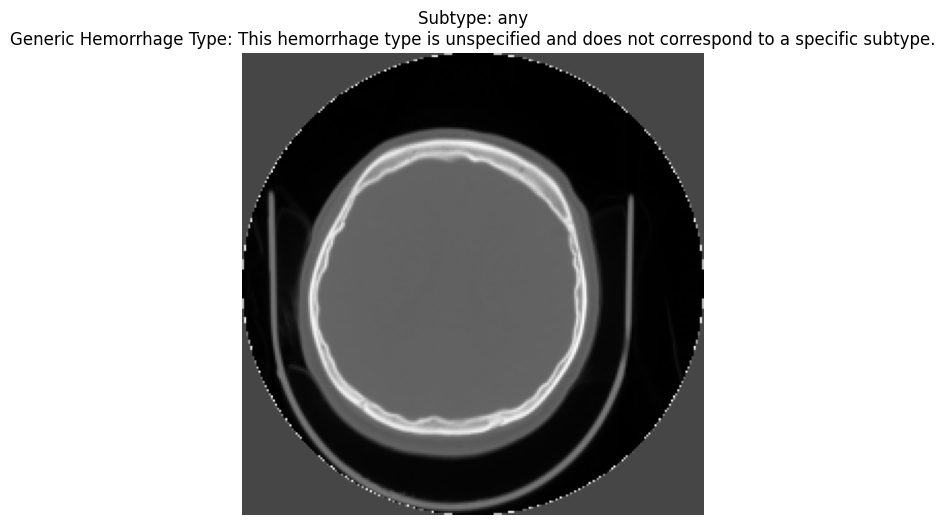

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


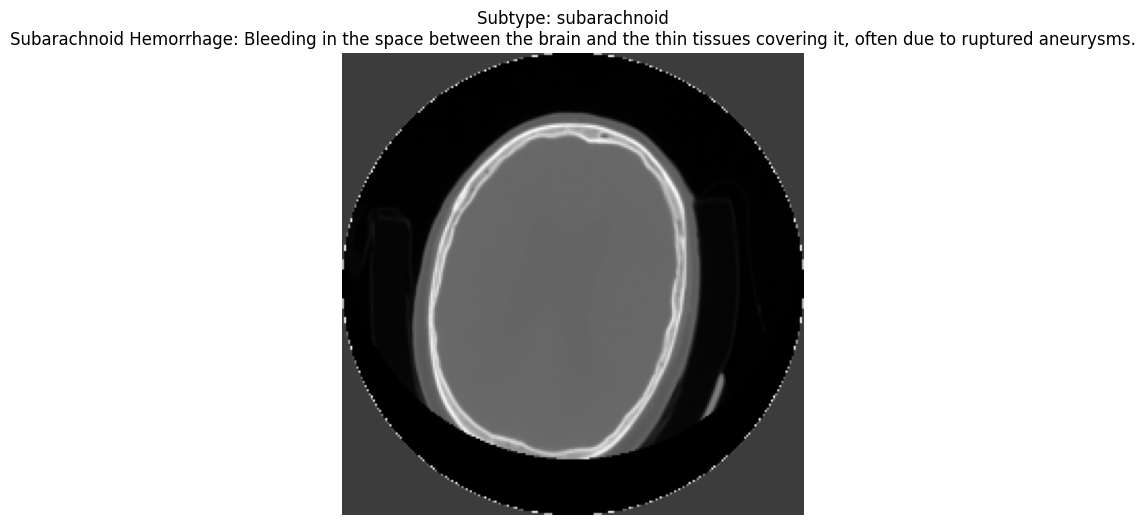

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


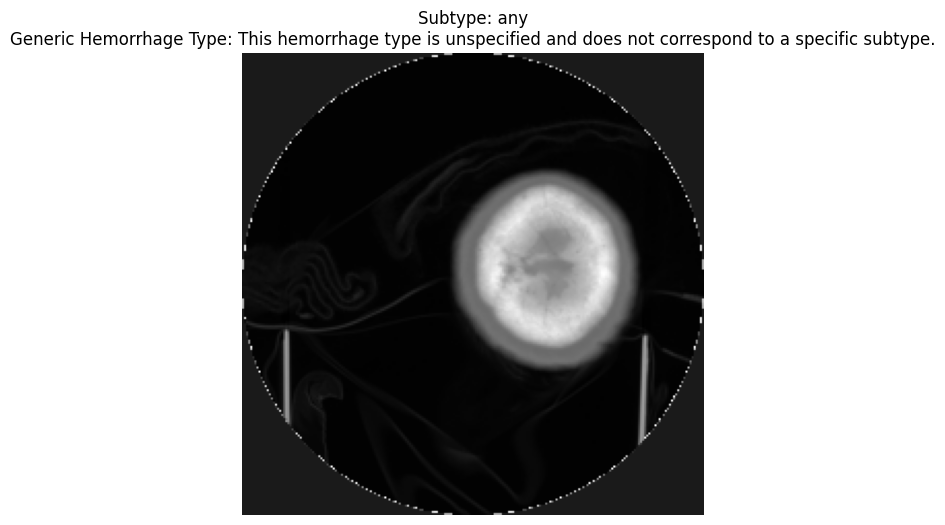

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


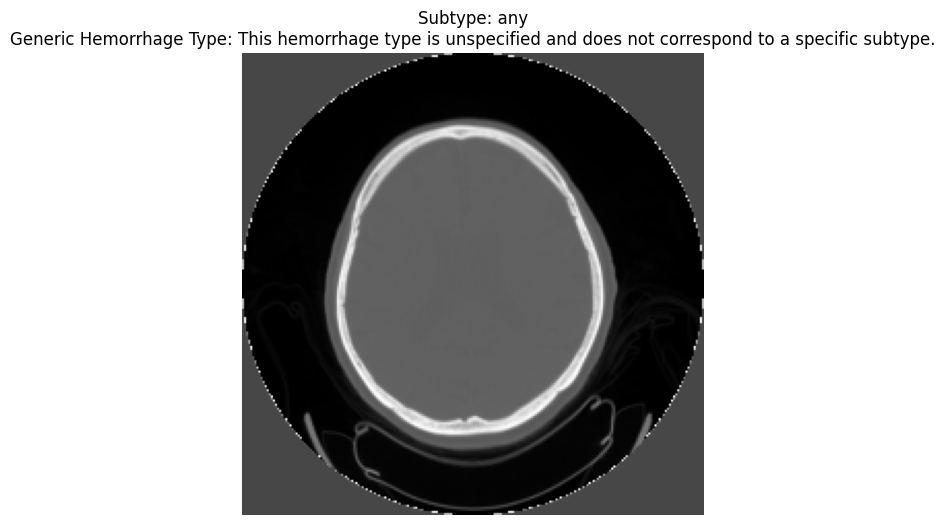

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


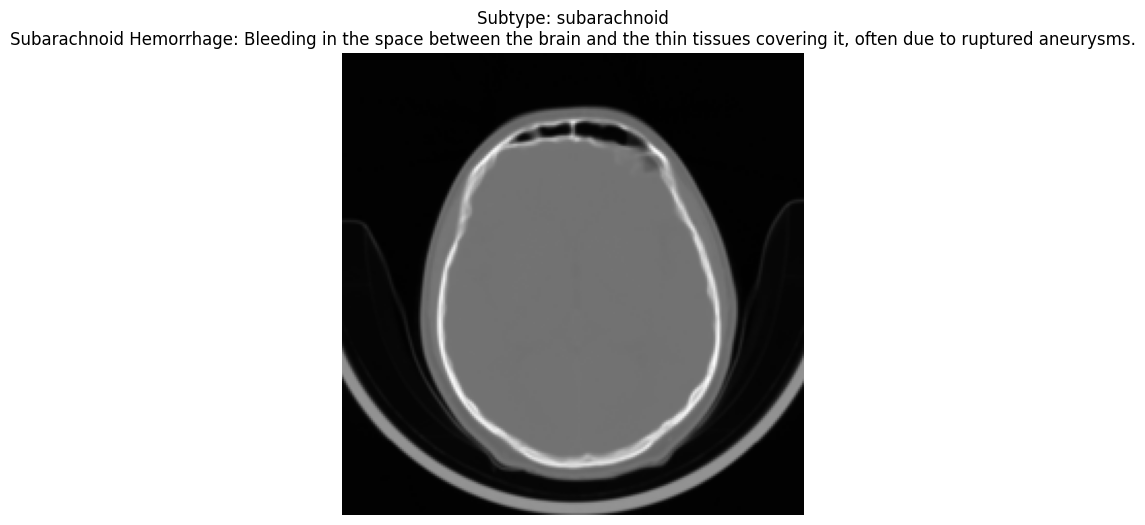

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


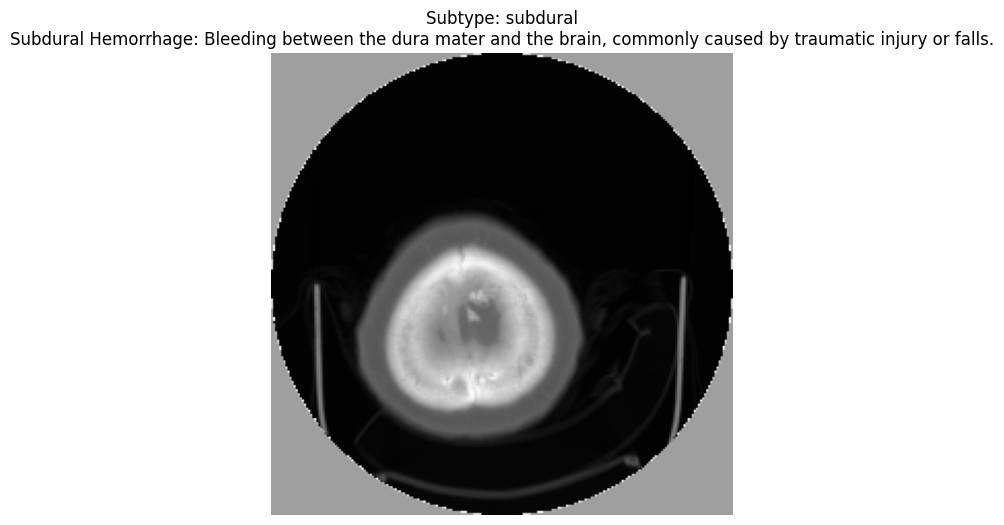

Subtype: subdural, Description: Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.


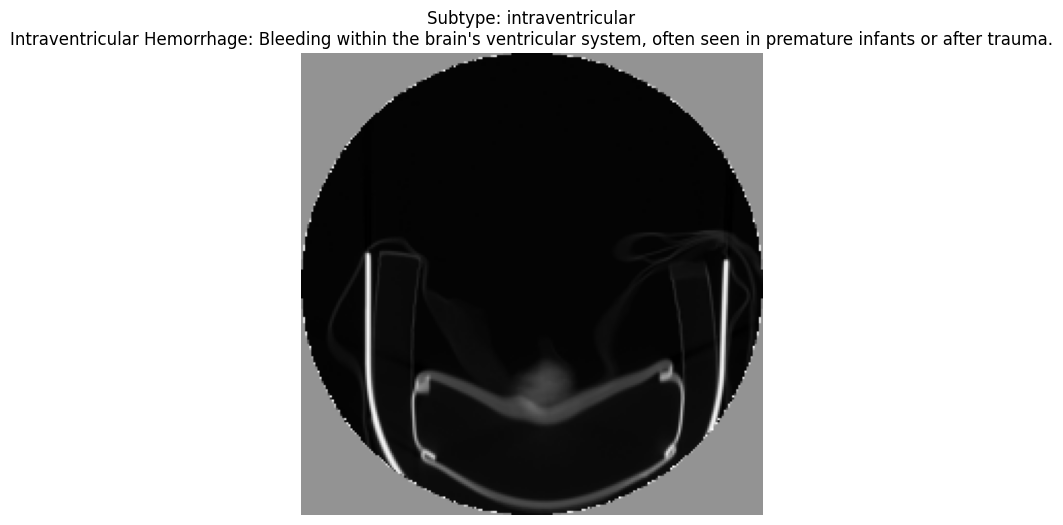

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


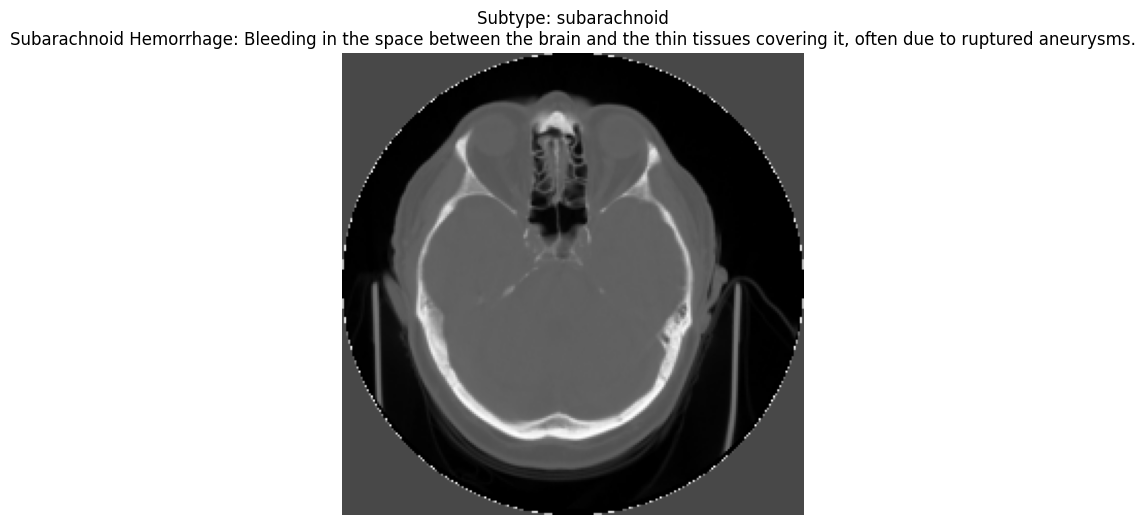

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


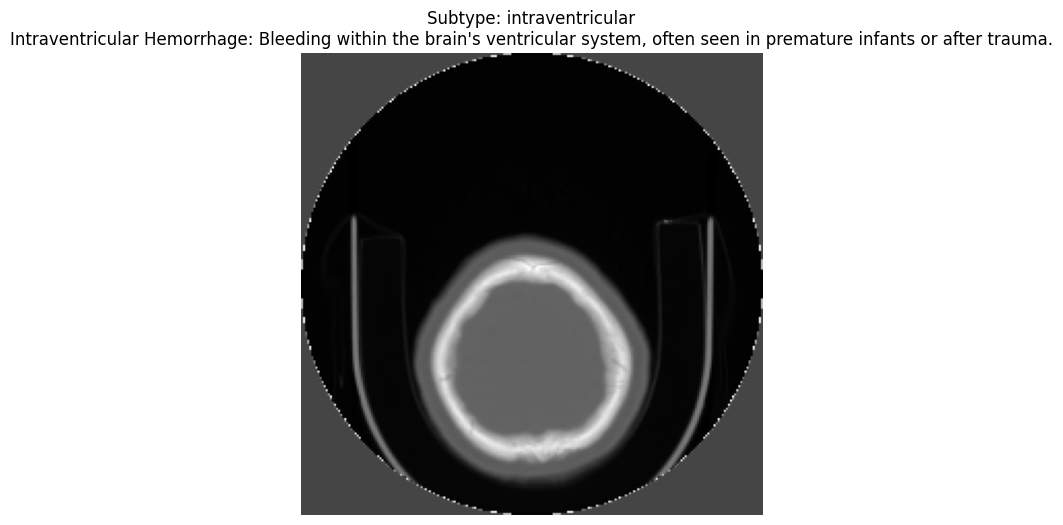

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


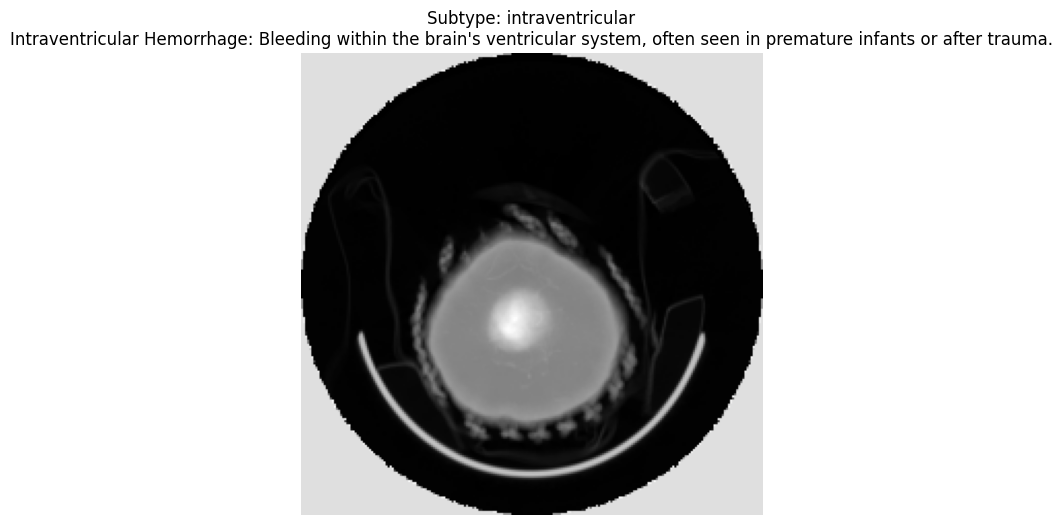

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


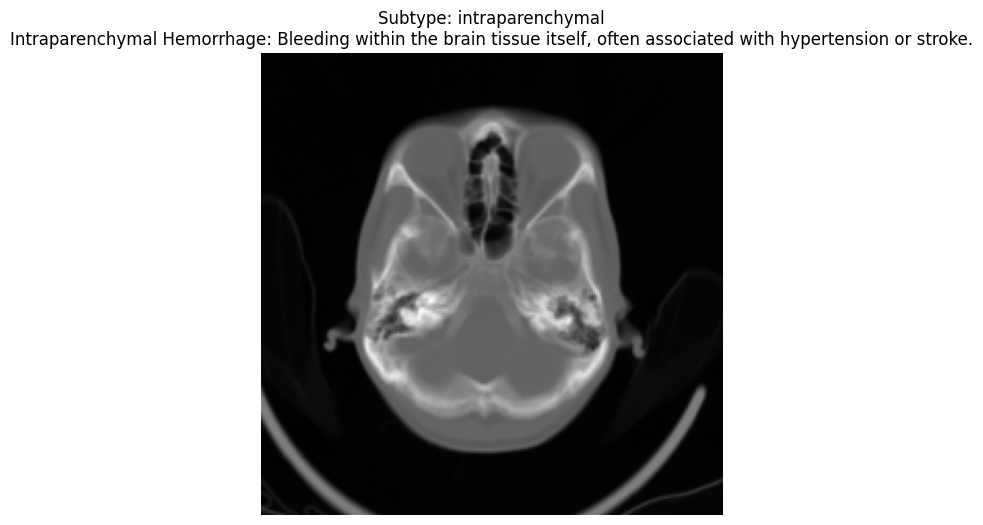

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


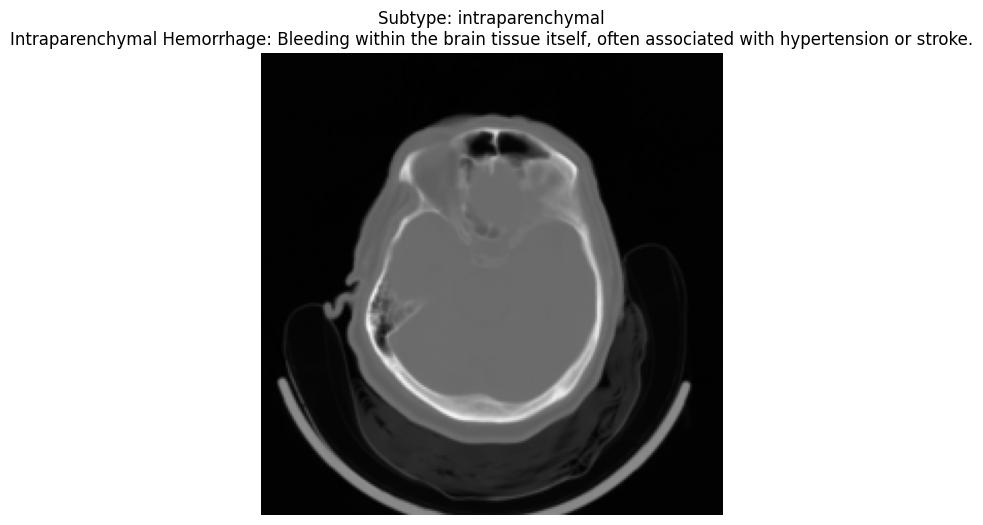

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


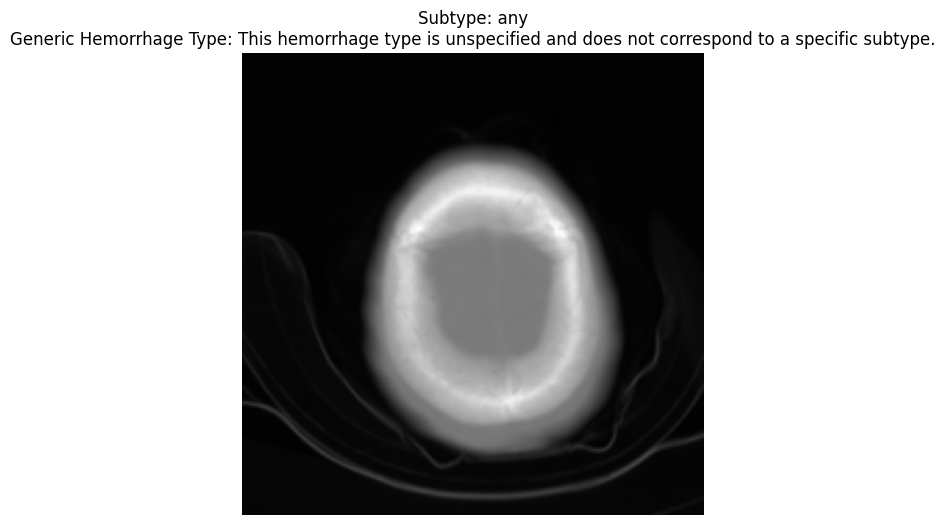

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


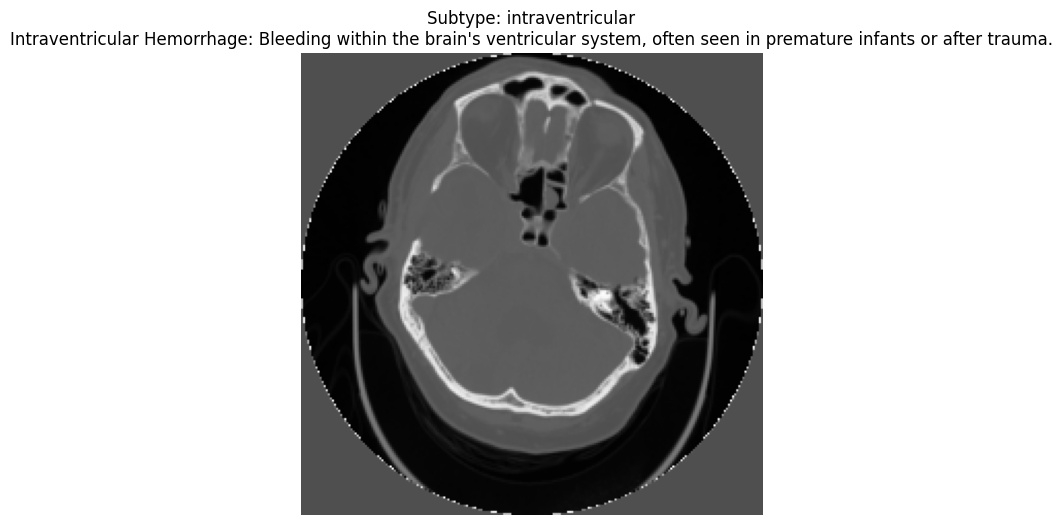

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


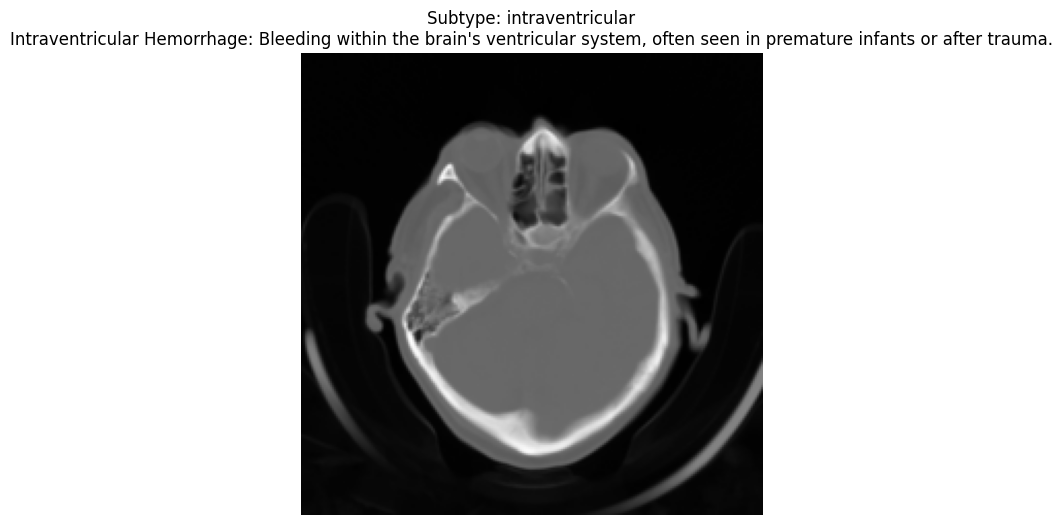

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


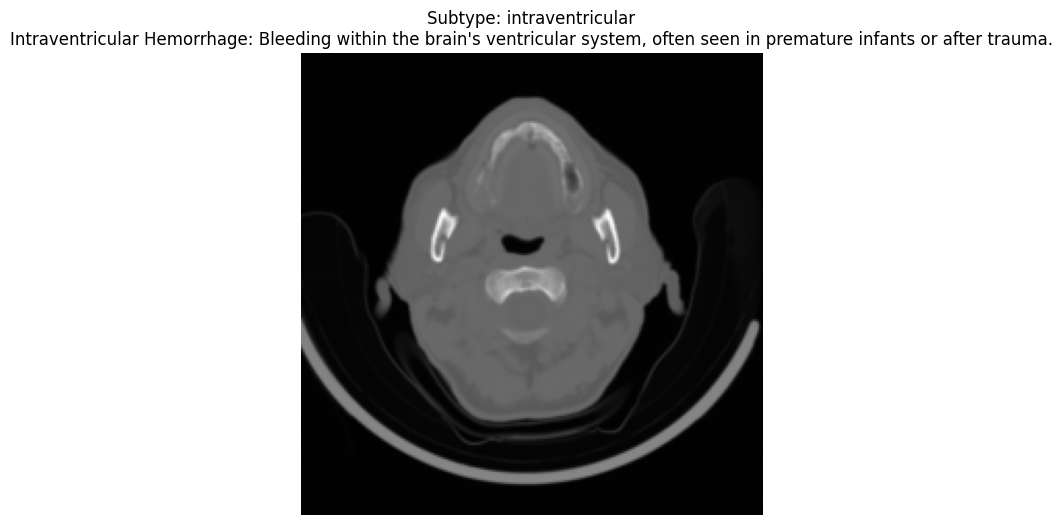

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


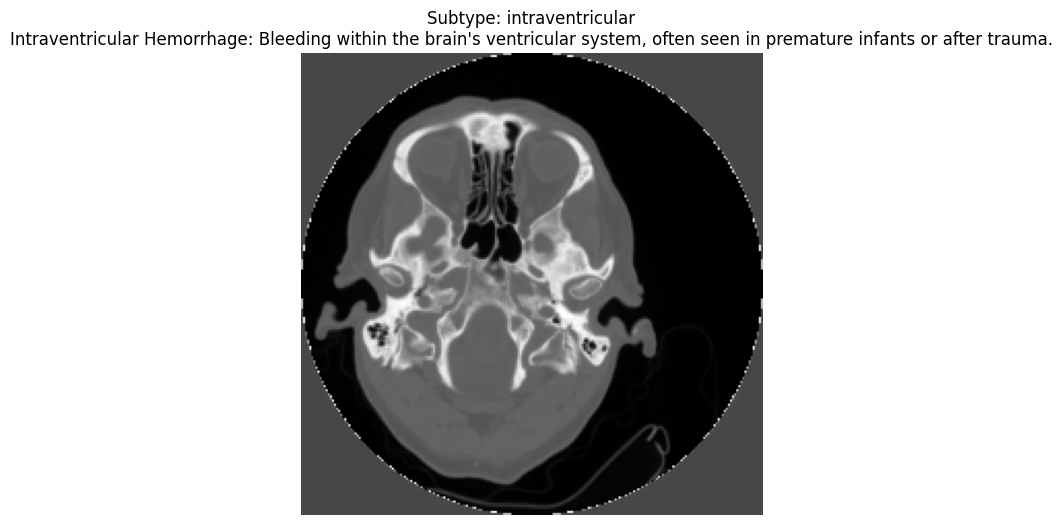

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


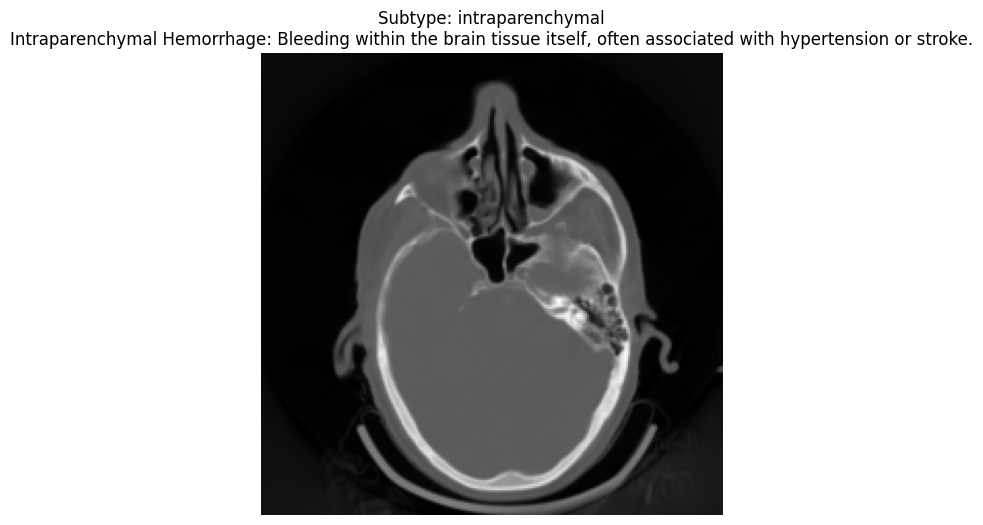

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


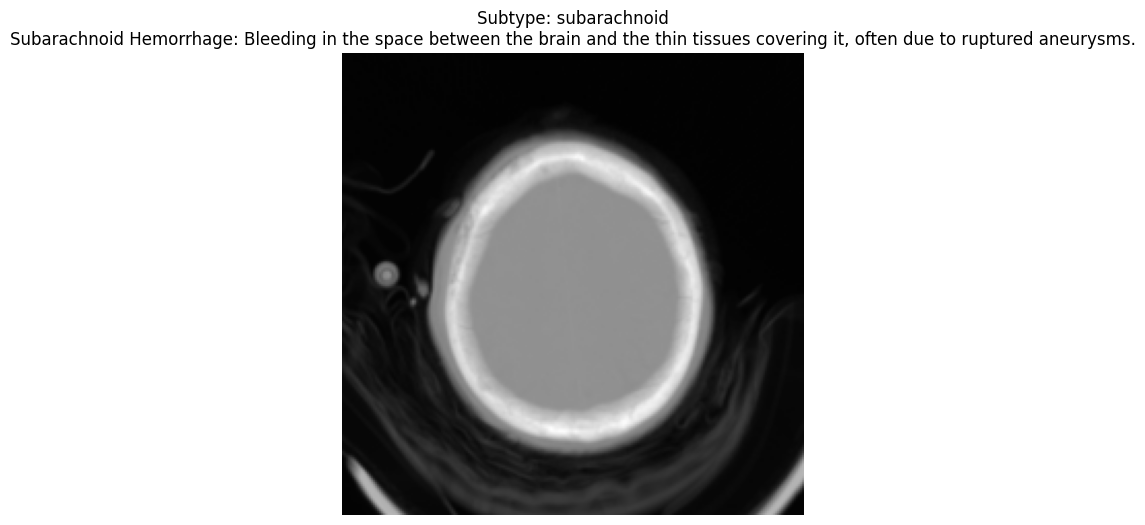

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


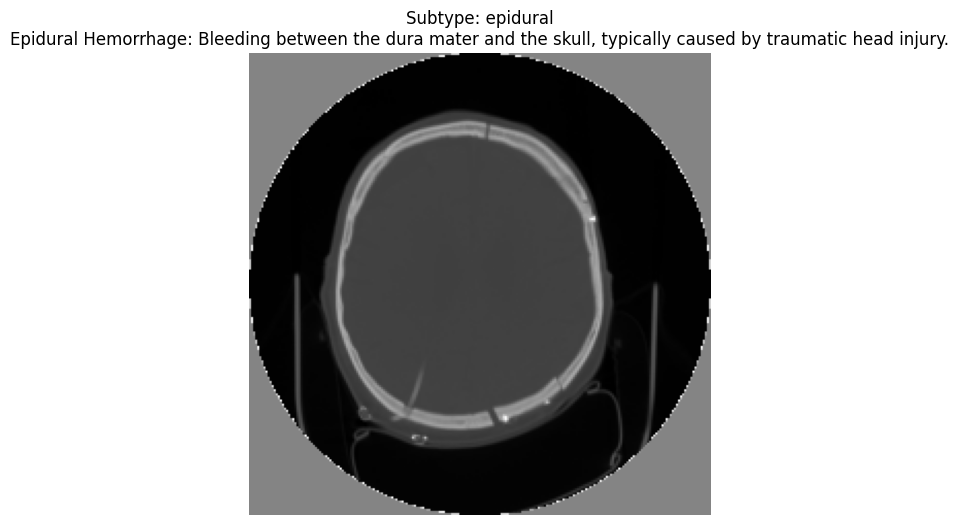

Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


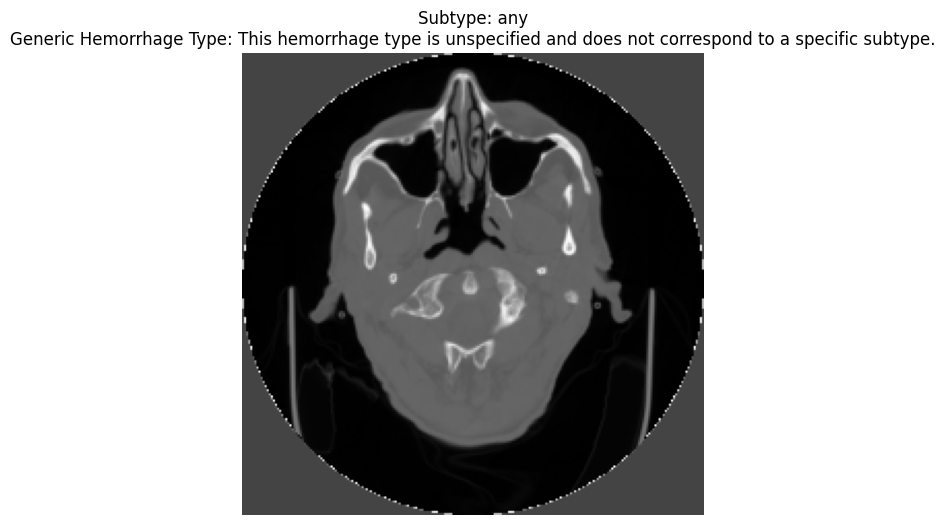

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


Subtype: subdural, Description: Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.


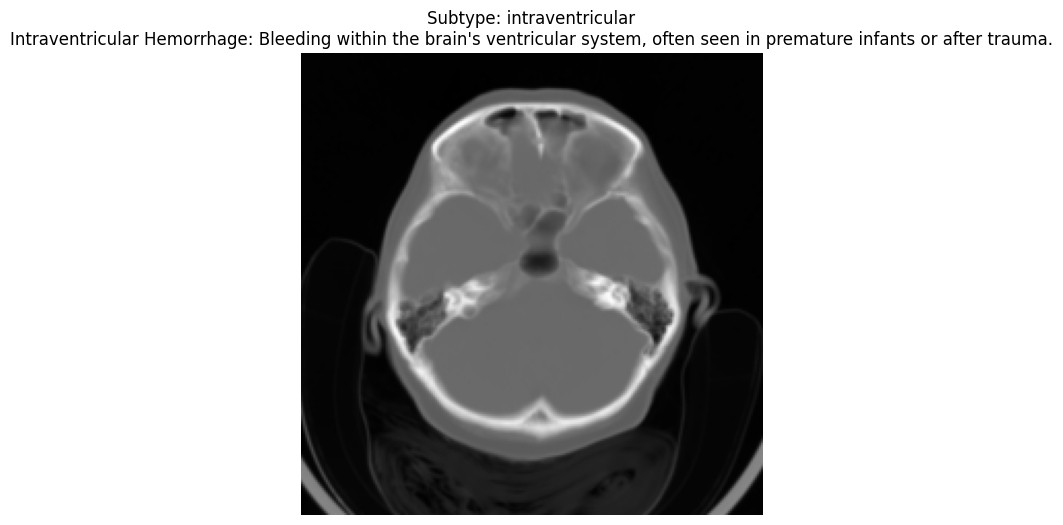

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


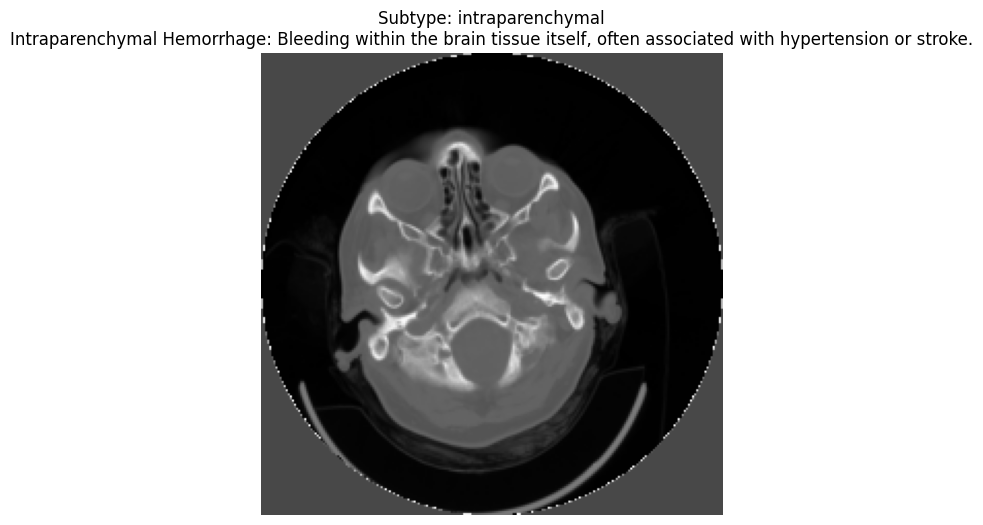

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


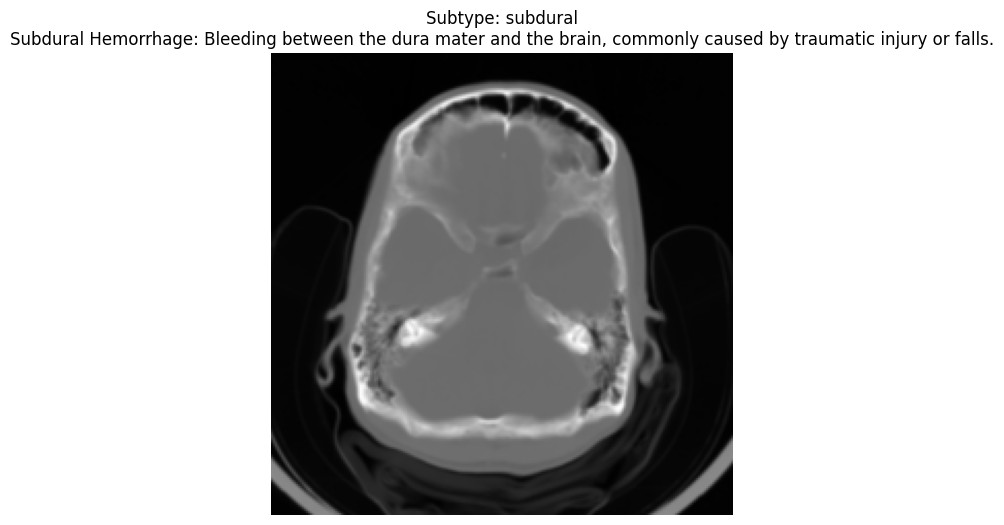

Subtype: subdural, Description: Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.


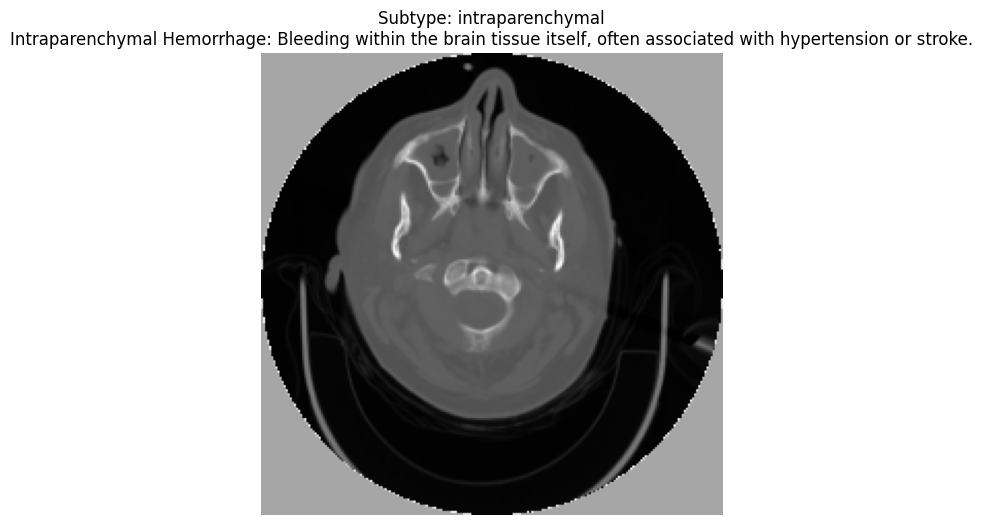

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


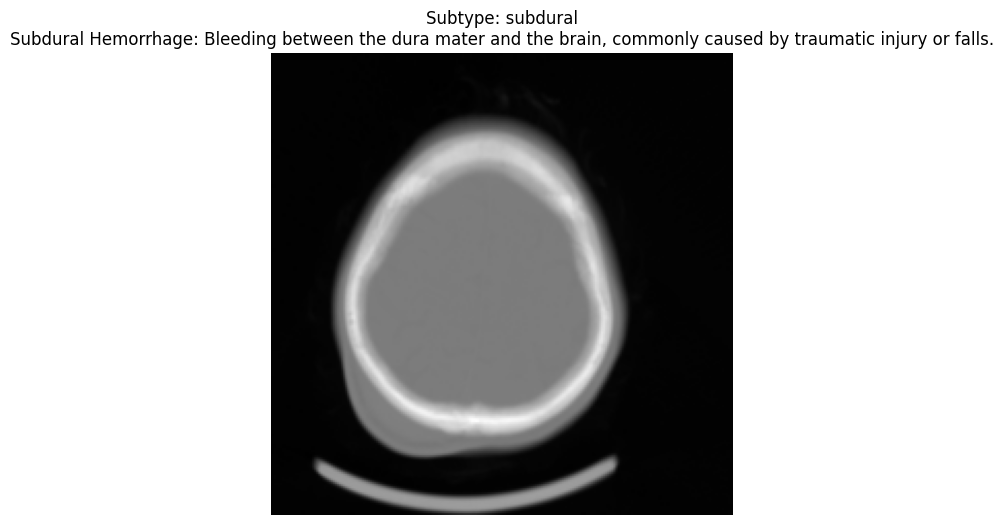

Subtype: subdural, Description: Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.


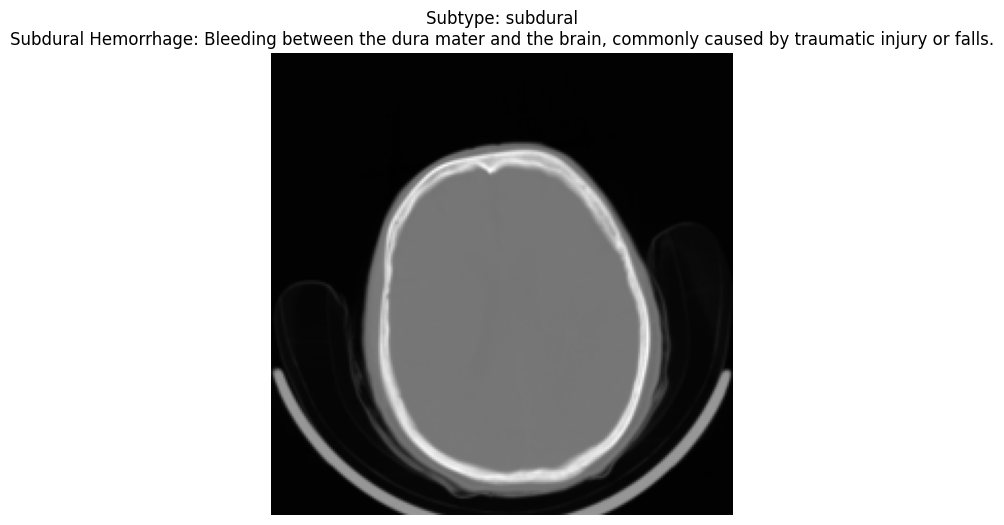

Subtype: subdural, Description: Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.


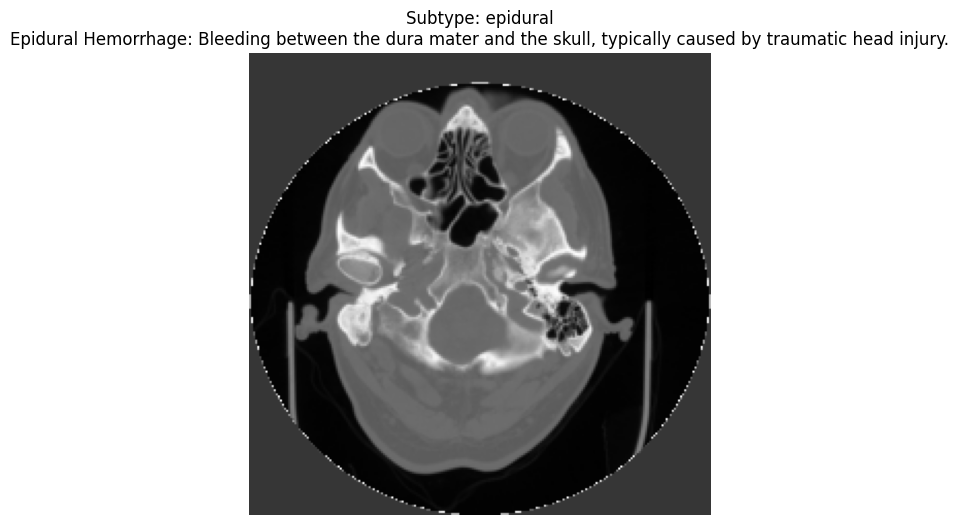

Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


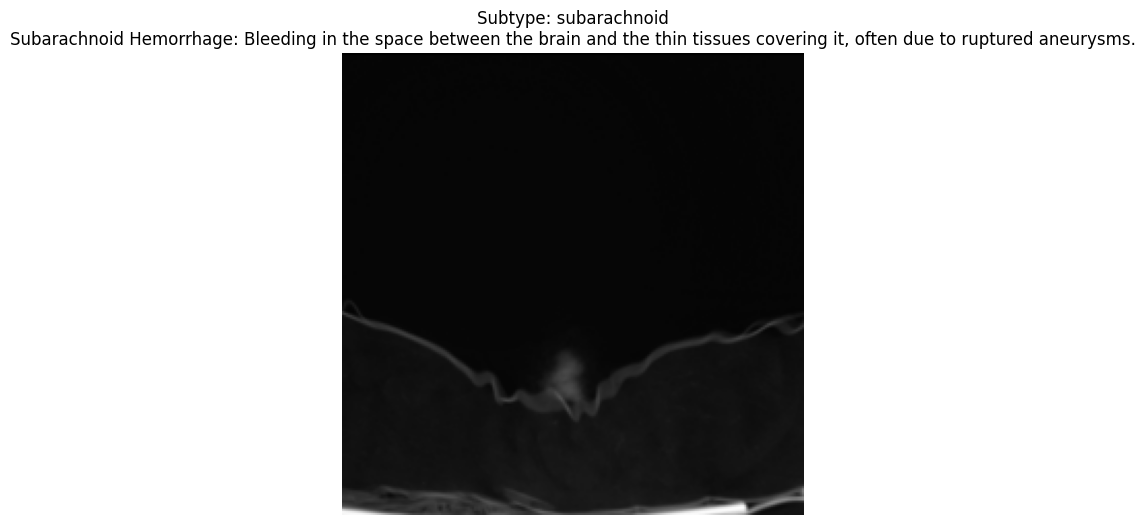

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


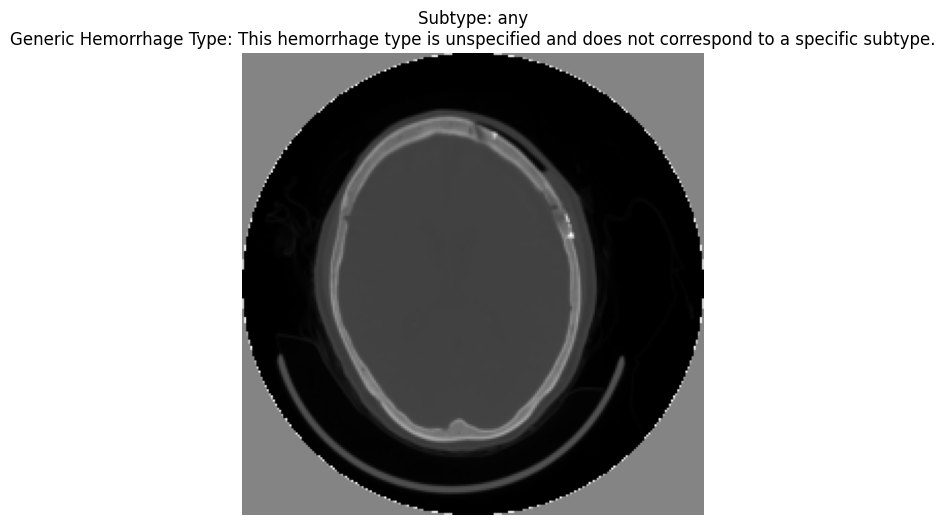

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


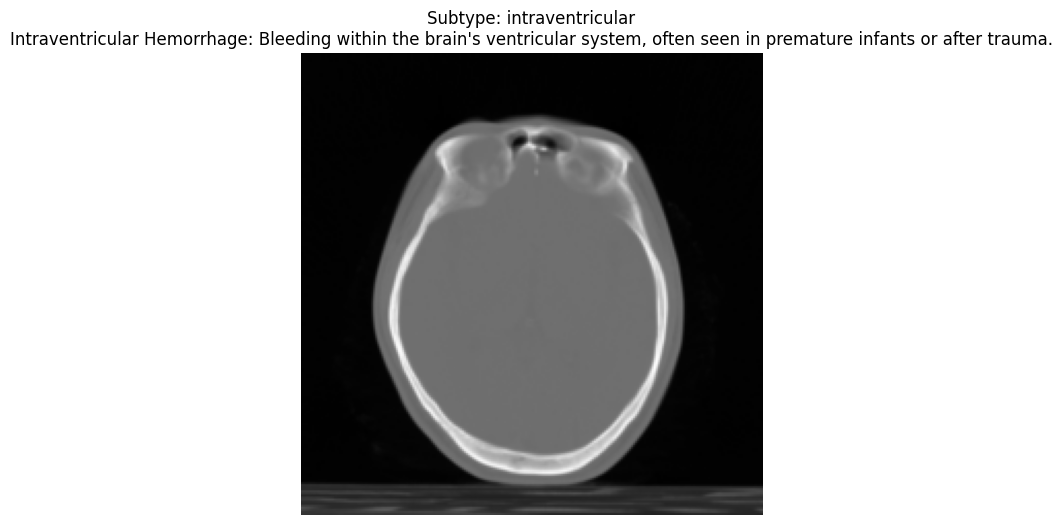

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


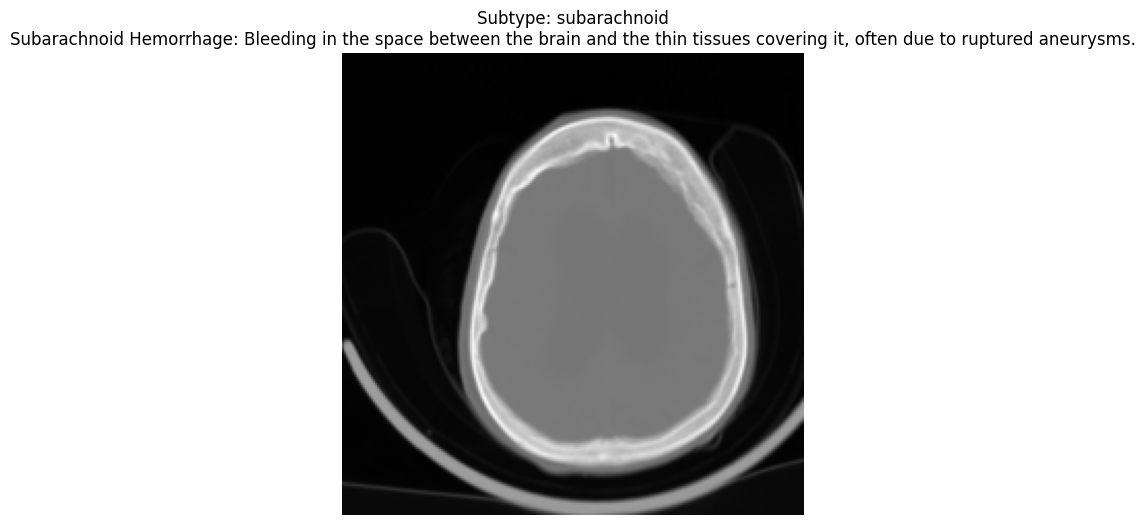

Subtype: subarachnoid, Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.


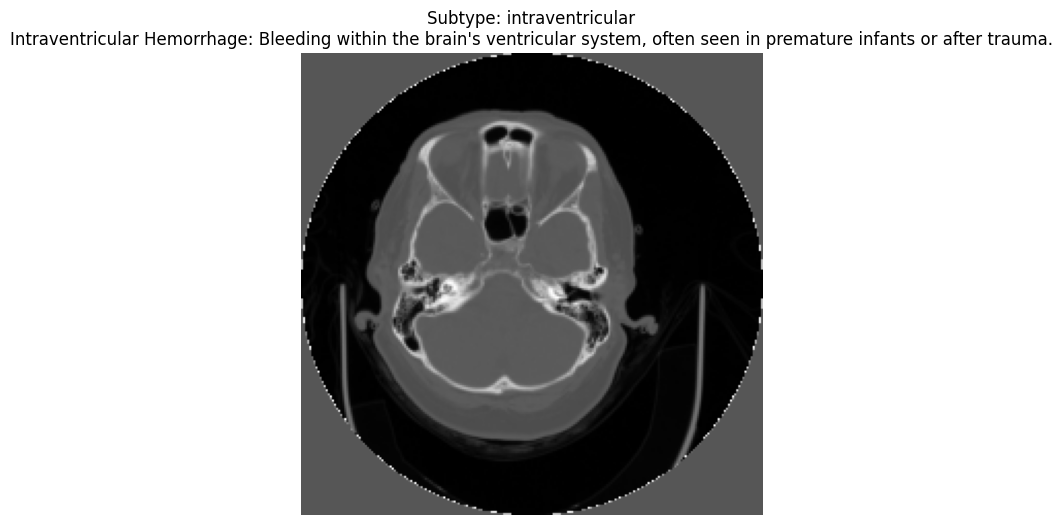

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


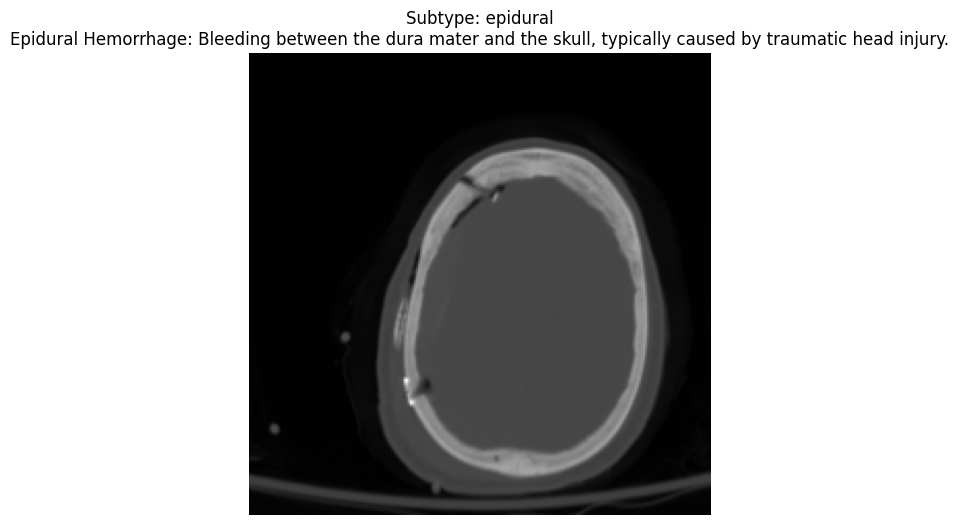

Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


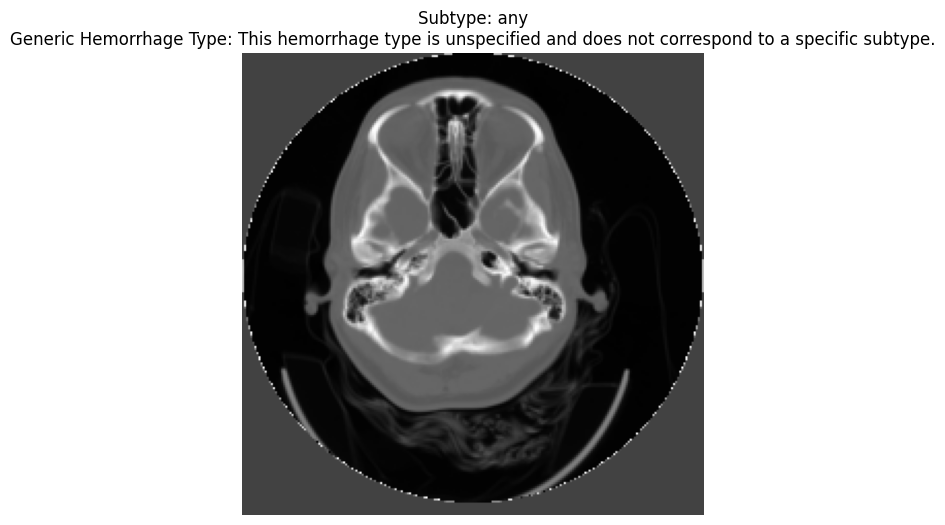

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.


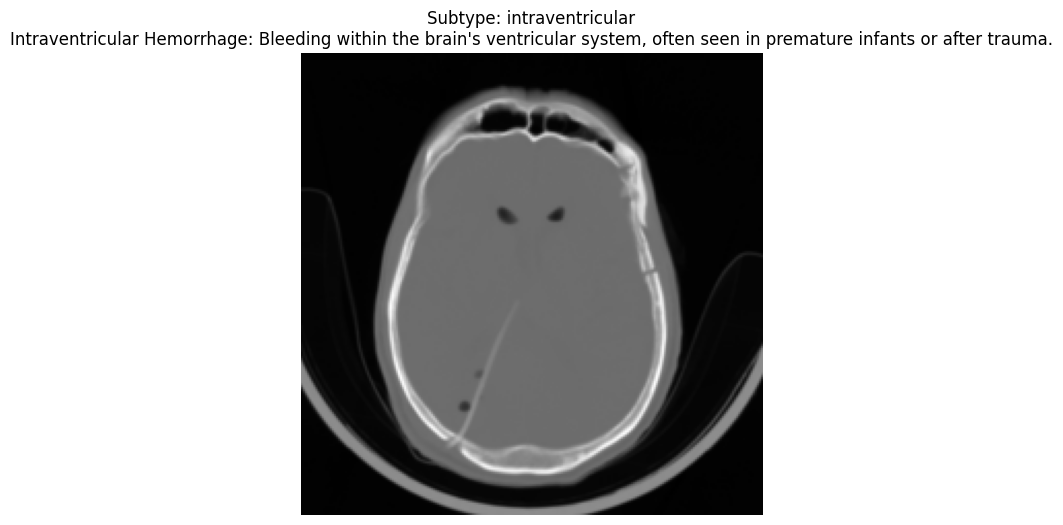

Subtype: intraventricular, Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


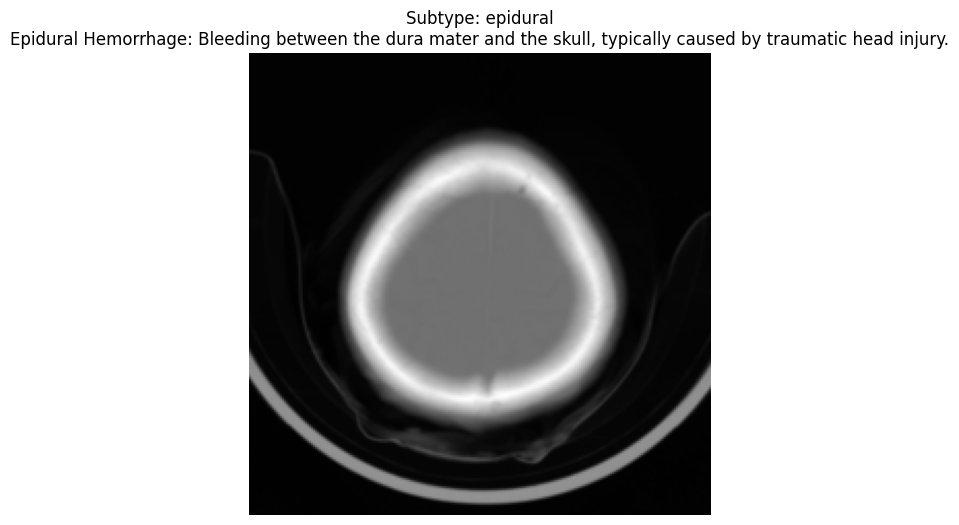

Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


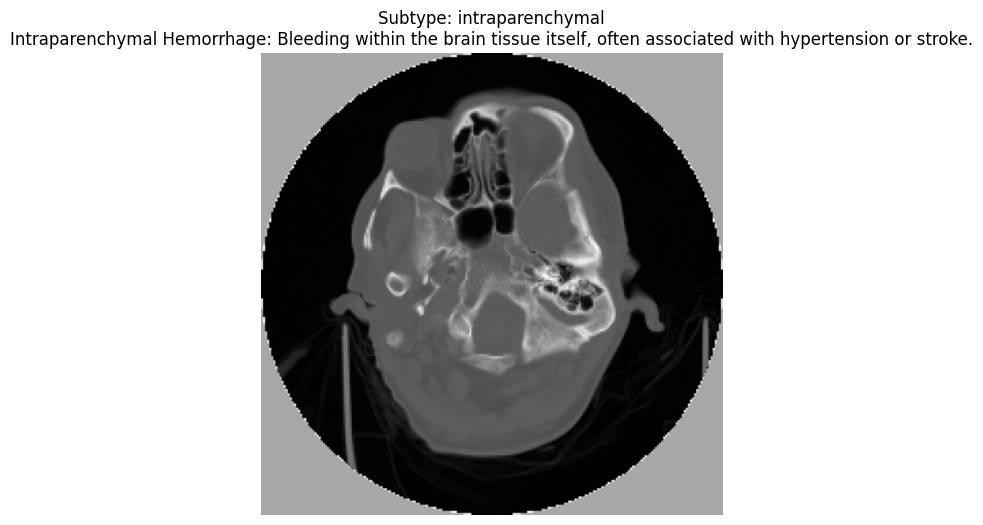

Subtype: intraparenchymal, Description: Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.


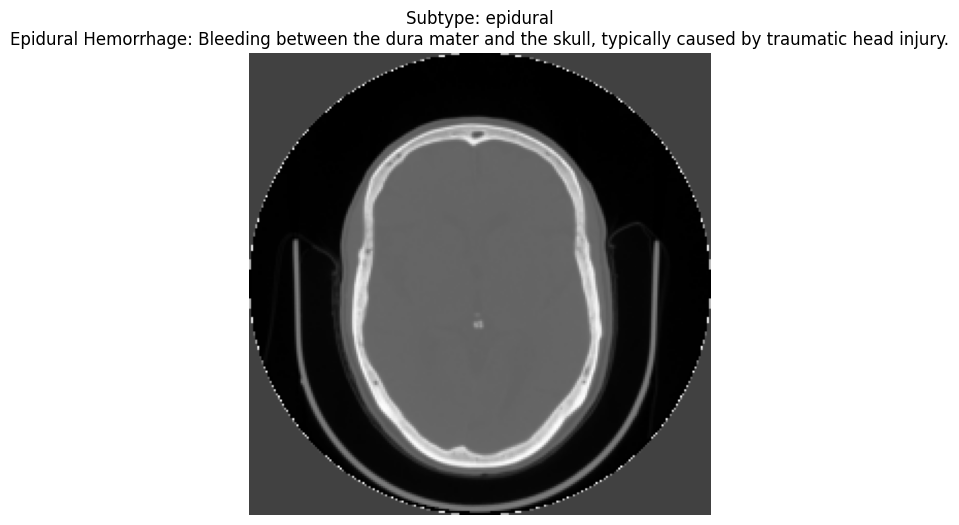

Subtype: epidural, Description: Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.


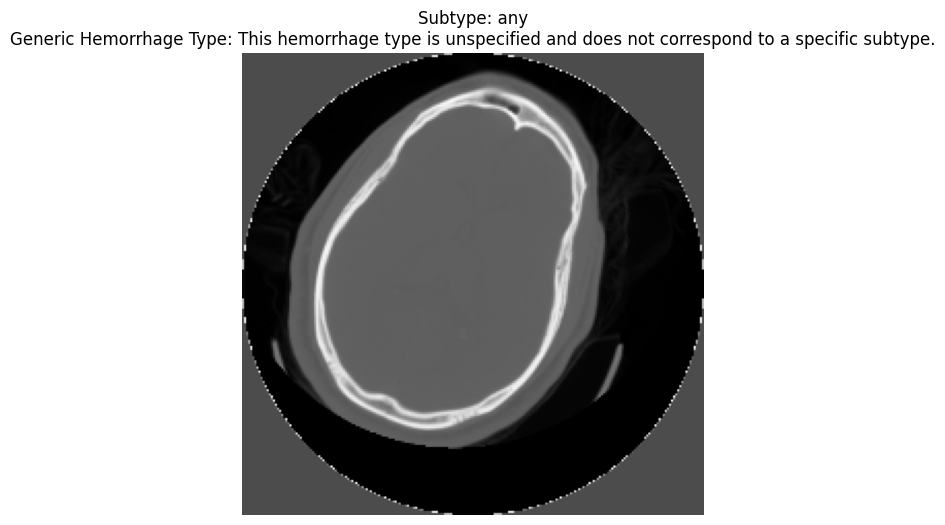

Subtype: any, Description: Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.
Completed displaying subtype descriptions.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Step 5: Display Subtype Descriptions and Images
for i, subtype in enumerate(st_test):
    # Get the image corresponding to the current subtype
    image_to_display = X_test[i]  # Get image at index i from the test set
    
    # Rescale the image back to [0, 255] for proper display
    image_to_display_rescaled = (image_to_display * 255).astype(np.uint8)
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_to_display_rescaled)
    plt.axis('off')  # Hide axes
    plt.title(f"Subtype: {subtype}\n{hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
    plt.show()

    # Optionally print the description in the console as well
    print(f"Subtype: {subtype}, Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
print("Completed displaying subtype descriptions.")


In [27]:
def predict_image(model, image_path, threshold=0.4):  # Lower the threshold here
    # Preprocess the image
    image = preprocess_image(image_path)
    if image is None:
        print("Image preprocessing failed.")
        return
    
    # Make predictions
    predictions = model.predict(image)
    
    # Extract predictions for normal vs hemorrhage and subtypes
    normal_vs_hemorrhage_prob = predictions[0][0]  # Binary classification output
    subtype_probs = predictions[1][0]  # Subtype probabilities
    
    # Handle the case when predictions return as arrays
    normal_vs_hemorrhage_prob = normal_vs_hemorrhage_prob.item() if isinstance(normal_vs_hemorrhage_prob, np.ndarray) else normal_vs_hemorrhage_prob
    
    # Determine classification with adjusted threshold
    classification = "Hemorrhage" if normal_vs_hemorrhage_prob > threshold else "Normal"
    confidence = normal_vs_hemorrhage_prob if classification == "Hemorrhage" else 1 - normal_vs_hemorrhage_prob
    
    print(f"\nPrediction for {image_path}:")
    print(f"  - Classification: {classification} (Confidence: {confidence:.2%})")
    
    # Subtype predictions
    subtypes = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']
    
    # Find the subtype with the highest probability
    max_prob_index = np.argmax(subtype_probs)
    max_prob_subtype = subtypes[max_prob_index]
    max_prob_value = subtype_probs[max_prob_index]
    
    print(f"  - Most likely subtype: {max_prob_subtype} (Probability: {max_prob_value:.2%})")
    print(f"      Description: {hemorrhage_subtype_descriptions.get(max_prob_subtype, 'No description available.')}")
    
    # Display the image
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load the image.")
        return
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.show()


In [9]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/kaggle/model/final_model.h5'  # Path where the model was saved
model = load_model(model_path)

print("Model loaded successfully.")

Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Prediction for /kaggle/input/testing/download (1).jpeg:
  - Classification: Normal (Confidence: 97.53%)
  - Most likely subtype: intraventricular (Probability: 18.84%)
      Description: Intraventricular Hemorrhage: Bleeding within the brain's ventricular system, often seen in premature infants or after trauma.


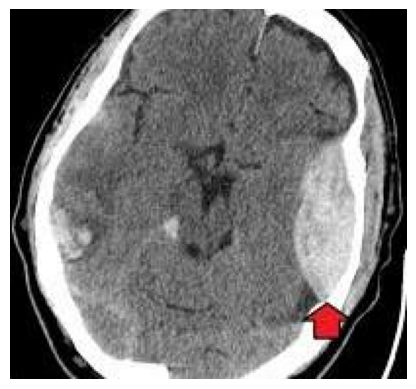

In [28]:
image_path = '/kaggle/input/testing/download (1).jpeg'  # Replace with the correct path
predict_image(model, image_path)

In [3]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import pydicom
import cv2
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 1% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 1% of the data
print("1% of the data selected.")

# Step 1.4: Preprocess the images
def load_and_preprocess_image(base_id, image_dir, target_size=(224, 224)):
    image_path = os.path.join(image_dir, f"{base_id}.dcm")  # Use base ID with '.dcm'
    
    if not os.path.exists(image_path):  # If the image is not found, return None
        print(f"Warning: Image {image_path} not found.")
        return None
    
    # Load DICOM image using pydicom
    dicom_data = pydicom.dcmread(image_path)
    
    # Convert DICOM pixel data to numpy array and normalize
    image = dicom_data.pixel_array
    
    # Resize image to target size using OpenCV
    image = cv2.resize(image, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    image = image / np.max(image)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    image = np.stack([image] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    return image

image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 1.5: Define the descriptions for each hemorrhage subtype
hemorrhage_subtype_descriptions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the dura mater and the skull, typically caused by traumatic head injury.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within the brain tissue itself, often associated with hypertension or stroke.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding within the brain\'s ventricular system, often seen in premature infants or after trauma.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the thin tissues covering it, often due to ruptured aneurysms.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and the brain, commonly caused by traumatic injury or falls.',
    'any': 'Generic Hemorrhage Type: This hemorrhage type is unspecified and does not correspond to a specific subtype.'
}
print("Hemorrhage subtype descriptions defined.")

# Step 1.6: Prepare the dataset
images = []
labels = []
subtypes = []

subtype_mapping = {'epidural': 0, 'intraparenchymal': 1, 'intraventricular': 2, 'subarachnoid': 3, 'subdural': 4, 'any': 5}

for _, row in train_df.iterrows():
    base_id = row['Base_ID']
    subtype = row['ID'].split('_')[2] if len(row['ID'].split('_')) > 2 else 'any'  # Extract subtype or 'any' if missing
    image = load_and_preprocess_image(base_id, image_dir)
    
    if image is None:  # Skip the image if not found
        continue
    
    images.append(image)
    labels.append(row['Label'])
    subtypes.append(subtype)

# Ensure the lengths match
assert len(images) == len(labels) == len(subtypes), f"Mismatch: {len(images)} images, {len(labels)} labels, {len(subtypes)} subtypes"

images = np.array(images)
labels = np.array(labels)
subtypes = np.array(subtypes)

# One-hot encode the subtype labels
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in subtypes]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

print(f"Dataset prepared with {len(images)} images.")

# Step 2: Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp, st_train, st_temp = train_test_split(images, labels, subtypes, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, st_val, st_test = train_test_split(X_temp, y_temp, st_temp, test_size=0.5, random_state=42)

# One-hot encode the validation set's subtypes
y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print("Data split into training, validation, and test sets.")

# Step 3: Model Architecture (CNN)
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers
output_layer1 = Dense(1, activation='sigmoid', name='normal_vs_hemorrhage')(x)  # Normal vs Hemorrhage
output_layer2 = Dense(6, activation='softmax', name='hemorrhage_subtype')(x)  # Hemorrhage subtypes

# Model definition
model = Model(inputs=input_layer, outputs=[output_layer1, output_layer2])
print("CNN model architecture defined.")

# Check the lengths of the data arrays
print(f"Images: {len(images)}")
print(f"Labels: {len(labels)}")
print(f"Subtypes: {len(subtypes)}")

# Ensure that all arrays are the same length
assert len(images) == len(labels) == len(subtypes), "Mismatch in data lengths."

# Ensure the splits are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# One-hot encode the subtypes for the training and validation sets
y_train_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_train]
y_train_subtypes = to_categorical(y_train_subtypes, num_classes=6)

y_val_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_val]
y_val_subtypes = to_categorical(y_val_subtypes, num_classes=6)

print(f"Training subtypes shape: {y_train_subtypes.shape}")
print(f"Validation subtypes shape: {y_val_subtypes.shape}")

# Step 4: Compile and Train the Model
# Step 4.1: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'normal_vs_hemorrhage': 'binary_crossentropy', 'hemorrhage_subtype': 'categorical_crossentropy'},
              metrics={'normal_vs_hemorrhage': 'accuracy', 'hemorrhage_subtype': 'accuracy'})
print("Model compiled.")

# Step 4.2: Train the model
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(
    X_train,
    {'normal_vs_hemorrhage': y_train, 'hemorrhage_subtype': y_train_subtypes},  # Pass labels and subtypes as dictionaries
    epochs=2,
    batch_size=32,
    validation_data=(X_val, {'normal_vs_hemorrhage': y_val, 'hemorrhage_subtype': y_val_subtypes}),
    callbacks=[checkpoint]
)
print("Model training complete.")

# Step 4.3: Save the model
model_dir = '/kaggle/model'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the model file path
model_path = os.path.join(model_dir, 'final_model.h5')

# Save the model to the directory
model.save(model_path)
print(f"Model saved to {model_path}.")

# Step 4.4: Evaluate the model
# Use binary labels for normal vs hemorrhage and one-hot encoded labels for hemorrhage subtype
y_test_normal = np.array(y_test)  # Use binary labels for the normal vs hemorrhage task

y_test_subtypes = [subtype_mapping.get(subtype, 5) for subtype in st_test]
y_test_subtypes = to_categorical(y_test_subtypes, num_classes=6)

test_loss, test_acc_normal, test_acc_subtype = model.evaluate(
    X_test, 
    {'normal_vs_hemorrhage': y_test_normal, 'hemorrhage_subtype': y_test_subtypes}  # Use binary labels for the binary classification
)

print(f"Test Loss: {test_loss}, Test Accuracy (Normal vs Hemorrhage): {test_acc_normal}, Test Accuracy (Hemorrhage Subtypes): {test_acc_subtype}")

# Step 5: Display Subtype Descriptions
for subtype in st_test:
    print(f"Subtype: {subtype}, Description: {hemorrhage_subtype_descriptions.get(subtype, 'No description available.')}")
print("Completed displaying subtype descriptions.")

# Step 6: Prediction Function for New Data (Optional)
def predict_image(image_path, model):
    # Load and preprocess image
    image = load_and_preprocess_image(image_path)
    
    if image is None:
        return None

    image = np.expand_dims(image, axis=0)  # Add batch dimension
    
    # Predict using the model
    normal_vs_hemorrhage, hemorrhage_subtype = model.predict(image)
    
    return normal_vs_hemorrhage, hemorrhage_subtype

print("Ready to make predictions.")

CSV file loaded successfully.
Base IDs extracted from CSV.
1% of the data selected.
Hemorrhage subtype descriptions defined.
Dataset prepared with 452 images.
Data split into training, validation, and test sets.
CNN model architecture defined.
Images: 452
Labels: 452
Subtypes: 452
Training set size: 361
Validation set size: 45
Test set size: 46
Training subtypes shape: (361, 6)
Validation subtypes shape: (45, 6)
Model compiled.
Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - hemorrhage_subtype_accuracy: 0.1864 - loss: 2.2263 - normal_vs_hemorrhage_accuracy: 0.8775 - val_hemorrhage_subtype_accuracy: 0.1333 - val_loss: 1.9631 - val_normal_vs_hemorrhage_accuracy: 0.9778
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - hemorrhage_subtype_accuracy: 0.1944 - loss: 2.0349 - normal_vs_hemorrhage_accuracy: 0.9557 - val_hemorrhage_subtype_accuracy: 0.1333 - val_loss: 2.0346 - val_normal_vs_hemorrhage_accuracy: 0.9778
Model training complete.
Model saved to /kaggle/model/final_model.h5.
2/2 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


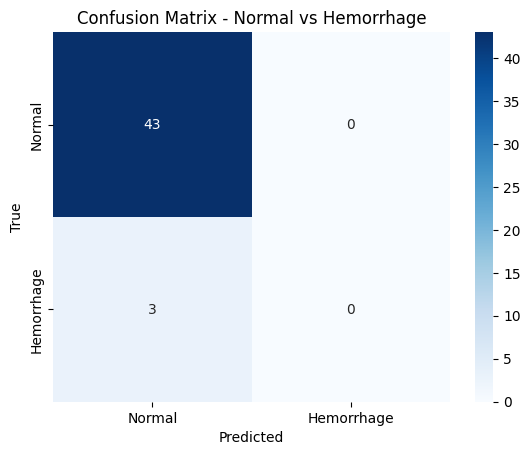

Classification Report for Normal vs Hemorrhage:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.00      0.00         3

    accuracy                           0.93        46
   macro avg       0.97      0.50      0.48        46
weighted avg       0.94      0.93      0.90        46

AUC for Normal vs Hemorrhage: 0.5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


Classification Report for Hemorrhage Subtypes:
                  precision    recall  f1-score   support

        epidural       1.00      0.00      0.00         7
 intraparencymal       0.15      1.00      0.26         7
intraventricular       1.00      0.00      0.00        12
    subarachnoid       1.00      0.00      0.00         7
        subdural       1.00      0.00      0.00         5
           other       1.00      0.00      0.00         8

        accuracy                           0.15        46
       macro avg       0.86      0.17      0.04        46
    weighted avg       0.87      0.15      0.04        46



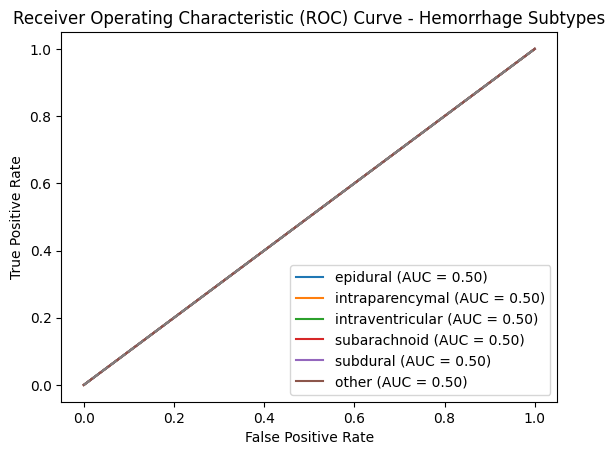

In [40]:
# Step 7: Model Evaluation & Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the subtypes list for hemorrhage classification (adjust as needed)
subtypes = ['epidural', 'intraparencymal', 'intraventricular', 'subarachnoid', 'subdural', 'other']  # Adjust according to your classes

# Confusion Matrix for Normal vs Hemorrhage Classification
y_pred_normal = model.predict(X_test)[0]  # Get predictions for the normal vs hemorrhage task
y_test_normal = np.array(y_test)  # Binary labels for normal vs hemorrhage
y_pred_normal = (y_pred_normal > 0.5).astype(int)  # Convert predictions to 0 or 1

# Confusion matrix for Normal vs Hemorrhage
cm_normal = confusion_matrix(y_test_normal, y_pred_normal)
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Hemorrhage'], yticklabels=['Normal', 'Hemorrhage'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Normal vs Hemorrhage")
plt.show()

# Classification Report for Normal vs Hemorrhage
print("Classification Report for Normal vs Hemorrhage:")
print(classification_report(y_test_normal, y_pred_normal, zero_division=1))

# ROC Curve and AUC for Normal vs Hemorrhage
fpr, tpr, thresholds = roc_curve(y_test_normal, y_pred_normal)
auc_normal = roc_auc_score(y_test_normal, y_pred_normal)
print(f"AUC for Normal vs Hemorrhage: {auc_normal}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_normal:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Normal vs Hemorrhage')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Hemorrhage Subtype Classification
y_pred_subtypes = model.predict(X_test)[1]  # Get predictions for subtypes
y_pred_subtypes = np.argmax(y_pred_subtypes, axis=1)  # Get class with highest probability
y_test_subtypes = np.array(y_test_subtypes)  # Ground truth subtypes (no need for np.argmax if already labeled)

# Confusion matrix for Hemorrhage Subtypes
cm_subtypes = confusion_matrix(y_test_subtypes, y_pred_subtypes)
sns.heatmap(cm_subtypes, annot=True, fmt='d', cmap='Blues', xticklabels=subtypes, yticklabels=subtypes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Hemorrhage Subtypes")
plt.show()

# Classification Report for Hemorrhage Subtypes
print("Classification Report for Hemorrhage Subtypes:")
print(classification_report(y_test_subtypes, y_pred_subtypes, target_names=subtypes, zero_division=1))

# ROC Curve and AUC for Hemorrhage Subtypes (optional)
# AUC calculation for multi-class: Compute AUC for each class individually (or use `ovr` or `ovo` for multi-class strategy)
fpr_subtypes = {}
tpr_subtypes = {}
roc_auc_subtypes = {}

for i in range(len(subtypes)):
    fpr_subtypes[i], tpr_subtypes[i], _ = roc_curve(y_test_subtypes == i, y_pred_subtypes == i)
    roc_auc_subtypes[i] = roc_auc_score(y_test_subtypes == i, y_pred_subtypes == i)

# Plot AUC for each subtype
plt.figure()
for i in range(len(subtypes)):
    plt.plot(fpr_subtypes[i], tpr_subtypes[i], label=f'{subtypes[i]} (AUC = {roc_auc_subtypes[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Hemorrhage Subtypes')
plt.legend(loc="lower right")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


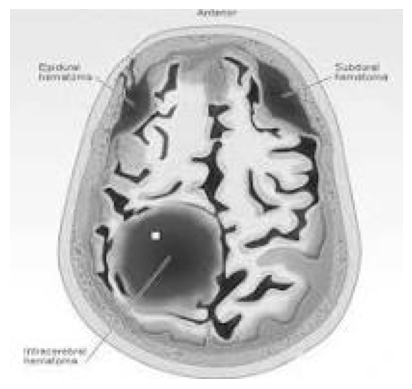

Prediction: Normal (Probability: 0.01)
Subtype Prediction: intraparenchymal
Subtype Probabilities:
epidural: 0.12
intraparenchymal: 0.24
intraventricular: 0.18
subarachnoid: 0.12
subdural: 0.19
any: 0.16

Conclusion:
The most likely subtype is: intraparenchymal with a probability of 23.66%
Description: Intraparenchymal hemorrhage refers to bleeding within the brain tissue itself, often caused by high blood pressure or trauma.


In [15]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pydicom

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image for prediction.
    :param image_path: Path to the image file.
    :param target_size: The target size for resizing the image to fit the model's input size.
    :return: Preprocessed image ready for prediction.
    """
    # Check the file extension
    file_extension = image_path.split('.')[-1].lower()

    if file_extension in ['dcm']:
        # Load DICOM image using pydicom
        try:
            dicom_data = pydicom.dcmread(image_path, force=True)
            img = dicom_data.pixel_array
        except pydicom.errors.InvalidDicomError:
            print(f"Error: {image_path} is not a valid DICOM file.")
            return None
    elif file_extension in ['jpg', 'jpeg', 'png', 'bmp', 'tiff']:
        # Load image using OpenCV for other formats like PNG, JPEG
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        print(f"Unsupported file format: {file_extension}")
        return None

    # Resize image to target size using OpenCV
    img = cv2.resize(img, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    img = img / np.max(img)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    img = np.stack([img] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    # Add batch dimension (for prediction compatibility)
    img = np.expand_dims(img, axis=0)

    return img

def predict_image(image_path, model):
    """
    Predict the class of the image using the trained model.
    :param image_path: Path to the image file.
    :param model: The trained model used for prediction.
    :return: Predicted class label and probabilities.
    """
    # Preprocess the image
    img = load_and_preprocess_image(image_path)
    
    if img is None:
        return None, None, None, None
    
    # Get prediction
    normal_vs_hemorrhage, hemorrhage_subtype = model.predict(img)
    
    # Interpret the binary prediction (Normal vs Hemorrhage)
    normal_vs_hemorrhage_label = "Normal" if normal_vs_hemorrhage[0] < 0.5 else "Hemorrhage"
    normal_vs_hemorrhage_prob = normal_vs_hemorrhage[0] if normal_vs_hemorrhage[0] < 0.5 else 1 - normal_vs_hemorrhage[0]
    
    # Convert the subtypes prediction into a human-readable form
    subtype_mapping = {0: 'epidural', 1: 'intraparenchymal', 2: 'intraventricular', 3: 'subarachnoid', 4: 'subdural', 5: 'any'}
    predicted_subtype = np.argmax(hemorrhage_subtype, axis=-1)[0]  # Get the index of the max probability
    subtype_label = subtype_mapping.get(predicted_subtype, 'unknown')
    subtype_probs = hemorrhage_subtype[0]  # Probabilities for each subtype
    
    return normal_vs_hemorrhage_label, normal_vs_hemorrhage_prob, subtype_label, subtype_probs

def display_image(image_path):
    """
    Display the image.
    :param image_path: Path to the image file.
    """
    # Check the file extension
    file_extension = image_path.split('.')[-1].lower()

    if file_extension in ['dcm']:
        # Load DICOM image using pydicom
        try:
            dicom_data = pydicom.dcmread(image_path, force=True)
            img = dicom_data.pixel_array
        except pydicom.errors.InvalidDicomError:
            print(f"Error: {image_path} is not a valid DICOM file.")
            return
    elif file_extension in ['jpg', 'jpeg', 'png', 'bmp', 'tiff']:
        # Load image using PIL or OpenCV for other formats like PNG, JPEG
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        print(f"Unsupported file format: {file_extension}")
        return
    
    # Plot the image using Matplotlib
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage:
model_path = '/kaggle/model/final_model.h5'  # Path to the trained model
image_path = '/kaggle/input/testoo/download.jpeg'  # Path to the image (JPEG, PNG, or DICOM)

# Load the trained model
model = load_model(model_path)

# Make a prediction
normal_vs_hemorrhage_label, normal_vs_hemorrhage_prob, subtype_label, subtype_probs = predict_image(image_path, model)

# Output prediction and probabilities
if normal_vs_hemorrhage_label is not None:
    # Display the image
    display_image(image_path)

    # Output prediction and probabilities
    print(f"Prediction: {normal_vs_hemorrhage_label} (Probability: {normal_vs_hemorrhage_prob[0]:.2f})")
    print(f"Subtype Prediction: {subtype_label}")
    print("Subtype Probabilities:")
    for i, (subtype, prob) in enumerate(zip(['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any'], subtype_probs)):
        print(f"{subtype}: {prob:.2f}")
    
    # Conclusion: Select the highest probability subtype and its description
    highest_prob_index = np.argmax(subtype_probs)
    
    # Subtype description mapping
    subtype_descriptions = {
        'epidural': 'Epidural hemorrhage occurs between the dura mater and the skull. It may cause symptoms like headache, nausea, and unconsciousness.',
        'intraparenchymal': 'Intraparenchymal hemorrhage refers to bleeding within the brain tissue itself, often caused by high blood pressure or trauma.',
        'intraventricular': 'Intraventricular hemorrhage occurs within the brain ventricles, often leading to severe neurological complications.',
        'subarachnoid': 'Subarachnoid hemorrhage occurs in the space between the brain and the surrounding membrane, often associated with aneurysms.',
        'subdural': 'Subdural hemorrhage occurs between the brain and the dura mater, often caused by trauma or accidents.',
        'any': 'General category for cases that do not fit specific subtypes.'
    }
    
    # Get the label and description for the highest probability subtype
    highest_subtype = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural'][highest_prob_index] if highest_prob_index < 5 else 'any'
    highest_subtype_prob = subtype_probs[highest_prob_index]
    
    # Print conclusion
    print(f"\nConclusion:")
    print(f"The most likely subtype is: {highest_subtype} with a probability of {highest_subtype_prob*100:.2f}%")
    print(f"Description: {subtype_descriptions.get(highest_subtype, 'No description available.')}")
else:
    print("Invalid image file or error in processing.")

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pydicom

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image for prediction.
    :param image_path: Path to the image file.
    :param target_size: The target size for resizing the image to fit the model's input size.
    :return: Preprocessed image ready for prediction.
    """
    # Check the file extension
    file_extension = image_path.split('.')[-1].lower()

    if file_extension in ['dcm']:
        # Load DICOM image using pydicom
        try:
            dicom_data = pydicom.dcmread(image_path, force=True)
            img = dicom_data.pixel_array
        except pydicom.errors.InvalidDicomError:
            print(f"Error: {image_path} is not a valid DICOM file.")
            return None
    elif file_extension in ['jpg', 'jpeg', 'png', 'bmp', 'tiff']:
        # Load image using OpenCV for other formats like PNG, JPEG
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        print(f"Unsupported file format: {file_extension}")
        return None

    # Resize image to target size using OpenCV
    img = cv2.resize(img, target_size)
    
    # Normalize the image (convert pixel values to [0, 1])
    img = img / np.max(img)  # Normalize based on max pixel value
    
    # Expand dimensions for compatibility with CNN input (adding color channels)
    img = np.stack([img] * 3, axis=-1)  # Convert to 3 channels (RGB)
    
    # Add batch dimension (for prediction compatibility)
    img = np.expand_dims(img, axis=0)

    return img

def predict_image(image_path, model):
    """
    Predict the class of the image using the trained model.
    :param image_path: Path to the image file.
    :param model: The trained model used for prediction.
    :return: Predicted class label and probabilities.
    """
    # Preprocess the image
    img = load_and_preprocess_image(image_path)
    
    if img is None:
        return None, None, None, None
    
    # Get prediction
    normal_vs_hemorrhage, hemorrhage_subtype = model.predict(img)
    
    # Interpret the binary prediction (Normal vs Hemorrhage)
    normal_vs_hemorrhage_label = "Normal" if normal_vs_hemorrhage[0] < 0.5 else "Hemorrhage"
    normal_vs_hemorrhage_prob = normal_vs_hemorrhage[0] if normal_vs_hemorrhage[0] < 0.5 else 1 - normal_vs_hemorrhage[0]
    
    # Convert the subtypes prediction into a human-readable form
    subtype_mapping = {0: 'epidural', 1: 'intraparenchymal', 2: 'intraventricular', 3: 'subarachnoid', 4: 'subdural', 5: 'any'}
    predicted_subtype = np.argmax(hemorrhage_subtype, axis=-1)[0]  # Get the index of the max probability
    subtype_label = subtype_mapping.get(predicted_subtype, 'unknown')
    subtype_probs = hemorrhage_subtype[0]  # Probabilities for each subtype
    
    return normal_vs_hemorrhage_label, normal_vs_hemorrhage_prob, subtype_label, subtype_probs

def display_image(image_path):
    """
    Display the image.
    :param image_path: Path to the image file.
    """
    # Check the file extension
    file_extension = image_path.split('.')[-1].lower()

    if file_extension in ['dcm']:
        # Load DICOM image using pydicom
        try:
            dicom_data = pydicom.dcmread(image_path, force=True)
            img = dicom_data.pixel_array
        except pydicom.errors.InvalidDicomError:
            print(f"Error: {image_path} is not a valid DICOM file.")
            return
    elif file_extension in ['jpg', 'jpeg', 'png', 'bmp', 'tiff']:
        # Load image using PIL or OpenCV for other formats like PNG, JPEG
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        print(f"Unsupported file format: {file_extension}")
        return
    
    # Plot the image using Matplotlib
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage:
model_path = '/kaggle/model/final_model.h5'  # Path to the trained model
image_path = '/kaggle/input/testingg/download (2).jpeg'  # Path to the image (JPEG, PNG, or DICOM)

# Load the trained model
model = load_model(model_path)

# Make a prediction
normal_vs_hemorrhage_label, normal_vs_hemorrhage_prob, subtype_label, subtype_probs = predict_image(image_path, model)

# Output prediction and probabilities
if normal_vs_hemorrhage_label is not None:
    # Display the image
    display_image(image_path)

    # Output prediction and probabilities
    print(f"Prediction: {normal_vs_hemorrhage_label} (Probability: {normal_vs_hemorrhage_prob:.2f})")
    print(f"Subtype Prediction: {subtype_label}")
    print("Subtype Probabilities:")
    for i, (subtype, prob) in enumerate(zip(['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any'], subtype_probs)):
        print(f"{subtype}: {prob:.2f}")
    
    # Conclusion: Select the highest probability subtype and its description
    highest_prob_index = np.argmax(subtype_probs)
    
    # Subtype description mapping
    subtype_descriptions = {
        'epidural': 'Epidural hemorrhage occurs between the dura mater and the skull. It may cause symptoms like headache, nausea, and unconsciousness.',
        'intraparenchymal': 'Intraparenchymal hemorrhage refers to bleeding within the brain tissue itself, often caused by high blood pressure or trauma.',
        'intraventricular': 'Intraventricular hemorrhage occurs within the brain ventricles, often leading to severe neurological complications.',
        'subarachnoid': 'Subarachnoid hemorrhage occurs in the space between the brain and the surrounding membrane, often associated with aneurysms.',
        'subdural': 'Subdural hemorrhage occurs between the brain and the dura mater, often caused by trauma or accidents.',
        'any': 'General category for cases that do not fit specific subtypes.'
    }
    
    # Get the label and description for the highest probability subtype
    highest_subtype = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural'][highest_prob_index] if highest_prob_index < 5 else 'any'
    highest_subtype_prob = subtype_probs[highest_prob_index]
    
    # Print conclusion
    print(f"\nConclusion:")
    print(f"The most likely subtype is: {highest_subtype} with a probability of {highest_subtype_prob*100:.2f}%")
    print(f"Description: {subtype_descriptions.get(highest_subtype, 'No description available.')}")
else:
    print("Invalid image file or error in processing.")


SyntaxError: unterminated string literal (detected at line 103) (<ipython-input-4-124a5cd0c547>, line 103)

**final**

In [1]:
import pandas as pd
import os

# Step 1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)

# Step 2: Check the first five rows from the dataset using head()
print("First 5 rows of the CSV file:")
print(train_df.head())

# Step 3: Define the image directory
image_dir = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# Step 4: Get the list of image filenames from the directory and print the first 5
image_files = os.listdir(image_dir)
print("\nFirst 5 image filenames in the directory:")
print(image_files[:5])


First 5 rows of the CSV file:
                              ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0

First 5 image filenames in the directory:
['ID_27a354d42.dcm', 'ID_9ef779a18.dcm', 'ID_5bed38bf6.dcm', 'ID_286599272.dcm', 'ID_bba76cea8.dcm']


In [7]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 0.01% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 0.01% of the data
print("0.01% of the data selected.")

# Step 1.4: Prepare image paths and labels
# Group by Base_ID to check if it's normal (all labels = 0) or hemorrhage (any label = 1)
image_labels = train_df.groupby('Base_ID')['Label'].max().reset_index()

# Separate normal and hemorrhage images
normal_images = image_labels[image_labels['Label'] == 0]['Base_ID'].tolist()
hemorrhage_images = image_labels[image_labels['Label'] == 1]['Base_ID'].tolist()

# Prepare image paths and labels
normal_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in normal_images]
hemorrhage_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in hemorrhage_images]

# Combine paths and labels
image_paths = normal_paths + hemorrhage_paths
labels = [0] * len(normal_paths) + [1] * len(hemorrhage_paths)

# Print the counts of normal and hemorrhage images
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of hemorrhage images: {len(hemorrhage_images)}")


CSV file loaded successfully.
Base IDs extracted from CSV.
0.01% of the data selected.
Number of normal images: 433
Number of hemorrhage images: 19


In [12]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 0.01% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 0.01% of the data
print("0.01% of the data selected.")

# Step 1.4: Prepare image paths and labels
image_labels = train_df.groupby('Base_ID')['Label'].max().reset_index()

# Separate normal and hemorrhage images
normal_images = image_labels[image_labels['Label'] == 0]['Base_ID'].tolist()
hemorrhage_images = image_labels[image_labels['Label'] == 1]['Base_ID'].tolist()

# Prepare image paths and labels
normal_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in normal_images]
hemorrhage_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in hemorrhage_images]

# Combine paths and labels
image_paths = normal_paths + hemorrhage_paths
labels = [0] * len(normal_paths) + [1] * len(hemorrhage_paths)

# Print the counts of normal and hemorrhage images
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of hemorrhage images: {len(hemorrhage_images)}")

# Step 2: Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):  # If the image is not found, return None
        return None  # Return None if the image is not found

    # Read and process the image (assuming DICOM format)
    dcm = pydicom.dcmread(image_path)
    img = dcm.pixel_array  # Extract pixel data
    
    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Return the image as a numpy array
    return img_to_array(img)

# Step 3: Split into Training, Validation, and Test Sets (80:10:10)
print("Splitting data into training, validation, and test sets (80:10:10)...")
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Prepare data (train, validation, test)
print("Loading and preprocessing images for training, validation, and testing...")
X_train = np.array([load_and_preprocess_image(image_path) for image_path in X_train])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in X_val])
X_test = np.array([load_and_preprocess_image(image_path) for image_path in X_test])

# Check how many images were loaded for each dataset
print(f"Number of training images: {len(X_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of test images: {len(X_test)}")

# Reshape for grayscale images (128x128x1)
print("Reshaping data for CNN input...")
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data preparation completed.")

CSV file loaded successfully.
Base IDs extracted from CSV.
0.01% of the data selected.
Number of normal images: 433
Number of hemorrhage images: 19
Splitting data into training, validation, and test sets (80:10:10)...
Loading and preprocessing images for training, validation, and testing...
Number of training images: 361
Number of validation images: 45
Number of test images: 46
Reshaping data for CNN input...
Data preparation completed.


In [26]:
# Step 5: Build CNN Model
print("Building CNN model...")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output node for binary classification
])

# Step 6: Compile the model
print("Compiling the model...")
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Step 7: Train the model
print("Training the model...")

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('/kaggle/model/best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
    batch_size=32,
    callbacks=[checkpoint]
)

print("Model training completed.")

# Step 8: Evaluate the model
print("Evaluating the model on the test set...")
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Building CNN model...
Compiling the model...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Training the model...
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.7580 - loss: 0.9345
Epoch 1: val_loss improved from inf to 0.43767, saving model to /kaggle/model/best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step - accuracy: 0.7685 - loss: 0.9219 - val_accuracy: 0.9333 - val_loss: 0.4377
Model training completed.
Evaluating the model on the test set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9212 - loss: 0.5490
Test Loss: 0.6091330051422119
Test Accuracy: 0.9130434989929199


In [28]:
# Step 9: Load the saved model
print("Loading the saved model...")
saved_model = load_model('/kaggle/model/best_model.keras')
print("Model Loaded successfully")
# Step 10: Predict on a new image (works for any image format)
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Warning: Image {image_path} not found.")
        return None

    # Load the image (works for JPG, PNG, BMP, etc.)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return None

    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Reshape for grayscale images (128x128x1)
    img = img.reshape(1, 128, 128, 1)
    
    return img

Loading the saved model...
Model Loaded successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


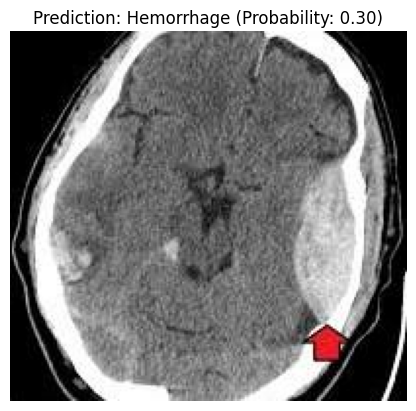

In [31]:
# Example image path (replace with actual image path)
image_path = "/kaggle/input/testing/download (1).jpeg"

# Load and preprocess the image
image = load_and_preprocess_image(image_path)

# Predict the label (normal or hemorrhage)
if image is not None:
    prediction = saved_model.predict(image)
    
    # Display the image
    img_display = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f"Prediction: {'Hemorrhage' if prediction > 0.1 else 'Normal'} (Probability: {prediction[0][0]:.2f})")
    plt.axis('off')  # Hide axes
    plt.show()

In [40]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 0.01% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 0.01% of the data
print("0.01% of the data selected.")

# Step 1.4: Prepare image paths and labels
image_labels = train_df.groupby('Base_ID')['Label'].max().reset_index()

# Separate normal and hemorrhage images
normal_images = image_labels[image_labels['Label'] == 0]['Base_ID'].tolist()
hemorrhage_images = image_labels[image_labels['Label'] == 1]['Base_ID'].tolist()

# Prepare image paths and labels
normal_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in normal_images]
hemorrhage_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in hemorrhage_images]

# Combine paths and labels
image_paths = normal_paths + hemorrhage_paths
labels = [0] * len(normal_paths) + [1] * len(hemorrhage_paths)

# Print the counts of normal and hemorrhage images
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of hemorrhage images: {len(hemorrhage_images)}")

# Step 2: Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):  # If the image is not found, return None
        return None  # Return None if the image is not found

    # Read and process the image (assuming DICOM format)
    dcm = pydicom.dcmread(image_path)
    img = dcm.pixel_array  # Extract pixel data
    
    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Return the image as a numpy array
    return img_to_array(img)

# Step 3: Split into Training, Validation, and Test Sets (80:10:10)
print("Splitting data into training, validation, and test sets (80:10:10)...")
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Prepare data (train, validation, test)
print("Loading and preprocessing images for training, validation, and testing...")
X_train = np.array([load_and_preprocess_image(image_path) for image_path in X_train])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in X_val])
X_test = np.array([load_and_preprocess_image(image_path) for image_path in X_test])

# Check how many images were loaded for each dataset
print(f"Number of training images: {len(X_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of test images: {len(X_test)}")

# Reshape for grayscale images (128x128x1)
print("Reshaping data for CNN input...")
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data preparation completed.")

# Step 5: Build CNN Model
print("Building CNN model...")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output node for binary classification
])

# Step 6: Compile the model
print("Compiling the model...")
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Step 7: Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Step 8: Train the model with class weights
print("Training the model...")

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('/kaggle/model/best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
    batch_size=32,
    callbacks=[checkpoint],
    class_weight=class_weight_dict  # Pass class weights here
)

print("Model training completed.")

# Step 9: Evaluate the model
print("Evaluating the model on the test set...")
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Step 10: Load the saved model
print("Loading the saved model...")
saved_model = load_model('/kaggle/model/best_model.keras')
print("Model Loaded successfully")

# Step 11: Predict on a new image (works for any image format)
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Warning: Image {image_path} not found.")
        return None

    # Load the image (works for JPG, PNG, BMP, etc.)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return None

    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Reshape for grayscale images (128x128x1)
    img = img.reshape(1, 128, 128, 1)
    
    return img

# Example image path (replace with actual image path)
image_path = "/kaggle/input/testing/download (1).jpeg"

# Load and preprocess the image
image = load_and_preprocess_image(image_path)

# Predict the label (normal or hemorrhage)
if image is not None:
    prediction = saved_model.predict(image)
    print(f"Raw prediction: {prediction[0][0]}")  # Display the raw probability
    
    # Define threshold for prediction
    threshold = 0.5  # Set threshold at 0.5 for balanced decision-making

    # Classify based on the threshold
    if prediction > threshold:
        label = "Hemorrhage"
    else:
        label = "Normal"
    
    # Display the image
    img_display = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f"Prediction: {label} (Probability: {prediction[0][0]:.2f})")
    plt.axis('off')  # Hide axes
    plt.show()


CSV file loaded successfully.
Base IDs extracted from CSV.
0.01% of the data selected.
Number of normal images: 433
Number of hemorrhage images: 19
Splitting data into training, validation, and test sets (80:10:10)...
Loading and preprocessing images for training, validation, and testing...
Number of training images: 361
Number of validation images: 45
Number of test images: 46
Reshaping data for CNN input...
Data preparation completed.
Building CNN model...
Compiling the model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Training the model...
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8320 - loss: 4.6814
Epoch 1: val_loss improved from inf to 1.32492, saving model to /kaggle/model/best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 554ms/step - accuracy: 0.8268 - loss: 4.6606 - val_accuracy: 0.2000 - val_loss: 1.3249
Model training completed.
Evaluating the model on the test set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1327 - loss: 1.3546
Test Loss: 1.3466365337371826
Test Accuracy: 0.15217390656471252
Loading the saved model...
Model Loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Raw prediction: 0.5396014451980591


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions with threshold of 0.1
threshold = 0.3
predicted_classes = (model.predict(X_test) > threshold).astype("int32")

# Evaluate precision, recall, and F1 score
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Precision: 0.09
Recall: 1.00
F1-Score: 0.16


In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the prediction probabilities (not hard labels)
y_probs = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [4]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 0.01% of the dataset
train_df = train_df.sample(frac=0.0001, random_state=42)  # Select 0.01% of the data
print("0.01% of the data selected.")

# Step 1.4: Prepare image paths and labels
image_labels = train_df.groupby('Base_ID')['Label'].max().reset_index()

# Separate normal and hemorrhage images
normal_images = image_labels[image_labels['Label'] == 0]['Base_ID'].tolist()
hemorrhage_images = image_labels[image_labels['Label'] == 1]['Base_ID'].tolist()

# Prepare image paths and labels
normal_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in normal_images]
hemorrhage_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in hemorrhage_images]

# Combine paths and labels
image_paths = normal_paths + hemorrhage_paths
labels = [0] * len(normal_paths) + [1] * len(hemorrhage_paths)

# Print the counts of normal and hemorrhage images
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of hemorrhage images: {len(hemorrhage_images)}")

# Step 1.5: Train-Test Split
print("Splitting data into training, validation, and test sets (80:10:10)...")
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 1.6: Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):  # If the image is not found, return None
        return None  # Return None if the image is not found

    # Read and process the image (assuming DICOM format)
    dcm = pydicom.dcmread(image_path)
    img = dcm.pixel_array  # Extract pixel data
    
    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Return the image as a numpy array
    return img_to_array(img)

# Step 1.7: Prepare the data (train, validation, test)
print("Loading and preprocessing images for training, validation, and testing...")
X_train = np.array([load_and_preprocess_image(image_path) for image_path in X_train])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in X_val])
X_test = np.array([load_and_preprocess_image(image_path) for image_path in X_test])

# Check how many images were loaded for each dataset
print(f"Number of training images: {len(X_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of test images: {len(X_test)}")

# Reshape for grayscale images (128x128x1)
print("Reshaping data for CNN input...")
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data preparation completed.")


CSV file loaded successfully.
Base IDs extracted from CSV.
0.01% of the data selected.
Number of normal images: 433
Number of hemorrhage images: 19
Splitting data into training, validation, and test sets (80:10:10)...
Loading and preprocessing images for training, validation, and testing...
Number of training images: 361
Number of validation images: 45
Number of test images: 46
Reshaping data for CNN input...
Data preparation completed.


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

# Step 2.1: Build Improved CNN Model
print("Building improved CNN model...")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),  # BatchNormalization after the Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),  # Adding more complexity
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),  # Increase the size of Dense layer
    Dropout(0.5),  # Dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output node for binary classification
])

# Step 2.2: Compile the model with a lower learning rate for finer tuning
print("Compiling the model...")
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Step 2.3: Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Step 2.4: Train the model with class weights and early stopping
print("Training the model...")

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('/kaggle/model/best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Early stopping to prevent overfitting if the model doesn't improve
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,  # More epochs to allow the model to train
    batch_size=32,
    callbacks=[checkpoint, early_stopping],
    class_weight=class_weight_dict  # Pass class weights here
)

print("Model training completed.")


Building improved CNN model...
Compiling the model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,782,337 (10.61 MB)

 Trainable params: 2,781,377 (10.61 MB)

 Non-trainable params: 960 (3.75 KB)

Training the model...
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7695 - loss: 1.8591
Epoch 1: val_loss improved from inf to 0.52744, saving model to /kaggle/model/best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7721 - loss: 1.8997 - val_accuracy: 0.9333 - val_loss: 0.5274
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6742 - loss: 0.8182
Epoch 2: val_loss did not improve from 0.52744
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6731 - loss: 0.8311 - val_accuracy: 0.9333 - val_loss: 0.5724
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6935 - loss: 1.4706
Epoch 3: val_loss did not improve from 0.52744
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6928 - loss: 1.4483 - val_accuracy: 0.9111 - val_loss: 0.5670
Restoring model weights from the end of the best epoch: 1.
Model training completed.


In [9]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Step 3.1: Load the saved model
print("Loading the saved model...")
saved_model = load_model('/kaggle/model/best_model.keras')
print("Model Loaded successfully")

# Step 3.2: Predict on a new image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Warning: Image {image_path} not found.")
        return None

    # Load the image (works for JPG, PNG, BMP, etc.)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return None

    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Reshape for grayscale images (128x128x1)
    img = img.reshape(1, 128, 128, 1)
    
    return img

# Example image path (replace with actual image path)
image_path = "/kaggle/input/testing/download (1).jpeg"

# Load and preprocess the image
image = load_and_preprocess_image(image_path)

# Predict the label (normal or hemorrhage)
if image is not None:
    prediction = saved_model.predict(image)
    print(f"Raw prediction: {prediction[0][0]}")  # Display the raw probability
    
    # Define threshold for prediction
    threshold = 0.5  # Set threshold at 0.5 for balanced decision-making

    # Classify based on the threshold
    if prediction > threshold:
        label = "Hemorrhage"
    else:
        label = "Normal"
    
    # Display the image
    img_display = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f"Prediction: {label} (Probability: {prediction[0][0]:.2f})")
    plt.axis('off')  # Hide axes
    plt.show()


Loading the saved model...
Model Loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Raw prediction: 0.4833812117576599


In [10]:
# Get raw predictions (probabilities) from the model
raw_predictions = model.predict(X_test)

# Print some raw predictions to check if they are meaningful
print(f"Raw predictions (first 10): {raw_predictions[:10]}")

# Check if there is any problem with the model outputs
if np.all(raw_predictions == 0):
    print("Warning: Model is predicting all zeros. Check the model training or data.")
else:
    print("Model predictions seem valid.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Raw predictions (first 10): [[0.3245445 ]
 [0.39491948]
 [0.39966446]
 [0.36969262]
 [0.40473518]
 [0.40346587]
 [0.34783638]
 [0.34933117]
 [0.36343214]
 [0.37164402]]
Model predictions seem valid.


In [11]:
# Get raw predictions (probabilities) from the model
raw_predictions = model.predict(X_test)

# Get the max and min values of the raw predictions
max_prediction = np.max(raw_predictions)
min_prediction = np.min(raw_predictions)

# Print the results
print(f"Max prediction: {max_prediction}")
print(f"Min prediction: {min_prediction}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Max prediction: 0.48033595085144043
Min prediction: 0.2336527705192566


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Define a range of thresholds to try
thresholds = np.arange(0.001, 1.01, 0.01)

# Initialize variables to store the best results
best_threshold = None
best_precision = 0
best_recall = 0
best_f1 = 0

# Initialize a list to store the results for each threshold
threshold_results = []

# Loop through each threshold value
for threshold in thresholds:
    # Make predictions based on the current threshold
    y_pred = (raw_predictions > threshold).astype(int)
    
    # Calculate Precision, Recall, and F1-Score for the current threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results for this threshold
    threshold_results.append((threshold, precision, recall, f1))
    
    # Update the best results if necessary
    if f1 > best_f1:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_threshold = threshold

# Print the best threshold and metrics
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Precision: {best_precision:.2f}")
print(f"Best Recall: {best_recall:.2f}")
print(f"Best F1-Score: {best_f1:.2f}")

# Optionally, print the results for each threshold
print("\nThreshold Results (Threshold, Precision, Recall, F1-Score):")
for result in threshold_results:
    print(f"Threshold: {result[0]:.2f} | Precision: {result[1]:.2f}, Recall: {result[2]:.2f}, F1-Score: {result[3]:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Best Threshold: 0.44
Best Precision: 0.20
Best Recall: 0.25
Best F1-Score: 0.22

Threshold Results (Threshold, Precision, Recall, F1-Score):
Threshold: 0.00 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.01 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.02 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.03 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.04 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.05 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.06 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.07 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.08 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.09 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.10 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.11 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.12 | Precision: 0.09, Recall: 1.00, F1-Score: 0.16
Threshold: 0.13 | Precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, raw_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, raw_predictions)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, raw_predictions)

# Compute Precision-Recall AUC
pr_auc = auc(recall, precision)

# Compute F1-Score for different thresholds
f1_scores = []
for threshold in np.arange(0.01, 1.0, 0.01):
    y_pred = (raw_predictions > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Create subplots for all four graphs
plt.figure(figsize=(16, 12))

# First subplot: ROC curve
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Second subplot: Precision-Recall curve
plt.subplot(2, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")

# Third subplot: Precision-Recall AUC curve
plt.subplot(2, 2, 3)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall AUC Curve')
plt.legend(loc="best")

# Fourth subplot: F1-Score vs Threshold curve
plt.subplot(2, 2, 4)
plt.plot(np.arange(0.01, 1.0, 0.01), f1_scores, color='purple', lw=2, label='F1-Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend(loc="best")

# Adjust layout
plt.tight_layout()

# Save the plot as an image to your download directory
plt.savefig('/kaggle/working/your_plot_image.png')

# Show the plot (optional)
plt.show()

In [2]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Step 1.1: Load the CSV file
csv_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv'
train_df = pd.read_csv(csv_path)
print("CSV file loaded successfully.")

# Step 1.2: Extract base IDs (for matching with image filenames)
train_df['Base_ID'] = train_df['ID'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])  # Extract base ID
print("Base IDs extracted from CSV.")

# Step 1.3: Sample 1% of the dataset (instead of 0.01%)
train_df = train_df.sample(frac=0.001, random_state=42)  # Use 1% of the data
print("1% of the data selected.")

# Step 1.4: Prepare image paths and labels
image_labels = train_df.groupby('Base_ID')['Label'].max().reset_index()

# Separate normal and hemorrhage images
normal_images = image_labels[image_labels['Label'] == 0]['Base_ID'].tolist()
hemorrhage_images = image_labels[image_labels['Label'] == 1]['Base_ID'].tolist()

# Prepare image paths and labels
normal_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in normal_images]
hemorrhage_paths = [f"/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/{img_id}.dcm" for img_id in hemorrhage_images]

# Combine paths and labels
image_paths = normal_paths + hemorrhage_paths
labels = [0] * len(normal_paths) + [1] * len(hemorrhage_paths)

# Step 1.5: Train-Test Split
print("Splitting data into training, validation, and test sets (80:10:10)...")
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 1.6: Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):  # If the image is not found, return None
        return None  # Return None if the image is not found

    # Read and process the image (assuming DICOM format)
    dcm = pydicom.dcmread(image_path)
    img = dcm.pixel_array  # Extract pixel data
    
    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Return the image as a numpy array
    return img_to_array(img)

# Step 1.7: Prepare the data (train, validation, test)
print("Loading and preprocessing images for training, validation, and testing...")
X_train = np.array([load_and_preprocess_image(image_path) for image_path in X_train])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in X_val])
X_test = np.array([load_and_preprocess_image(image_path) for image_path in X_test])

# Check how many images were loaded for each dataset
print(f"Number of training images: {len(X_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of test images: {len(X_test)}")

# Reshape for grayscale images (128x128x1)
print("Reshaping data for CNN input...")
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data preparation completed.")

# Step 2.1: Build Improved CNN Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

print("Building improved CNN model...")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 2.2: Compile the model with a lower learning rate for finer tuning
print("Compiling the model...")
optimizer = Adam(learning_rate=0.0005)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Step 2.3: Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Step 2.4: Train the model with class weights and early stopping
print("Training the model...")

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('/kaggle/model/best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Early stopping to prevent overfitting if the model doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Use the generator to train the model
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increased number of epochs
    callbacks=[checkpoint, early_stopping],
    class_weight=class_weight_dict
)

print("Model training completed.")

# Step 3.1: Load the saved model
print("Loading the saved model...")
from tensorflow.keras.models import load_model
saved_model = load_model('/kaggle/model/best_model.keras')
print("Model Loaded successfully")

# Step 3.2: Predict on a new image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Warning: Image {image_path} not found.")
        return None

    # Load the image (works for JPG, PNG, BMP, etc.)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return None

    # Resize image to the target size
    img = cv2.resize(img, target_size)

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    
    # Reshape for grayscale images (128x128x1)
    img = img.reshape(1, 128, 128, 1)
    
    return img

# Example image path (replace with actual image path)
image_path = "/kaggle/input/testing/download (1).jpeg"

# Load and preprocess the image
image = load_and_preprocess_image(image_path)

# Predict the label (normal or hemorrhage)
if image is not None:
    prediction = saved_model.predict(image)
    print(f"Raw prediction: {prediction[0][0]}")  # Display the raw probability
    
    # Define threshold for prediction
    threshold = 0.5  # You can experiment with a lower or higher threshold

    # Classify based on the threshold
    if prediction > threshold:
        label = "Hemorrhage"
    else:
        label = "Normal"
    
    # Display the image
    img_display = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f"Prediction: {label} (Probability: {prediction[0][0]:.2f})")
    plt.axis('off')  # Hide axes
    plt.show()

# Get raw predictions (probabilities) from the model
raw_predictions = model.predict(X_test)

# Print some raw predictions to check if they are meaningful
print(f"Raw predictions (first 10): {raw_predictions[:10]}")


CSV file loaded successfully.
Base IDs extracted from CSV.
1% of the data selected.
Splitting data into training, validation, and test sets (80:10:10)...
Loading and preprocessing images for training, validation, and testing...
Number of training images: 3604
Number of validation images: 451
Number of test images: 451
Reshaping data for CNN input...
Data preparation completed.
Building improved CNN model...
Compiling the model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 2,752,641 (10.50 MB)

 Trainable params: 2,750,657 (10.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

Training the model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.6310 - loss: 1.8007
Epoch 1: val_loss improved from inf to 0.39757, saving model to /kaggle/model/best_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 112s 942ms/step - accuracy: 0.6309 - loss: 1.7992 - val_accuracy: 0.9446 - val_loss: 0.3976
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.5535 - loss: 1.2976
Epoch 2: val_loss improved from 0.39757 to 0.27304, saving model to /kaggle/model/best_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 106s 933ms/step - accuracy: 0.5539 - loss: 1.2967 - val_accuracy: 0.9446 - val_loss: 0.2730
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.5733 - loss: 0.9898
Epoch 3: val_loss did not improve from 0.27304
113/113 ━━━━━━━━━━━━━━━━━━━━ 108s 948ms/step - accuracy: 0.5733 - loss: 0.9898 - val_accuracy: 0.0554 - val_loss: 0.8847
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.6453 - loss: 0.8023
Epoch 4: val_loss did not improve from 0.27304
113/113 

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
Raw predictions (first 10): [[0.04826547]
 [0.00267088]
 [0.00864539]
 [0.00763207]
 [0.06495058]
 [0.0001005 ]
 [0.00168985]
 [0.00588363]
 [0.00013063]
 [0.00010241]]


In [11]:
class_weights = {0: 1, 1: 10}  # Increase the weight of class "1" (hemorrhage)
model.fit(X_train, y_train, class_weight=class_weights, epochs=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 105s 932ms/step - accuracy: 0.6937 - loss: 1.3138


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on the training data
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Fit the model with class weights
model.fit(X_train, y_train, class_weight={0: class_weights[0], 1: class_weights[1]}, epochs=1)

 77/113 ━━━━━━━━━━━━━━━━━━━━ 32s 904ms/step - accuracy: 0.6088 - loss: 0.7823

In [6]:
# Get the true labels (y_test) and predicted labels (y_pred)
y_true = y_test  # True labels
y_pred = model.predict(X_test)  # Predicted labels (probabilities)

# If the model outputs probabilities, convert to binary labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)  # Assuming a binary classification model with sigmoid output


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

# Optional: To get a full classification report (including support, accuracy, etc.)
print(classification_report(y_true, y_pred))


Precision:  0.0
Recall:  0.0
F1-Score:  0.0
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       423
           1       0.00      0.00      0.00        28

    accuracy                           0.91       451
   macro avg       0.47      0.48      0.48       451
weighted avg       0.88      0.91      0.89       451



**new**

In [21]:
import pandas as pd
import skimage
from skimage.io import imshow, imread, imsave
import numpy as np
from glob import glob
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras as K
import pandas as pd
import numpy as np
import pydicom
from PIL import Image

In [22]:
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')
train_path ='/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'
CT_image_file_names = os.listdir(train_path)
df=df[df['Label']==1]

In [23]:
# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop unnecessary columns
df = df.drop(columns=['ID'])

# Rearrange columns
df = df[['File', 'Subcategory', 'Label']]

# Rename columns
df.columns = ['File Name', 'Subcategory', 'Label']

# Display the DataFrame
#print(df)

In [25]:
# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Display the DataFrame
#print(df)

In [26]:
# Define the subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop the 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Display the DataFrame
#print(df_aggregated)

In [14]:
#df_aggregated.head()

In [27]:
# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()
ICH_dicom_image_paths = pd.DataFrame({'File Name':[n for n in file_names_list],
                       'image_path':[train_path+n+'.dcm' for n in file_names_list]})

In [13]:
#ICH_dicom_image_paths

In [28]:
merged_df = pd.merge(left=ICH_dicom_image_paths,right=df_aggregated, on='File Name',how='inner')
#merged_df.head()

In [29]:
merged_df.to_csv('/kaggle/working/out.csv', index=False) 
ICH_300_images_df = merged_df[0:300]
ICH_300_images_df.shape

(300, 8)

**Reality**

In [3]:
import pandas as pd
import os
import pydicom

# Load the dataset
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

# Define the train directory path
train_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List all DICOM file names from the directory
CT_image_file_names = os.listdir(train_path)

# Filter the dataset for hemorrhage cases (Label == 1)
df = df[df['Label'] == 1]

# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function to split the ID and create new columns
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Rearrange the columns and rename them for clarity
df = df[['File', 'Subcategory', 'Label']]
df.columns = ['File Name', 'Subcategory', 'Label']

# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Define subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Check if all expected subcategory columns exist
#print("Columns in df_aggregated before merge:", df_aggregated.columns)

# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()

# Create a DataFrame for DICOM image paths
ICH_dicom_image_paths = pd.DataFrame({
    'File Name': [n for n in file_names_list],
    'image_path': [train_path + n + '.dcm' for n in file_names_list]
})

# Merge the image paths with the aggregated data
merged_df = pd.merge(left=ICH_dicom_image_paths, right=df_aggregated, on='File Name', how='inner')
# Check the columns after merge
#print("Columns in merged_df after merge:", merged_df.columns)

# Save the merged DataFrame to a CSV file
merged_df.to_csv('/kaggle/working/out.csv', index=False)

**again try**

In [1]:
import pandas as pd
import skimage
from skimage.io import imshow, imread, imsave
import numpy as np
from glob import glob
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras as K
import pandas as pd
import numpy as np
import pydicom
from PIL import Image

# Load the dataset
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

# Define the train directory path
train_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List all DICOM file names from the directory
CT_image_file_names = os.listdir(train_path)

# Filter the dataset for hemorrhage cases (Label == 1)
df = df[df['Label'] == 1]

# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function to split the ID and create new columns
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Rearrange the columns and rename them for clarity
df = df[['File', 'Subcategory', 'Label']]
df.columns = ['File Name', 'Subcategory', 'Label']

# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Define subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()

# Create a DataFrame for DICOM image paths
ICH_dicom_image_paths = pd.DataFrame({
    'File Name': [n for n in file_names_list],
    'image_path': [train_path + n + '.dcm' for n in file_names_list]
})

# Merge the image paths with the aggregated data
merged_df = pd.merge(left=ICH_dicom_image_paths, right=df_aggregated, on='File Name', how='inner')

# Save the merged DataFrame to a CSV file
merged_df.to_csv('/kaggle/working/out.csv', index=False)

# Take only the first 300 images
ICH_300_images_df = merged_df[0:300]

# Display the shape of the DataFrame with 300 images
print(ICH_300_images_df.shape)

(300, 8)


In [2]:
# Take only the first 300 images
ICH_300_images_df = merged_df[0:300]

# Display the shape of the DataFrame with 300 images
print("Shape of ICH_300_images_df:", ICH_300_images_df.shape)

Shape of ICH_300_images_df: (300, 8)


In [37]:
import pydicom
import cv2
import numpy as np

def preprocess_image(dicom_path, target_size=(256, 256)):
    """
    Preprocess a single DICOM image:
    - Load the image from the DICOM path
    - Resize it to the target size
    - Normalize pixel values to [0, 1]
    
    Parameters:
    - dicom_path: Path to the DICOM file
    - target_size: The target image size (default: 256x256)
    
    Returns:
    - Preprocessed image (resized and normalized)
    """
    try:
        dicom = pydicom.dcmread(dicom_path)  # Read the DICOM file
        image = dicom.pixel_array  # Get the pixel array from the DICOM file
        
        # Resize image
        image = cv2.resize(image, target_size)  # Resize to target dimensions
        
        # Normalize the pixel values to [0, 1]
        image = image / np.max(image)  # Divide by max to normalize to [0, 1]
        
        # Ensure 3D shape (height, width, 1) for grayscale images
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)  # Add channel dimension (height, width, 1)
        
        return image
    
    except Exception as e:
        print(f"Error processing image {dicom_path}: {e}")
        return np.zeros(target_size + (1,))  # Return a blank image in case of error

def preprocess_data(image_paths, target_size=(256, 256)):
    """
    Preprocess a list of DICOM images.
    
    Parameters:
    - image_paths: List of paths to the DICOM images
    - target_size: The target image size (default: 256x256)
    
    Returns:
    - Preprocessed image array with shape (num_images, target_size[0], target_size[1], 1)
    """
    preprocessed_images = []
    
    for dicom_path in image_paths:
        preprocessed_image = preprocess_image(dicom_path, target_size)
        preprocessed_images.append(preprocessed_image)
    
    # Convert the list of images into a numpy array
    preprocessed_images = np.array(preprocessed_images)
    
    return preprocessed_images

# Example of usage:
# Get the list of image paths (assuming you already have a dataframe `ICH_300_images_df`)
image_paths = ICH_300_images_df['image_path'].tolist()

# Preprocess all images
preprocessed_images = preprocess_data(image_paths, target_size=(256, 256))

print(f"Shape of preprocessed images: {preprocessed_images.shape}")


Shape of preprocessed images: (300, 256, 256, 1)


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_data_80_10_10(ICH_300_images_df, subcategories, random_state=42):
    """
    Function to split the data into 80% training, 10% validation, and 10% testing.
    
    Parameters:
    - ICH_300_images_df: DataFrame with images and labels.
    - subcategories: List of subcategory labels to be used.
    - random_state: Random seed for reproducibility (default is 42).
    
    Returns:
    - train_images, val_images, test_images: Image datasets split.
    - train_labels, val_labels, test_labels: Corresponding labels.
    """
    
    # Ensure labels are in the right format
    labels = ICH_300_images_df[subcategories].values  # Subcategory labels

    # Split into training (80%) and temp (20%) sets
    train_images, temp_images, train_labels, temp_labels = train_test_split(
        ICH_300_images_df['processed_image'].values,  # Images
        labels,  # Labels
        test_size=0.2,  # 20% for temp (validation + test)
        random_state=random_state  # For reproducibility
    )

    # Now split the temp data into validation (50% of temp = 10% of total) and test (50% of temp = 10% of total)
    val_images, test_images, val_labels, test_labels = train_test_split(
        temp_images,  # Temp images
        temp_labels,  # Temp labels
        test_size=0.5,  # 50% of the temp data for testing (making it 10% of total)
        random_state=random_state  # For reproducibility
    )

    # Convert to numpy arrays
    train_images = np.array([img for img in train_images])
    val_images = np.array([img for img in val_images])
    test_images = np.array([img for img in test_images])

    # Return the images and labels for each split
    return train_images, val_images, test_images, train_labels, val_labels, test_labels

# Example usage
train_images, val_images, test_images, train_labels, val_labels, test_labels = split_data_80_10_10(ICH_300_images_df, subcategories)

# Print the size of each split
print(f"Training set size: {train_images.shape[0]} images")
print(f"Validation set size: {val_images.shape[0]} images")
print(f"Test set size: {test_images.shape[0]} images")


Training set size: 240 images
Validation set size: 30 images
Test set size: 30 images


In [44]:
print(f"Shape of train images: {train_images.shape}")
print(f"Shape of train labels: {train_labels.shape}")


Shape of train images: (720, 256, 256, 1)
Shape of train labels: (240, 6)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def build_custom_model(input_shape=(256, 256, 1), num_classes=6):
    model = Sequential([
        Input(shape=input_shape),  # Explicitly define the input shape here
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(num_classes, activation='sigmoid')  # Sigmoid for multi-label classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define the input shape and number of classes
input_shape = (256, 256, 1)
num_classes = len(subcategories)

# Create the model
model = build_custom_model(input_shape=input_shape, num_classes=num_classes)

# Display the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,174 (56.61 MB)

 Trainable params: 14,839,174 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Make sure the model is compiled only once
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0397 - loss: 1.9622 - val_accuracy: 0.0000e+00 - val_loss: 0.4749
Epoch 2/10
3/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0000e+00 - loss: 0.5003

KeyboardInterrupt: 

In [11]:
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

# Loop through the first 5 images
for i in range(1):
    # Load the DICOM image from the image_path
    image_path = ICH_300_images_df['image_path'].iloc[i]  # Get the image path
    dicom = pydicom.dcmread(image_path)

    # Get the pixel array from the DICOM file
    image_array = dicom.pixel_array

    # Get the specific image information (File Name, Subcategory, etc.)
    file_name = ICH_300_images_df['File Name'].iloc[i]
    subcategories_info = ICH_300_images_df.iloc[i, 1:-1]  # Exclude 'File Name' and 'image_path' columns

    # Ensure subcategories_info contains only numeric values
    subcategories_info = subcategories_info.apply(pd.to_numeric, errors='coerce')

    # Prepare the information as a string to display
    info_str = f"File Name: {file_name}\n"

    # Only include valid subcategories (exclude NaN values)
    for subcategory in subcategories_info.index:
        value = subcategories_info[subcategory]
        if not pd.isna(value):
            info_str += f"{subcategory}: {int(value)}\n"

    # Display the image and its information with axis ticks
    plt.imshow(image_array, cmap='gray')  # Use 'gray' colormap for medical images
    plt.title(info_str)  # Display the formatted info
    plt.axis('on')  # Show the axis

    # Set X and Y axis ticks (this can be adjusted depending on your image size)
    plt.xticks(range(0, image_array.shape[1], int(image_array.shape[1] / 5)))  # Set 5 ticks on X-axis
    plt.yticks(range(0, image_array.shape[0], int(image_array.shape[0] / 5)))  # Set 5 ticks on Y-axis

    plt.show()


In [74]:
# Function to load and preprocess DICOM images
def load_dicom_image(image_path):
    # Read the DICOM file
    dicom_image = pydicom.dcmread(image_path).pixel_array
    # Normalize the pixel values to the range [0, 1]
    dicom_image = dicom_image / np.max(dicom_image)
    # Resize the image (optional but recommended for consistency)
    dicom_image = cv2.resize(dicom_image, (128, 128))  # Adjust size as needed
    # Expand the dimensions to match the expected input shape of the model
    dicom_image = np.expand_dims(dicom_image, axis=-1)  # For grayscale
    return dicom_image

# Load the images and labels
images = []
labels = []
for _, row in ICH_300_images_df.iterrows():
    image_path = row['image_path']
    image = load_dicom_image(image_path)
    images.append(image)
    labels.append(row[subcategories].values)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Loaded Images Shape:", images.shape)
print("Labels Shape:", labels.shape)

Loaded Images Shape: (300, 128, 128, 1)
Labels Shape: (300, 6)


In [75]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% temporary (validation + test) split
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, split the temporary data into 50% validation and 50% test, for 10% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (240, 128, 128, 1)
Validation data shape: (30, 128, 128, 1)
Test data shape: (30, 128, 128, 1)


In [76]:
# Define the CNN model
model = K.Sequential([
    K.layers.InputLayer(input_shape=(128, 128, 1)),  # Input layer for grayscale images
    K.layers.Conv2D(32, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(len(subcategories), activation='sigmoid')  # Multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
import pandas as pd
import numpy as np
import os
import pydicom
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow import keras as K

# Load the dataset
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

# Define the train directory path
train_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List all DICOM file names from the directory
CT_image_file_names = os.listdir(train_path)

# Filter the dataset for hemorrhage cases (Label == 1)
df = df[df['Label'] == 1]

# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function to split the ID and create new columns
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Rearrange the columns and rename them for clarity
df = df[['File', 'Subcategory', 'Label']]
df.columns = ['File Name', 'Subcategory', 'Label']

# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Define subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()

# Create a DataFrame for DICOM image paths
ICH_dicom_image_paths = pd.DataFrame({
    'File Name': [n for n in file_names_list],
    'image_path': [train_path + n + '.dcm' for n in file_names_list]
})

# Merge the image paths with the aggregated data
merged_df = pd.merge(left=ICH_dicom_image_paths, right=df_aggregated, on='File Name', how='inner')

# Take only the first 300 images
ICH_300_images_df = merged_df[0:300]

# Load the DICOM image
def load_dicom_image(image_path):
    dicom_image = pydicom.dcmread(image_path)
    image = dicom_image.pixel_array
    # Resize image to 128x128
    image = cv2.resize(image, (128, 128))
    # Normalize the pixel values
    image = image.astype('float32') / np.max(image)
    return image

# Load the images and labels
images = []
labels = []
for _, row in ICH_300_images_df.iterrows():
    image_path = row['image_path']
    image = load_dicom_image(image_path)
    images.append(image)
    labels.append(row[subcategories].values)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure that the images are in float32 format
images = images.astype('float32')

# Split the dataset into 80% train, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, split the temporary data into 50% validation and 50% test, for 10% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Build the CNN model
model = K.Sequential([
    K.layers.InputLayer(input_shape=(128, 128, 1)),  # Input layer for grayscale images
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(256, activation='relu'),
    K.layers.Dense(len(subcategories), activation='sigmoid')  # Multi-label classification
])

# Compile the model
model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['AUC'])

# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.argmax(y_train, axis=1))
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_val, y_val), class_weight=class_weight_dict)

# Plot training history (accuracy and loss)
plt.plot(history.history['accuracy'], label='train AUC')
plt.plot(history.history['val_accuracy'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

X_train shape: (240, 128, 128)
y_train shape: (240, 6)
X_val shape: (30, 128, 128)
y_val shape: (30, 6)
X_test shape: (30, 128, 128)
y_test shape: (30, 6)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: classes should include all valid labels that can be in y

In [82]:
# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Now check the shapes and types
print("X_train dtype:", X_train.dtype, "X_train shape:", X_train.shape)
print("y_train dtype:", y_train.dtype, "y_train shape:", y_train.shape)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_val, y_val), class_weight=class_weights)

# Plot training history (accuracy and loss)
plt.plot(history.history['accuracy'], label='train AUC')
plt.plot(history.history['val_accuracy'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

X_train dtype: float32 X_train shape: (240, 128, 128)
y_train dtype: float32 y_train shape: (240, 6)
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - AUC: 0.7128 - loss: 2.2588 - val_AUC: 0.6669 - val_loss: 0.5080
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.7195 - loss: 1.9592 - val_AUC: 0.7451 - val_loss: 0.4832
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - AUC: 0.7902 - loss: 1.8074 - val_AUC: 0.7983 - val_loss: 0.4615
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.8191 - loss: 1.7538 - val_AUC: 0.7274 - val_loss: 0.4940
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - AUC: 0.7887 - loss: 1.7952 - val_AUC: 0.7824 - val_loss: 0.4762
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - AUC: 0.8347 - loss: 1.6573 - val_AUC: 0.7793 - val_loss: 0.4756
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.8024 - loss: 1.7345 - val_AUC: 0.7743 - val_loss: 0.4867
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - AUC: 0.8386 - loss: 1.6452 - val_AUC: 0.8017 - val_

KeyError: 'accuracy'

KeyError: 'auc'

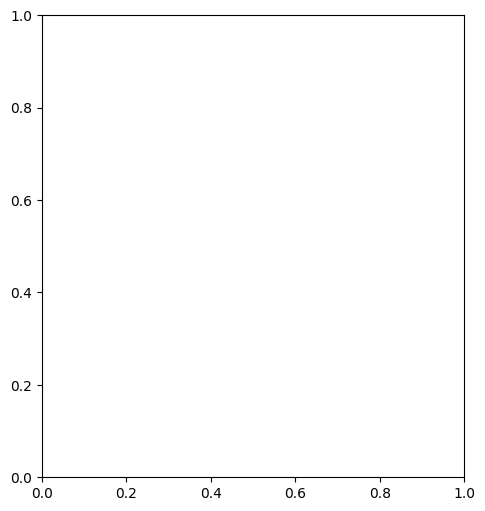

In [83]:
# Plot training history (AUC and loss)
plt.figure(figsize=(12, 6))

# Plot AUC
plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='train AUC')
plt.plot(history.history['val_auc'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC over Epochs')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.tight_layout()
plt.show()


In [84]:
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - AUC: 0.8207 - loss: 0.4365
Test Loss: 0.4365380108356476
Test AUC: 0.8206973671913147


In [2]:
import pandas as pd
import numpy as np
import os
import pydicom
import cv2  # Import OpenCV for resizing
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow import keras as K

# Load the dataset
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

# Define the train directory path
train_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List all DICOM file names from the directory
CT_image_file_names = os.listdir(train_path)

# Filter the dataset for hemorrhage cases (Label == 1)
df = df[df['Label'] == 1]

# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function to split the ID and create new columns
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Rearrange the columns and rename them for clarity
df = df[['File', 'Subcategory', 'Label']]
df.columns = ['File Name', 'Subcategory', 'Label']

# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Define subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()

# Create a DataFrame for DICOM image paths
ICH_dicom_image_paths = pd.DataFrame({
    'File Name': [n for n in file_names_list],
    'image_path': [train_path + n + '.dcm' for n in file_names_list]
})

# Merge the image paths with the aggregated data
merged_df = pd.merge(left=ICH_dicom_image_paths, right=df_aggregated, on='File Name', how='inner')

# Take only the first 300 images
ICH_300_images_df = merged_df[0:300]

# Load the DICOM image
def load_dicom_image(image_path):
    dicom_image = pydicom.dcmread(image_path)
    image = dicom_image.pixel_array
    # Resize image to 128x128
    image = cv2.resize(image, (128, 128))
    # Normalize the pixel values
    image = image.astype('float32') / np.max(image)
    return image

# Load the images and labels
images = []
labels = []
for _, row in ICH_300_images_df.iterrows():
    image_path = row['image_path']
    image = load_dicom_image(image_path)
    images.append(image)
    labels.append(row[subcategories].values)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure that the images are in float32 format
images = images.astype('float32')

# Split the dataset into 80% train, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, split the temporary data into 50% validation and 50% test, for 10% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 128, 128)
y_train shape: (240, 6)
X_val shape: (30, 128, 128)
y_val shape: (30, 6)
X_test shape: (30, 128, 128)
y_test shape: (30, 6)


X_train dtype: float32 X_train shape: (240, 128, 128)
y_train dtype: float32 y_train shape: (240, 6)
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - AUC: 0.6824 - loss: 3.6627 - val_AUC: 0.7776 - val_loss: 0.4484
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - AUC: 0.7974 - loss: 2.9853 - val_AUC: 0.7897 - val_loss: 0.4554
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - AUC: 0.8210 - loss: 2.7858 - val_AUC: 0.8129 - val_loss: 0.4436


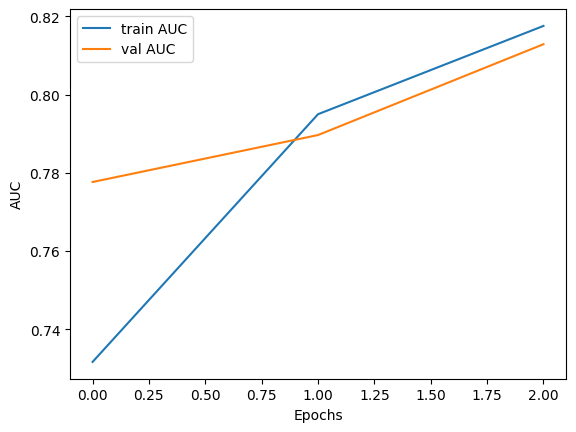

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - AUC: 0.8091 - loss: 0.4344
Test Loss: 0.4344443082809448
Test AUC: 0.8091402053833008


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Now check the shapes and types
print("X_train dtype:", X_train.dtype, "X_train shape:", X_train.shape)
print("y_train dtype:", y_train.dtype, "y_train shape:", y_train.shape)

# Compute class weights for each subcategory
class_weights = {}
for i in range(y_train.shape[1]):  # Iterate over each subcategory
    # Compute class weights only for the 0 and 1 labels in the current subcategory
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) > 1:  # Only compute class weights if both classes (0 and 1) are present
        class_weights[i] = compute_class_weight(
            class_weight='balanced',
            classes=[0, 1],
            y=y_train[:, i]
        )
    else:  # If only one class is present, assign weight 1 to the single class
        class_weights[i] = np.array([1.0, 1.0])  # Assign equal weight for class 0 and 1

# Now, let's compute the sample weights for each image
sample_weights = []
for i in range(len(y_train)):
    sample_weight = 0
    for j in range(y_train.shape[1]):  # Iterate over each subcategory
        label = int(y_train[i, j])
        if len(class_weights[j]) > 1:
            sample_weight += class_weights[j][label]  # Access the class weight directly from the array
        else:
            sample_weight += 1.0  # If only one class is present, weight is 1.0
    sample_weights.append(sample_weight)

sample_weights = np.array(sample_weights)

# Build the CNN model
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),  # Use 'shape' instead of 'input_shape' for the input layer
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(256, activation='relu'),
    K.layers.Dense(y_train.shape[1], activation='sigmoid')  # Multi-label classification
])

# Compile the model
model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['AUC'])

# Train the model with the computed sample weights
history = model.fit(X_train, y_train, epochs=3, batch_size=32, 
                    validation_data=(X_val, y_val), sample_weight=sample_weights)

# Plot training history (accuracy and loss)
plt.plot(history.history['AUC'], label='train AUC')  # Change 'auc' to 'AUC'
plt.plot(history.history['val_AUC'], label='val AUC')  # Change 'auc' to 'val_AUC'
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')


X_train dtype: float32 X_train shape: (240, 128, 128, 1)
y_train dtype: float32 y_train shape: (240, 6)
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - AUC: 0.5725 - loss: 4.2537 - val_AUC: 0.7676 - val_loss: 0.6767
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7677 - loss: 4.0497 - val_AUC: 0.7858 - val_loss: 0.6580
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.8070 - loss: 3.8513 - val_AUC: 0.7904 - val_loss: 0.6368


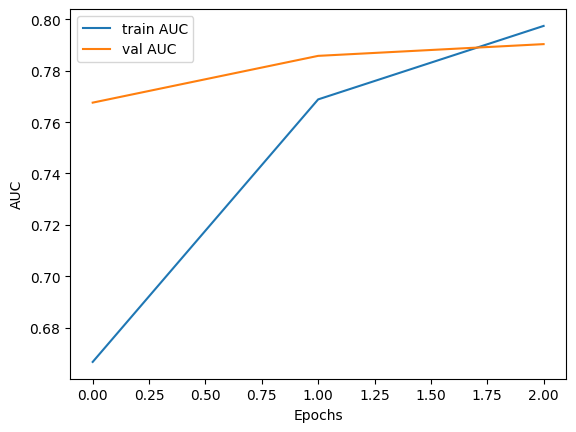

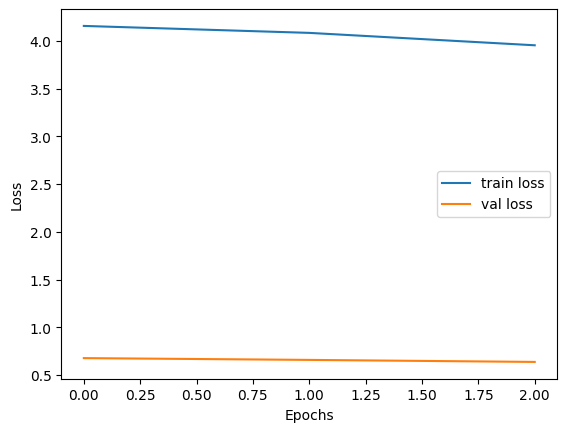

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - AUC: 0.8609 - loss: 0.6306
Test Loss: 0.6306086778640747
Test AUC: 0.8609166145324707


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Now check the shapes and types
print("X_train dtype:", X_train.dtype, "X_train shape:", X_train.shape)
print("y_train dtype:", y_train.dtype, "y_train shape:", y_train.shape)

# Compute class weights for each subcategory
class_weights = {}
for i in range(y_train.shape[1]):  # Iterate over each subcategory
    # Compute class weights only for the 0 and 1 labels in the current subcategory
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) > 1:  # Only compute class weights if both classes (0 and 1) are present
        class_weights[i] = compute_class_weight(
            class_weight='balanced',
            classes=[0, 1],
            y=y_train[:, i]
        )
    else:  # If only one class is present, assign weight 1 to the single class
        class_weights[i] = np.array([1.0, 1.0])  # Assign equal weight for class 0 and 1

# Now, let's compute the sample weights for each image
sample_weights = []
for i in range(len(y_train)):
    sample_weight = 0
    for j in range(y_train.shape[1]):  # Iterate over each subcategory
        label = int(y_train[i, j])
        if len(class_weights[j]) > 1:
            sample_weight += class_weights[j][label]  # Access the class weight directly from the array
        else:
            sample_weight += 1.0  # If only one class is present, weight is 1.0
    sample_weights.append(sample_weight)

sample_weights = np.array(sample_weights)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define a custom generator to yield images and sample weights
def custom_generator(datagen, X, y, sample_weights, batch_size):
    # This generator will yield both the data and the corresponding sample weights
    while True:
        for i in range(0, len(X), batch_size):
            batch_x = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            batch_weights = sample_weights[i:i+batch_size]
            augmented_x = next(datagen.flow(batch_x, batch_size=batch_size, shuffle=False))  # Use only images
            yield augmented_x, batch_y, batch_weights

# Build the CNN model with Dropout and additional layers
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),  # Use 'shape' instead of 'input_shape' for the input layer
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(512, (3, 3), activation='relu'),  # Added additional convolutional layer
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(512, activation='relu'),  # Increased number of neurons in the Dense layer
    K.layers.Dropout(0.5),  # Dropout layer added to reduce overfitting
    K.layers.Dense(y_train.shape[1], activation='sigmoid')  # Multi-label classification
])

# Compile the model with a smaller learning rate
model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['AUC'])

# Train the model using the custom generator
history = model.fit(
    custom_generator(datagen, X_train, y_train, sample_weights, batch_size=32), 
    steps_per_epoch=len(X_train) // 32,
    epochs=3,
    validation_data=(X_val, y_val)
)

# Plot training history (AUC and loss)
plt.plot(history.history['AUC'], label='train AUC')  # Change 'auc' to 'AUC'
plt.plot(history.history['val_AUC'], label='val AUC')  # Change 'val_auc' to 'val_AUC'
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Now check the shapes and types
print("X_train dtype:", X_train.dtype, "X_train shape:", X_train.shape)
print("y_train dtype:", y_train.dtype, "y_train shape:", y_train.shape)

# Compute class weights for each subcategory
class_weights = {}
for i in range(y_train.shape[1]):  # Iterate over each subcategory
    # Compute class weights only for the 0 and 1 labels in the current subcategory
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) > 1:  # Only compute class weights if both classes (0 and 1) are present
        class_weights[i] = compute_class_weight(
            class_weight='balanced',
            classes=[0, 1],
            y=y_train[:, i]
        )
    else:  # If only one class is present, assign weight 1 to the single class
        class_weights[i] = np.array([1.0, 1.0])  # Assign equal weight for class 0 and 1

# Now, let's compute the sample weights for each image
sample_weights = []
for i in range(len(y_train)):
    sample_weight = 0
    for j in range(y_train.shape[1]):  # Iterate over each subcategory
        label = int(y_train[i, j])
        if len(class_weights[j]) > 1:
            sample_weight += class_weights[j][label]  # Access the class weight directly from the array
        else:
            sample_weight += 1.0  # If only one class is present, weight is 1.0
    sample_weights.append(sample_weight)

sample_weights = np.array(sample_weights)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define a custom generator to yield images and sample weights
def custom_generator(datagen, X, y, sample_weights, batch_size):
    # This generator will yield both the data and the corresponding sample weights
    while True:
        for i in range(0, len(X), batch_size):
            batch_x = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            batch_weights = sample_weights[i:i+batch_size]
            augmented_x = next(datagen.flow(batch_x, batch_size=batch_size, shuffle=False))  # Use only images
            yield augmented_x, batch_y, batch_weights

# Build the CNN model with Dropout and additional layers
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),  # Use 'shape' instead of 'input_shape' for the input layer
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(512, (3, 3), activation='relu'),  # Added additional convolutional layer
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(512, activation='relu'),  # Increased number of neurons in the Dense layer
    K.layers.Dropout(0.5),  # Dropout layer added to reduce overfitting
    K.layers.Dense(y_train.shape[1], activation='sigmoid')  # Multi-label classification
])

# Compile the model with a smaller learning rate
model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['AUC'])

# Train the model using the custom generator
history = model.fit(
    custom_generator(datagen, X_train, y_train, sample_weights, batch_size=32), 
    steps_per_epoch=len(X_train) // 32,
    epochs=3,
    validation_data=(X_val, y_val)
)

# Plot training history (AUC and loss)
plt.plot(history.history['AUC'], label='train AUC')  # Change 'auc' to 'AUC'
plt.plot(history.history['val_AUC'], label='val AUC')  # Change 'val_auc' to 'val_AUC'
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

# Predict for test set
y_pred = model.predict(X_test)

# Convert probabilities to binary values (threshold at 0.5 for better performance)
y_pred_bin = (y_pred > 0.3).astype(int)

# Compute Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_bin, average='micro')
recall = recall_score(y_test, y_pred_bin, average='micro')
f1 = f1_score(y_test, y_pred_bin, average='micro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

X_train dtype: float32 X_train shape: (240, 128, 128, 1)
y_train dtype: float32 y_train shape: (240, 6)
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - AUC: 0.6912 - loss: 4.2133 - val_AUC: 0.7647 - val_loss: 0.6635
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7548 - loss: 3.9712 - val_AUC: 0.7766 - val_loss: 0.6353
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7804 - loss: 3.7278 - val_AUC: 0.7798 - val_loss: 0.6035


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - AUC: 0.8638 - loss: 0.5960
Test Loss: 0.5959680676460266
Test AUC: 0.8638224601745605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
Precision: 0.37222222222222223
Recall: 1.0
F1 Score: 0.5425101214574899


In [33]:
# Save the trained model to a file
model.save('hemorrhage_detection_model.h5')  # Save the model in HDF5 format

# Optionally, save the model architecture as a JSON file and the weights as a separate H5 file
model_json = model.to_json()  # Get the model architecture as a JSON string
with open('hemorrhage_detection_model.json', 'w') as json_file:
    json_file.write(model_json)  # Save the model architecture to JSON file

# Corrected: Save weights with the appropriate filename
model.save_weights('hemorrhage_detection_model_weights.weights.h5')  # Save the weights with the correct extension

In [35]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
with open('hemorrhage_detection_model.json', 'r') as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Load the weights into the model
model.load_weights('hemorrhage_detection_model_weights.weights.h5')

# Now the model is ready to be used
model.summary()  # Optionally, print the model summary to verify everything is loaded correctly


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_79 (Conv2D)                   │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,981,198 (83.85 MB)

 Trainable params: 10,990,598 (41.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,990,600 (41.93 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


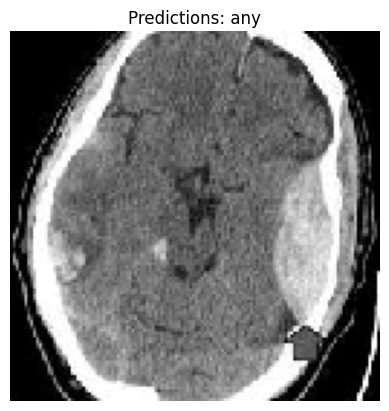

Predictions for image /kaggle/input/testing/download (1).jpeg: any


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

# Define the subcategories for the output
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

def predict_image(image_path, model):
    # Load the image from the path
    img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
    
    # Convert the image to an array and normalize it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]

    # Predict using the model
    predictions = model.predict(img_array)
    
    # Convert predictions to binary values (using 0.5 as the threshold)
    predictions_binary = (predictions > 0.5).astype(int)
    
    # Map the binary predictions to actual subcategory names
    predicted_labels = [subcategories[i] for i in range(len(subcategories)) if predictions_binary[0][i] == 1]
    
    return img, predicted_labels

# Provide the image path
image_path = '/kaggle/input/testing/download (1).jpeg'  # Replace with your image path

# Use the model to predict
img, predicted_labels = predict_image(image_path, model)

# Display the image and predictions
plt.imshow(img, cmap='gray')
plt.title(f"Predictions: {', '.join(predicted_labels)}")
plt.axis('off')  # Turn off axis
plt.show()

# Print predictions in the console
print(f"Predictions for image {image_path}: {', '.join(predicted_labels)}")


Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - AUC: 0.5807 - loss: 4.2487 - val_AUC: 0.8091 - val_loss: 0.6732
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7450 - loss: 4.0327 - val_AUC: 0.7895 - val_loss: 0.6533
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7660 - loss: 3.8240 - val_AUC: 0.7877 - val_loss: 0.6312


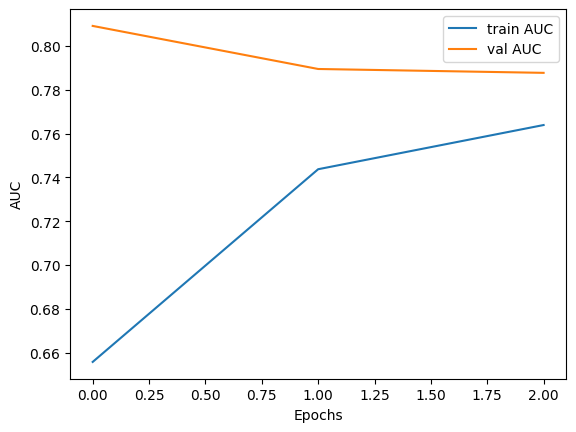

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - AUC: 0.8006 - loss: 0.6284
Test Loss: 0.6284087896347046
Test AUC: 0.8006207942962646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Precision: 0.37222222222222223
Recall: 1.0
F1 Score: 0.5425101214574899


In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import pydicom  # For reading DICOM files
from tensorflow.keras.preprocessing import image

# Definitions for each hemorrhage type
definitions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the skull and dura mater, often caused by trauma.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within brain tissue, often from high blood pressure or trauma.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding in the brain\'s ventricles, often caused by trauma or premature birth.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the surrounding tissues, often due to aneurysm rupture.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and brain, often from head trauma.',
    'any': 'Any Hemorrhage: A general category for any type of brain hemorrhage.'
}

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Compute class weights for each subcategory
class_weights = {}
for i in range(y_train.shape[1]):
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) > 1:
        class_weights[i] = compute_class_weight(
            class_weight='balanced',
            classes=[0, 1],
            y=y_train[:, i]
        )
    else:
        class_weights[i] = np.array([1.0, 1.0])

# Compute sample weights
sample_weights = []
for i in range(len(y_train)):
    sample_weight = 0
    for j in range(y_train.shape[1]):
        label = int(y_train[i, j])
        if len(class_weights[j]) > 1:
            sample_weight += class_weights[j][label]
        else:
            sample_weight += 1.0
    sample_weights.append(sample_weight)
sample_weights = np.array(sample_weights)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Custom generator for image data and sample weights
def custom_generator(datagen, X, y, sample_weights, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_x = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            batch_weights = sample_weights[i:i+batch_size]
            augmented_x = next(datagen.flow(batch_x, batch_size=batch_size, shuffle=False))
            yield augmented_x, batch_y, batch_weights

# Build the CNN model
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(512, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(512, activation='relu'),
    K.layers.Dropout(0.5),
    K.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(
    custom_generator(datagen, X_train, y_train, sample_weights, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=3,
    validation_data=(X_val, y_val)
)

# Plot training history (AUC and loss)
plt.plot(history.history['AUC'], label='train AUC')
plt.plot(history.history['val_AUC'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

# Predict for test set
y_pred = model.predict(X_test)

# Convert probabilities to binary values (threshold at 0.3 for better performance)
y_pred_bin = (y_pred > 0.3).astype(int)

# Compute Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_bin, average='micro')
recall = recall_score(y_test, y_pred_bin, average='micro')
f1 = f1_score(y_test, y_pred_bin, average='micro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Save the trained model to a file
model.save('hemorrhage_detection_model.h5')

# Save the model architecture as a JSON file and weights as separate H5 file
model_json = model.to_json()
with open('hemorrhage_detection_model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('hemorrhage_detection_model_weights.weights.h5')

# Define the subcategories for the output
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Function to load image based on extension (PNG, JPG, JPEG, DICOM)
def load_image(image_path):
    ext = image_path.split('.')[-1].lower()
    
    if ext in ['png', 'jpg', 'jpeg']:
        # Standard image format (PNG, JPG, JPEG)
        img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
        img_array = image.img_to_array(img)
    
    elif ext == 'dcm':
        # DICOM format
        dcm_data = pydicom.dcmread(image_path)
        img_array = dcm_data.pixel_array
        
        # Normalize the pixel values to the range [0, 1]
        img_array = img_array.astype('float32')
        
        # If the image has a high pixel depth (e.g., 16-bit), normalize by dividing by the maximum value
        if np.max(img_array) > 255:
            img_array = img_array / np.max(img_array)  # Normalize by the max pixel value
        
        # Resize the image to 128x128 (model input size)
        img_array = cv2.resize(img_array, (128, 128))  # Resize using OpenCV to avoid distortion
        img_array = np.expand_dims(img_array, axis=-1)  # Ensure it's grayscale

    else:
        raise ValueError("Unsupported image format. Supported formats: PNG, JPG, JPEG, DCM.")
    
    # Ensure values are within [0, 1] range after processing
    img_array = np.clip(img_array, 0, 1)
    
    return img_array

# Function to display the predictions with real image and description
def display_predictions_with_description(image_path, model):
    # Load and preprocess the image
    img_array = load_image(image_path)
    
    # Ensure the image is in the correct shape (1, 128, 128, 1) for batch prediction
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 1)
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]

    # Predict the image
    predictions = model.predict(img_array)
    
    # Convert predictions to binary
    predictions_binary = (predictions > 0.5).astype(int)
    
    # Define the subcategories for the output
    subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

    # Map predictions to subcategories
    predicted_labels = [subcategories[i] for i in range(len(subcategories)) if predictions_binary[0][i] == 1]
    
    # Display the real image (do not alter the original size or shape)
    img_display = np.squeeze(img_array[0], axis=-1)  # Remove the last dimension for grayscale (128, 128)
    
    # Show the image
    plt.imshow(img_display, cmap='gray')
    plt.title(f"Predictions: {', '.join(predicted_labels)}")
    plt.axis('off')
    plt.show()

    # Display the description for each predicted label
    for label in predicted_labels:
        print(f"{label} - Hemorrhage Detected: YES")
        print(f"Description: {definitions[label]}")

In [117]:
def load_image(image_path):
    ext = image_path.split('.')[-1].lower()
    
    if ext in ['png', 'jpg', 'jpeg']:
        # Standard image format (PNG, JPG, JPEG)
        img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
        img_array = image.img_to_array(img)
    
    elif ext == 'dcm':
        # DICOM format
        dcm_data = pydicom.dcmread(image_path)
        img_array = dcm_data.pixel_array
        
        # Normalize the pixel values to the range [0, 1]
        img_array = img_array.astype('float32')
        
        # If the image has a high pixel depth (e.g., 16-bit), normalize by dividing by the maximum value
        if np.max(img_array) > 255:
            img_array = img_array / np.max(img_array)  # Normalize by the max pixel value
        
        # Resize the image to 128x128 (model input size)
        img_array = cv2.resize(img_array, (128, 128))  # Resize using OpenCV to avoid distortion
        img_array = np.expand_dims(img_array, axis=-1)  # Ensure it's grayscale

    else:
        raise ValueError("Unsupported image format. Supported formats: PNG, JPG, JPEG, DCM.")
    
    # Ensure values are within [0, 1] range after processing
    img_array = np.clip(img_array, 0, 1)
    
    return img_array

In [ ]:
check

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.6674 - loss: 3.9538 - val_AUC: 0.7837 - val_loss: 0.4695
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7754 - loss: 3.0929 - val_AUC: 0.7984 - val_loss: 0.4421
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7919 - loss: 2.8573 - val_AUC: 0.8153 - val_loss: 0.4477


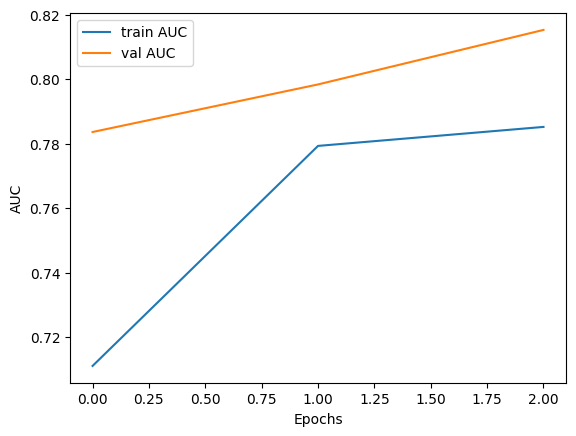

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - AUC: 0.8524 - loss: 0.4365
Test Loss: 0.43646639585494995
Test AUC: 0.8523973226547241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Precision: 0.48854961832061067
Recall: 0.9552238805970149
F1 Score: 0.6464646464646464


In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Definitions for each hemorrhage type
definitions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the skull and dura mater, often caused by trauma.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within brain tissue, often from high blood pressure or trauma.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding in the brain\'s ventricles, often caused by trauma or premature birth.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the surrounding tissues, often due to aneurysm rupture.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and brain, often from head trauma.',
    'any': 'Any Hemorrhage: A general category for any type of brain hemorrhage.'
}

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Compute class weights for each subcategory
class_weights = {i: compute_class_weight(
                    class_weight='balanced', classes=[0, 1], y=y_train[:, i]) if len(np.unique(y_train[:, i])) > 1 else np.array([1.0, 1.0])
                  for i in range(y_train.shape[1])}

# Compute sample weights
sample_weights = np.array([
    sum(class_weights[j][int(y_train[i, j])] for j in range(y_train.shape[1]))
    for i in range(len(y_train))
])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Custom generator for image data and sample weights
def custom_generator(datagen, X, y, sample_weights, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_x = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            batch_weights = sample_weights[i:i+batch_size]
            augmented_x = next(datagen.flow(batch_x, batch_size=batch_size, shuffle=False))
            yield augmented_x, batch_y, batch_weights

# Build the CNN model
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(512, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(512, activation='relu'),
    K.layers.Dropout(0.5),
    K.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(
    custom_generator(datagen, X_train, y_train, sample_weights, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=3,  # Increase the number of epochs
    validation_data=(X_val, y_val)
)

# Plot training history (AUC and loss)
plt.plot(history.history['AUC'], label='train AUC')
plt.plot(history.history['val_AUC'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

# Predict for test set
y_pred = model.predict(X_test)

# Convert probabilities to binary values (threshold at 0.35 for better performance)
y_pred_bin = (y_pred > 0.35).astype(int)

# Compute Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_bin, average='micro')
recall = recall_score(y_test, y_pred_bin, average='micro')
f1 = f1_score(y_test, y_pred_bin, average='micro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Save the trained model to a file
model.save('hemorrhage_detection_model.h5')

# Save the model architecture as a JSON file and weights as separate H5 file
model_json = model.to_json()
with open('hemorrhage_detection_model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('hemorrhage_detection_model_weights.weights.h5')

# Function to load image based on extension (PNG, JPG, JPEG, DICOM)
def load_image(image_path):
    ext = image_path.split('.')[-1].lower()

    if ext in ['png', 'jpg', 'jpeg']:
        # Standard image format (PNG, JPG, JPEG)
        img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
        img_array = image.img_to_array(img)

    elif ext == 'dcm':
        # DICOM format
        dcm_data = pydicom.dcmread(image_path)
        img_array = dcm_data.pixel_array

        # Normalize the pixel values to the range [0, 1]
        img_array = img_array.astype('float32')

        # If the image has a high pixel depth (e.g., 16-bit), normalize by dividing by the maximum value
        if np.max(img_array) > 255:
            img_array = img_array / np.max(img_array)  # Normalize by the max pixel value

        # Resize the image to 128x128 (model input size)
        img_array = cv2.resize(img_array, (128, 128))  # Resize using OpenCV to avoid distortion
        img_array = np.expand_dims(img_array, axis=-1)  # Ensure it's grayscale

    else:
        raise ValueError("Unsupported image format. Supported formats: PNG, JPG, JPEG, DCM.")

    # Ensure values are within [0, 1] range after processing
    img_array = np.clip(img_array, 0, 1)

    return img_array

def display_predictions_with_description(image_path, model, threshold=0.35):
    # Load and preprocess the image
    img_array = load_image(image_path)
    
    # Ensure the image is in the correct shape (1, 128, 128, 1) for batch prediction
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 1)
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]

    # Predict the image
    predictions = model.predict(img_array)
    
    # Find the category with the highest probability
    max_prob = np.max(predictions)  # Maximum probability
    max_prob_index = np.argmax(predictions)  # Index of maximum probability
    
    # Check if the highest probability exceeds the threshold
    if max_prob > threshold:
        # Define the subcategories
        subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']
        
        # Get the predicted label
        predicted_label = subcategories[max_prob_index]
        
        # Display the prediction
        print(f"Prediction: {predicted_label}")
        print(f"Description: {definitions[predicted_label]}")

        # Display the image
        img_display = np.squeeze(img_array[0], axis=-1)  # Remove the last dimension for grayscale (128, 128)
        plt.imshow(img_display, cmap='gray')
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()
    else:
        print("No hemorrhage detected.")


In [ ]:
check

In [196]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('hemorrhage_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: any
Description: Any Hemorrhage: A general category for any type of brain hemorrhage.


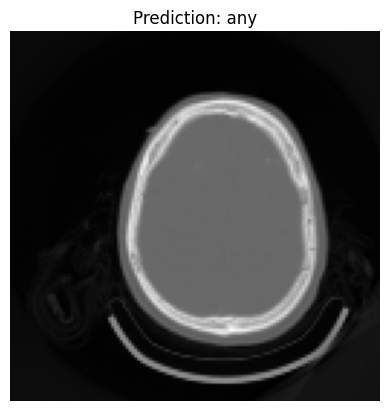

In [206]:
# Example usage: Provide a DICOM image path
image_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_test/ID_000bf8860.dcm'  # Replace with your image file path

# Display predictions and description
display_predictions_with_description(image_path, model, threshold=0.45)

In [202]:
img_array = load_image(image_path)
print("Image shape:", img_array.shape)
print("Image pixel range:", np.min(img_array), np.max(img_array))
#predictions = model.predict(img_array)
print("Raw Predictions:", predictions)
predictions_binary = (predictions < 0.3).astype(int)
print("Binary Predictions:", predictions_binary)
predicted_labels = [subcategories[i] for i in range(len(subcategories)) if predictions_binary[0][i] == 1]
print("Predicted Labels:", predicted_labels)
img_display = np.squeeze(img_array[0], axis=-1)  # Remove the last dimension for grayscale

Image shape: (128, 128, 1)
Image pixel range: 0.0 1.0
Raw Predictions: [[0.23943436 0.43313545 0.41602066 0.41792348 0.44106713 0.9180804 ]]
Binary Predictions: [[1 0 0 0 0 0]]
Predicted Labels: ['epidural']


real

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - AUC: 0.6649 - loss: 3.9950 - val_AUC: 0.7982 - val_loss: 0.4661
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7681 - loss: 3.1043 - val_AUC: 0.8104 - val_loss: 0.4391
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.7858 - loss: 2.8876 - val_AUC: 0.8278 - val_loss: 0.4489


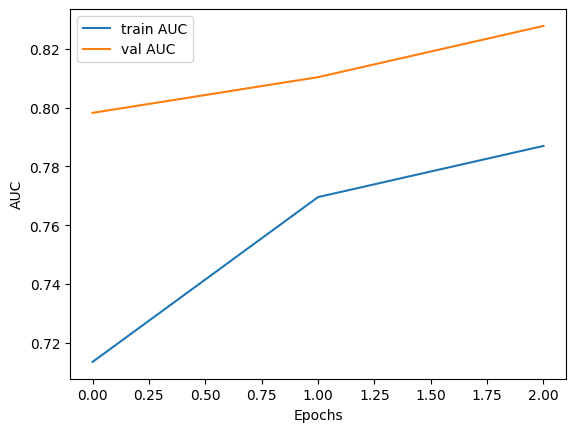

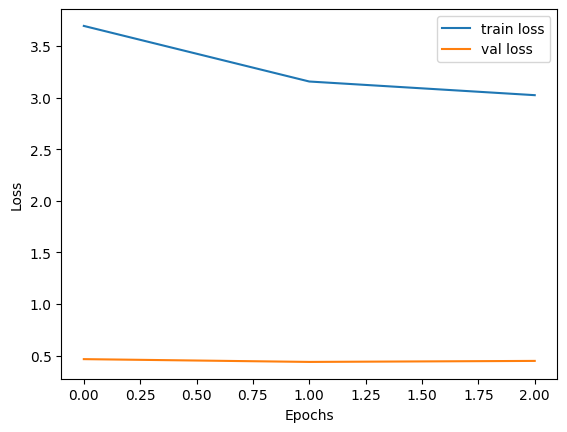

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - AUC: 0.8494 - loss: 0.4354
Test Loss: 0.4354167878627777
Test AUC: 0.8494254350662231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
Precision: 0.543859649122807
Recall: 0.9253731343283582
F1 Score: 0.6850828729281769


In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow.keras as K
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import pydicom  # For reading DICOM files
from tensorflow.keras.preprocessing import image

# Definitions for each hemorrhage type
definitions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the skull and dura mater, often caused by trauma.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within brain tissue, often from high blood pressure or trauma.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding in the brain\'s ventricles, often caused by trauma or premature birth.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the surrounding tissues, often due to aneurysm rupture.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and brain, often from head trauma.',
    'any': 'Any Hemorrhage: A general category for any type of brain hemorrhage.'
}

# Convert the images to the correct shape and data type
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure that the labels are in float32 format (for multi-label classification)
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Compute class weights for each subcategory
class_weights = {}
for i in range(y_train.shape[1]):
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) > 1:
        class_weights[i] = compute_class_weight(
            class_weight='balanced',
            classes=[0, 1],
            y=y_train[:, i]
        )
    else:
        class_weights[i] = np.array([1.0, 1.0])

# Compute sample weights
sample_weights = []
for i in range(len(y_train)):
    sample_weight = 0
    for j in range(y_train.shape[1]):
        label = int(y_train[i, j])
        if len(class_weights[j]) > 1:
            sample_weight += class_weights[j][label]
        else:
            sample_weight += 1.0
    sample_weights.append(sample_weight)
sample_weights = np.array(sample_weights)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Custom generator for image data and sample weights
def custom_generator(datagen, X, y, sample_weights, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_x = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            batch_weights = sample_weights[i:i+batch_size]
            augmented_x = next(datagen.flow(batch_x, batch_size=batch_size, shuffle=False))
            yield augmented_x, batch_y, batch_weights

# Build the CNN model
model = K.Sequential([
    K.layers.InputLayer(shape=(128, 128, 1)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(128, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(256, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(512, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Flatten(),
    K.layers.Dense(512, activation='relu'),
    K.layers.Dropout(0.5),
    K.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(optimizer=K.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(
    custom_generator(datagen, X_train, y_train, sample_weights, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=3,  # Increase the number of epochs
    validation_data=(X_val, y_val)
)

# Plot training history (AUC and loss)
plt.plot(history.history['AUC'], label='train AUC')
plt.plot(history.history['val_AUC'], label='val AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test AUC: {test_auc}')

# Predict for test set
y_pred = model.predict(X_test)

# Convert probabilities to binary values (threshold at 0.3 for better performance)
y_pred_bin = (y_pred > 0.35).astype(int)

# Compute Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_bin, average='micro')
recall = recall_score(y_test, y_pred_bin, average='micro')
f1 = f1_score(y_test, y_pred_bin, average='micro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Save the trained model to a file
model.save('hemorrhage_detection_model.h5')

# Save the model architecture as a JSON file and weights as separate H5 file
model_json = model.to_json()
with open('hemorrhage_detection_model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('hemorrhage_detection_model_weights.weights.h5')

# Define the subcategories for the output
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Function to load image based on extension (PNG, JPG, JPEG, DICOM)
def load_image(image_path):
    ext = image_path.split('.')[-1].lower()
    
    if ext in ['png', 'jpg', 'jpeg']:
        # Standard image format (PNG, JPG, JPEG)
        img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
        img_array = image.img_to_array(img)
    
    elif ext == 'dcm':
        # DICOM format
        dcm_data = pydicom.dcmread(image_path)
        img_array = dcm_data.pixel_array
        
        # Normalize the pixel values to the range [0, 1]
        img_array = img_array.astype('float32')
        
        # If the image has a high pixel depth (e.g., 16-bit), normalize by dividing by the maximum value
        if np.max(img_array) > 255:
            img_array = img_array / np.max(img_array)  # Normalize by the max pixel value
        
        # Resize the image to 128x128 (model input size)
        img_array = cv2.resize(img_array, (128, 128))  # Resize using OpenCV to avoid distortion
        img_array = np.expand_dims(img_array, axis=-1)  # Ensure it's grayscale

    else:
        raise ValueError("Unsupported image format. Supported formats: PNG, JPG, JPEG, DCM.")
    
    # Ensure values are within [0, 1] range after processing
    img_array = np.clip(img_array, 0, 1)
    
    return img_array

# Function to display the predictions with real image and description
def display_predictions_with_description(image_path, model, threshold=0.35):
    # Load and preprocess the image
    img_array = load_image(image_path)
    
    # Ensure the image is in the correct shape (1, 128, 128, 1) for batch prediction
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 1)
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]

    # Predict the image
    predictions = model.predict(img_array)
    
    # Convert predictions to binary
    predictions_binary = (predictions > threshold).astype(int)
    
    # Define the subcategories for the output
    subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

    # Map predictions to subcategories
    predicted_labels = [subcategories[i] for i in range(len(subcategories)) if predictions_binary[0][i] == 1]
    
    # Display the real image (do not alter the original size or shape)
    img_display = np.squeeze(img_array[0], axis=-1)  # Remove the last dimension for grayscale (128, 128)
    
    # Show the image
    plt.imshow(img_display, cmap='gray')
    plt.title(f"Predictions: {', '.join(predicted_labels)}")
    plt.axis('off')
    plt.show()

    # Display the description for each predicted label
    for label in predicted_labels:
        print(f"{label} - Hemorrhage Detected: YES")
        print(f"Description: {definitions[label]}")

real

In [203]:
print("Normalized Image pixel range:", np.min(img_array), np.max(img_array))

Normalized Image pixel range: 0.0 1.0


In [158]:
# Evaluate accuracy for the training, validation, and test sets
train_loss, train_auc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_auc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (AUC): {train_auc}')
print(f'Validation Accuracy (AUC): {val_auc}')
print(f'Test Accuracy (AUC): {test_auc}')

Training Accuracy (AUC): 0.810836911201477
Validation Accuracy (AUC): 0.814140260219574
Test Accuracy (AUC): 0.8444722890853882


**final**

In [1]:
import pandas as pd
import os
import pydicom
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
from torch import nn
import torch.optim as optim
from PIL import Image
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

# Define the train directory path
train_path = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'

# List all DICOM file names from the directory
CT_image_file_names = os.listdir(train_path)

# Filter the dataset for hemorrhage cases (Label == 1)
df = df[df['Label'] == 1]

# Function to split the ID column manually
def split_id(id_value):
    parts = id_value.split('_', 2)
    return parts[1], parts[2] if len(parts) > 2 else 'N/A'

# Apply the function to split the ID and create new columns
df[['File', 'Subcategory']] = df['ID'].apply(split_id).apply(pd.Series)

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Rearrange the columns and rename them for clarity
df = df[['File', 'Subcategory', 'Label']]
df.columns = ['File Name', 'Subcategory', 'Label']

# Add 'ID_' prefix to the 'File Name' column
df['File Name'] = 'ID_' + df['File Name']

# Define subcategories
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Create binary columns for each subcategory
for subcategory in subcategories:
    df[subcategory] = df.apply(lambda row: 1 if row['Subcategory'] == subcategory and row['Label'] == 1 else 0, axis=1)

# Drop 'Subcategory' and 'Label' columns
df = df.drop(columns=['Subcategory', 'Label'])

# Aggregate by 'File Name', taking the maximum value for each subcategory column
df_aggregated = df.groupby('File Name').max().reset_index()

# Save the 'File Name' values into a list
file_names_list = df_aggregated['File Name'].tolist()

# Create a DataFrame for DICOM image paths
ICH_dicom_image_paths = pd.DataFrame({
    'File Name': [n for n in file_names_list],
    'image_path': [train_path + n + '.dcm' for n in file_names_list]
})

# Merge the image paths with the aggregated data
merged_df = pd.merge(left=ICH_dicom_image_paths, right=df_aggregated, on='File Name', how='inner')

# --- Equal Sampling from Each Subcategory ---

# Ensure there are 100 images from each subcategory
balanced_df = pd.DataFrame()

for subcategory in subcategories:
    # Filter the dataset by subcategory
    subcategory_df = merged_df[merged_df[subcategory] == 1]
    
    # Sample 100 images for this subcategory
    sampled_df = subcategory_df.sample(n=100, random_state=42)  # Adjust random_state for reproducibility
    
    # Append to the balanced dataframe
    balanced_df = pd.concat([balanced_df, sampled_df])

# Shuffle the final balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shape of the balanced dataset (should be 600 images)
print(f"Balanced dataset shape: {balanced_df.shape}")

# Save the balanced DataFrame
balanced_df.to_csv('/kaggle/working/balanced_out.csv', index=False)

Balanced dataset shape: (600, 8)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pydicom
from PIL import Image
import numpy as np
from torchvision import transforms

# --- Custom Dataset Class ---
class RSNADataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 1]
        labels = self.dataframe.iloc[idx, 2:].values  # Get binary labels for all subcategories
        
        # Convert labels to float32
        labels = labels.astype(np.float32)

        # Load the DICOM image using pydicom
        dicom_data = pydicom.dcmread(img_path)
        img = dicom_data.pixel_array
        
        # Convert image to PIL Image
        img = Image.fromarray(img)
        
        # Convert single-channel image to 3-channel image (if needed)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Apply transformations if any
        if self.transform:
            img = self.transform(img)
        
        # Return image and labels
        return img, torch.tensor(labels, dtype=torch.float32)

# --- Define Transforms ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# --- Create Dataset and DataLoader ---
dataset = RSNADataset(balanced_df, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# --- Define the CNN Model ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Define the convolutional layers and fully connected layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # Input: 3 channels, Output: 16 channels
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # Input: 16 channels, Output: 32 channels
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer with 2x2 kernel
        
        # Calculate the output size after convolutions and pooling
        # 224x224 -> 112x112 -> 56x56 after pooling
        self.fc1 = nn.Linear(32 * 56 * 56, 500)  # Flattened image to 500 nodes
        self.fc2 = nn.Linear(500, 6)  # Output layer for 6 subcategories (multi-label classification)

    def forward(self, x):
        # Convolutional and pooling layers with ReLU activation
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        
        # Flatten the output for the fully connected layers
        x = x.view(-1, 32 * 56 * 56)  # Adjust this if the input image size changes
        
        # Fully connected layers with ReLU activation
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)  # Output layer (raw logits)
        
        return x

# --- Initialize Model, Optimizer, and Loss Function ---
model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Use BCEWithLogitsLoss for multi-label classification
criterion = nn.BCEWithLogitsLoss()

# --- Training Loop ---
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        
        # Calculate loss for multi-label classification
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader):.4f}")

print("Training complete!")

Epoch 1/5, Loss: 0.8466
Epoch 2/5, Loss: 0.5167
Epoch 3/5, Loss: 0.4996
Epoch 4/5, Loss: 0.4419
Epoch 5/5, Loss: 0.3317
Training complete!


In [3]:
from sklearn.model_selection import train_test_split

# Split the balanced dataframe into training (80%) and remaining (20%)
train_df, remaining_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# Split the remaining 20% into validation and test sets (50% of 20% = 10% for each)
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

# Create separate DataLoaders for training, validation, and test sets
train_dataset = RSNADataset(train_df, transform=transform)
val_dataset = RSNADataset(val_df, transform=transform)
test_dataset = RSNADataset(test_df, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Print the sizes of each set
print(f"Training set size: {len(train_dataloader.dataset)}")
print(f"Validation set size: {len(val_dataloader.dataset)}")
print(f"Test set size: {len(test_dataloader.dataset)}")

Training set size: 480
Validation set size: 60
Test set size: 60


In [4]:
# Training loop with validation
num_epochs = 5
best_val_loss = float('inf')  # Initialize the best validation loss

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Training phase
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()  # Switch model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No gradients needed for validation
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Calculate average loss for the epoch
    train_loss = running_loss / len(train_dataloader)
    val_loss = val_loss / len(val_dataloader)
    
    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save model checkpoint if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Model checkpoint saved!")

Epoch 1/5 - Training Loss: 0.1931, Validation Loss: 0.1917
Model checkpoint saved!
Epoch 2/5 - Training Loss: 0.0907, Validation Loss: 0.2622
Epoch 3/5 - Training Loss: 0.0374, Validation Loss: 0.3006
Epoch 4/5 - Training Loss: 0.0169, Validation Loss: 0.3303
Epoch 5/5 - Training Loss: 0.0057, Validation Loss: 0.3596


In [5]:
# Load the best model
model.load_state_dict(torch.load("best_model.pth", weights_only=True))

# Evaluate on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Convert outputs to predicted labels using threshold (0.5 for each label)
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # Convert outputs to probabilities and threshold
        
        # Calculate the number of correct predictions
        correct += (predicted == labels).sum().item()
        total += labels.numel()  # Total number of elements (all labels in the batch)

# Calculate average test loss and accuracy
test_loss /= len(test_dataloader)
accuracy = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

Test Loss: 0.2045
Test Accuracy: 92.50%


In [9]:
torch.save(model.state_dict(), 'final_model.pth')

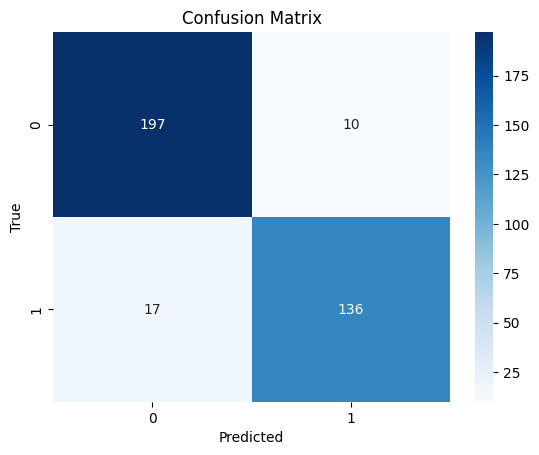

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize variables to store true labels and predictions
all_labels = []
all_predicted = []

# Evaluate on the test set
model.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        
        # Apply sigmoid and threshold for multi-label outputs
        outputs = torch.sigmoid(outputs)
        predicted = (outputs > 0.5).float()  # Assuming threshold is 0.5

        # Store true labels and predictions (convert to numpy)
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predicted = np.array(all_predicted)

# Calculate confusion matrix for each label
cm = confusion_matrix(all_labels.flatten(), all_predicted.flatten())

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store predicted and true labels
predicted_labels = []
true_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Get the model's outputs
        outputs = model(images)
        
        # Apply sigmoid and threshold (for multi-label classification)
        outputs = torch.sigmoid(outputs)
        predicted = (outputs > 0.5).float()  # Threshold at 0.5
        
        # Collect the predicted and true labels (as lists)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Calculate Precision, Recall, F1 Score for each label (macro-average)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9162
Recall: 0.8539
F1 Score: 0.8729


Predictions (0 or 1 for each subcategory):
epidural: False
intraparenchymal: False
intraventricular: False
subarachnoid: False
subdural: False
any: True

Probabilities for each subcategory:
epidural: 0.4894
intraparenchymal: 0.4928
intraventricular: 0.4755
subarachnoid: 0.4941
subdural: 0.4828
any: 0.5455

Conclusion: The model predicts 'subarachnoid' with the highest probability of 49.41%.
Scientific Description: Subarachnoid Hemorrhage: Bleeding in the space between the brain and the surrounding tissues, often due to aneurysm rupture.


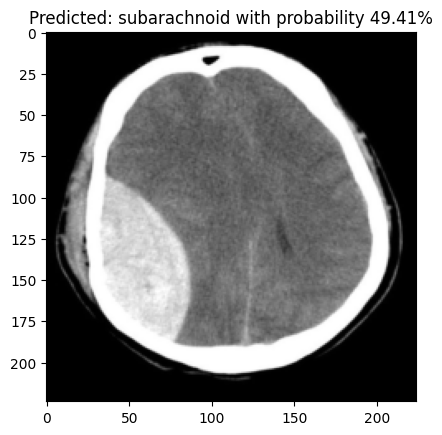

In [12]:
import torch
from torch import nn
from torchvision import transforms
from PIL import Image
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the model with 6 output classes (matching the trained model)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 56 * 56, 500)
        self.fc2 = nn.Linear(500, 6)  # Change to 6 output classes
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)  # Flatten the output for fully connected layer
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the model with 6 output classes
model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load the saved model weights (which were trained for 6 subcategories)
model.load_state_dict(torch.load('final_model.pth', weights_only=True))
model.eval()

# Define the transform for image preprocessing (same as during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Define the subcategories (for the 6 classes)
subcategories = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

# Definitions for each hemorrhage type
definitions = {
    'epidural': 'Epidural Hemorrhage: Bleeding between the skull and dura mater, often caused by trauma.',
    'intraparenchymal': 'Intraparenchymal Hemorrhage: Bleeding within brain tissue, often from high blood pressure or trauma.',
    'intraventricular': 'Intraventricular Hemorrhage: Bleeding in the brain\'s ventricles, often caused by trauma or premature birth.',
    'subarachnoid': 'Subarachnoid Hemorrhage: Bleeding in the space between the brain and the surrounding tissues, often due to aneurysm rupture.',
    'subdural': 'Subdural Hemorrhage: Bleeding between the dura mater and brain, often from head trauma.',
    'any': 'Any Hemorrhage: A general category for any type of brain hemorrhage.'
}

# Function to read and convert an image to a format usable by PIL
def load_image(image_path):
    file_extension = os.path.splitext(image_path)[-1].lower()
    
    if file_extension == '.dcm':  # If it's a DICOM file
        dicom_data = pydicom.dcmread(image_path)
        img_array = dicom_data.pixel_array  # Get pixel data from DICOM
        img = Image.fromarray(img_array).convert("RGB")  # Convert to RGB format for PIL
    else:  # If it's a regular image (e.g., jpg, png)
        img = Image.open(image_path).convert("RGB")
    
    return img

# Function to make a prediction
def predict_image(image_path):
    # Load and preprocess the image
    img = load_image(image_path)
    img = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device
    
    # Forward pass through the model
    with torch.no_grad():
        outputs = model(img)
    
    # Get predicted probabilities (use sigmoid for multi-label classification)
    probabilities = torch.sigmoid(outputs)  # Sigmoid activation
    
    # Get the predicted classes (thresholded at 0.5)
    predicted_classes = (probabilities > 0.5).cpu().numpy().flatten()  # Threshold at 0.5

    # Map the predictions to the subcategories
    predictions = {subcategory: predicted_classes[i] for i, subcategory in enumerate(subcategories)}
    
    return predictions, probabilities, img

# Test with an example image (provide the image path here)
image_path = '/kaggle/input/demoooo/22801a555da18b0db90674093dcf3a_big_gallery.jpeg'  # Replace with your image path

# Make prediction
predictions, probabilities, img = predict_image(image_path)

# Print the results
print("Predictions (0 or 1 for each subcategory):")
for subcategory, prediction in predictions.items():
    print(f"{subcategory}: {prediction}")

# Optional: Print the probabilities for each subcategory
print("\nProbabilities for each subcategory:")
for subcategory, prob in zip(subcategories, probabilities.flatten()):
    print(f"{subcategory}: {prob:.4f}")

# Get the index of the highest probability, excluding 'any'
sorted_probabilities = probabilities.flatten().tolist()

# Find the maximum probability, excluding 'any'
max_prob_index = sorted_probabilities.index(max(sorted_probabilities))  # Find max without 'any'
if subcategories[max_prob_index] == 'any':
    # If 'any' has the highest probability, find the second highest
    sorted_probabilities[max_prob_index] = -1  # Set 'any' to a very low value
    max_prob_index = sorted_probabilities.index(max(sorted_probabilities))

# Get the subcategory and probability
max_subcategory = subcategories[max_prob_index]
max_probability = probabilities.flatten()[max_prob_index].item() * 100  # Convert to percentage

# Print conclusion for the maximum probability
print(f"\nConclusion: The model predicts '{max_subcategory}' with the highest probability of {max_probability:.2f}%.")
print(f"Scientific Description: {definitions[max_subcategory]}")

# Display the image (convert from Tensor to numpy array)
img = img.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Remove batch dimension and convert to HxWxC format
img = (img * 0.5) + 0.5  # Denormalize

# Plot the image
plt.imshow(img)
plt.axis('on')  # Enable ticks
plt.title(f"Predicted: {max_subcategory} with probability {max_probability:.2f}%")
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Lists to store training loss and AUC
train_losses = []
train_aucs = []

# Assuming you have a dataloader, model, optimizer, and criterion
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    all_labels = []
    all_preds = []
    
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Collect all predictions and true labels for AUC calculation
        all_labels.append(labels.cpu().numpy())
        
        # Detach the outputs and convert to numpy
        all_preds.append(torch.sigmoid(outputs).detach().cpu().numpy())  # Detach and then convert to numpy

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_dataloader)
    train_losses.append(avg_loss)

    # Calculate AUC (Assuming binary or multi-label classification)
    all_labels = np.concatenate(all_labels, axis=0)
    all_preds = np.concatenate(all_preds, axis=0)

    # Skip AUC calculation if all labels are the same (no positive or negative class in batch)
    if np.unique(all_labels).size > 1:
        try:
            # Calculate AUC for each label separately and average
            auc = roc_auc_score(all_labels, all_preds, average='macro', multi_class='ovr')  # Adjust for multi-class
            train_aucs.append(auc)
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, AUC: {auc:.4f}")
        except ValueError:
            # If there's an issue with AUC calculation, handle gracefully
            train_aucs.append(np.nan)
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, AUC: Skipped (only one class present)")
    else:
        train_aucs.append(np.nan)  # Mark as NaN if AUC cannot be calculated
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, AUC: Skipped (only one class present)")

# After training, plot loss and AUC
# Plotting the loss curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plotting the AUC curve
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_aucs, label='Training AUC', color='green')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training AUC')

plt.tight_layout()
plt.show()


Epoch [1/5], Loss: 0.0377, AUC: Skipped (only one class present)
